In [56]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np

def wrap(job,job_id,task_id):
    def singlerun(kaf,L,run):
        import numpy as np
        rng = GSLRandomNumberGenerator()
        rng.seed(run)
        rm = 0.005
        R=2*rm
        voxelr=2*rm
        D = 1
        kd=4*math.pi*D
        ka=kaf*kd
        gamma=0.577
        PP=1./(1+math.sqrt(3)*(math.log(1./3)+(4*math.pi*D/ka)-2*gamma)/2/math.pi)
        ka = PP*2*math.sqrt(3)*D#kaf*kd#
        tm =(2*voxelr)**2/(6*D)
        N = 100
        H = 3*voxelr*2
        ori = Real3(0.5*H,0,0)
        unit0 = Real3(0,0,L)
        unit1 = Real3(0,L,0)        
        w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)
        size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
        w.add_structure(Species('X'),PlanarSurface(ori,unit0,unit1))
        Nmv=size[1]*size[2]        
        Area=Nmv*(2*voxelr)**2
        #print('A',L*L,Area)
        C=float(N)/Area
        with species_attributes():
            A |  {'D': str(0), 'radius':str(voxelr),'location':'X'}
            B |  {'D': str(D), 'radius':str(voxelr),'location':'X'}

        with reaction_rules():#for spa and egfrd
            A + B > B | ka

        m2 = get_model()
        w.bind_to(m2)

        na=1
        w.add_molecules(Species('A'), na)
        w.add_molecules(Species('B'), N)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        simt=0
        while na==1:
            sim.step()
            na = w.num_particles_exact(Species('A'))
            simt=sim.t()
        return simt,C
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

kaf=0.1
simrun=3000
Ls=[7,6,5,4,3.5,3,2.5,2,1]
#Ls=[10,9,8,0.8,0.5]
Ls=[7,3,1,0.4,0.3]

rxt=[]
conc=[]
for L in Ls:
    print('L',L)
    jobs=[{'kaf':kaf,'L':L}]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=350,path='tmp',modules=('numpy','ecell4','math'))[0]
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=350,modules=('numpy','ecell4','math'))[0]
    conc.append(res[0][1])
    rxt.append(np.mean([r[0] for r in res]))
print('finish') 
print(kaf)

L 7


DEBUG:sge:Submitted batch job 1153967
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1153967_[1-3000%35      defq sge-0b7b     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 1153967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1153967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1153967_[996-3000%      defq sge-0b7b     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1153967_981      defq sge-0b7b     chew  R       0:00      1 ibc12
DEBUG:sge:       1153967_982      defq sge-0b7b     chew  R       0:00      1 ibc22
DEBUG:sge:       1153967_983      defq sge-0b7b     chew  R       0:00      1 ibc23
DEBUG:sge:       1153967_984      defq sge-0b7b     chew  R       0:00      1 ibc06
DEBUG:sge:       1153967_985      defq sge-0b7b     chew  R       0:00      1 ibc18
DEBUG:sge:       1153967_986      defq sge-0

DEBUG:sge:       1153967_964      defq sge-0b7b     chew  R       0:01      1 ibc03
DEBUG:sge:       1153967_965      defq sge-0b7b     chew  R       0:01      1 ibc19
DEBUG:sge:       1153967_966      defq sge-0b7b     chew  R       0:01      1 ibc20
DEBUG:sge:       1153967_967      defq sge-0b7b     chew  R       0:01      1 ibc23
DEBUG:sge:       1153967_968      defq sge-0b7b     chew  R       0:01      1 ibc04
DEBUG:sge:       1153967_969      defq sge-0b7b     chew  R       0:01      1 ibc12
DEBUG:sge:       1153967_970      defq sge-0b7b     chew  R       0:01      1 ibc20
DEBUG:sge:       1153967_971      defq sge-0b7b     chew  R       0:01      1 ibc13
DEBUG:sge:       1153967_972      defq sge-0b7b     chew  R       0:01      1 ibc13
DEBUG:sge:       1153967_973      defq sge-0b7b     chew  R       0:01      1 ibc12
DEBUG:sge:       1153967_974      defq sge-0b7b     chew  R       0:01      1 ibc12
DEBUG:sge:       1153967_975      defq sge-0b7b     chew  R       0:01      

DEBUG:sge:       1153967_782      defq sge-0b7b     chew  R       0:02      1 ibc06
DEBUG:sge:       1153967_783      defq sge-0b7b     chew  R       0:02      1 ibc21
DEBUG:sge:       1153967_784      defq sge-0b7b     chew  R       0:02      1 ibc04
DEBUG:sge:       1153967_785      defq sge-0b7b     chew  R       0:02      1 ibc10
DEBUG:sge:       1153967_786      defq sge-0b7b     chew  R       0:02      1 ibc06
DEBUG:sge:       1153967_787      defq sge-0b7b     chew  R       0:02      1 ibc11
DEBUG:sge:       1153967_788      defq sge-0b7b     chew  R       0:02      1 ibc04
DEBUG:sge:       1153967_789      defq sge-0b7b     chew  R       0:02      1 ibc10
DEBUG:sge:       1153967_790      defq sge-0b7b     chew  R       0:02      1 ibc19
DEBUG:sge:       1153967_791      defq sge-0b7b     chew  R       0:02      1 ibc02
DEBUG:sge:       1153967_792      defq sge-0b7b     chew  R       0:02      1 ibc10
DEBUG:sge:       1153967_793      defq sge-0b7b     chew  R       0:02      

DEBUG:sge:       1153967_880      defq sge-0b7b     chew  R       0:02      1 ibc06
DEBUG:sge:       1153967_881      defq sge-0b7b     chew  R       0:02      1 ibc12
DEBUG:sge:       1153967_882      defq sge-0b7b     chew  R       0:02      1 ibc12
DEBUG:sge:       1153967_883      defq sge-0b7b     chew  R       0:02      1 ibc21
DEBUG:sge:       1153967_884      defq sge-0b7b     chew  R       0:02      1 ibc17
DEBUG:sge:       1153967_885      defq sge-0b7b     chew  R       0:02      1 ibc18
DEBUG:sge:       1153967_886      defq sge-0b7b     chew  R       0:02      1 ibc02
DEBUG:sge:       1153967_693      defq sge-0b7b     chew  R       0:05      1 ibc14
DEBUG:sge:       1153967_699      defq sge-0b7b     chew  R       0:05      1 ibc17
DEBUG:sge:       1153967_676      defq sge-0b7b     chew  R       0:06      1 ibc14
DEBUG:sge:       1153967_680      defq sge-0b7b     chew  R       0:06      1 ibc20
DEBUG:sge:       1153967_682      defq sge-0b7b     chew  R       0:06      

DEBUG:sge:      1153967_1069      defq sge-0b7b     chew  R       0:05      1 ibc01
DEBUG:sge:      1153967_1070      defq sge-0b7b     chew  R       0:05      1 ibc10
DEBUG:sge:      1153967_1071      defq sge-0b7b     chew  R       0:05      1 ibc23
DEBUG:sge:      1153967_1072      defq sge-0b7b     chew  R       0:05      1 ibc04
DEBUG:sge:      1153967_1073      defq sge-0b7b     chew  R       0:05      1 ibc12
DEBUG:sge:      1153967_1074      defq sge-0b7b     chew  R       0:05      1 ibc23
DEBUG:sge:      1153967_1075      defq sge-0b7b     chew  R       0:05      1 ibc04
DEBUG:sge:      1153967_1076      defq sge-0b7b     chew  R       0:05      1 ibc10
DEBUG:sge:      1153967_1077      defq sge-0b7b     chew  R       0:05      1 ibc12
DEBUG:sge:      1153967_1078      defq sge-0b7b     chew  R       0:05      1 ibc10
DEBUG:sge:      1153967_1079      defq sge-0b7b     chew  R       0:05      1 ibc04
DEBUG:sge:      1153967_1080      defq sge-0b7b     chew  R       0:05      

DEBUG:sge:       1153967_903      defq sge-0b7b     chew  R       0:11      1 ibc17
DEBUG:sge:       1153967_904      defq sge-0b7b     chew  R       0:11      1 ibc15
DEBUG:sge:       1153967_905      defq sge-0b7b     chew  R       0:11      1 ibc01
DEBUG:sge:       1153967_906      defq sge-0b7b     chew  R       0:11      1 ibc11
DEBUG:sge:       1153967_907      defq sge-0b7b     chew  R       0:11      1 ibc18
DEBUG:sge:       1153967_908      defq sge-0b7b     chew  R       0:11      1 ibc21
DEBUG:sge:       1153967_909      defq sge-0b7b     chew  R       0:11      1 ibc15
DEBUG:sge:       1153967_910      defq sge-0b7b     chew  R       0:11      1 ibc15
DEBUG:sge:       1153967_911      defq sge-0b7b     chew  R       0:11      1 ibc16
DEBUG:sge:       1153967_913      defq sge-0b7b     chew  R       0:11      1 ibc05
DEBUG:sge:       1153967_915      defq sge-0b7b     chew  R       0:11      1 ibc03
DEBUG:sge:       1153967_916      defq sge-0b7b     chew  R       0:11      

DEBUG:sge:       1153967_759      defq sge-0b7b     chew  R       0:12      1 ibc08
DEBUG:sge:       1153967_760      defq sge-0b7b     chew  R       0:12      1 ibc03
DEBUG:sge:       1153967_761      defq sge-0b7b     chew  R       0:12      1 ibc07
DEBUG:sge:       1153967_762      defq sge-0b7b     chew  R       0:12      1 ibc21
DEBUG:sge:       1153967_763      defq sge-0b7b     chew  R       0:12      1 ibc17
DEBUG:sge:       1153967_764      defq sge-0b7b     chew  R       0:12      1 ibc17
DEBUG:sge:       1153967_765      defq sge-0b7b     chew  R       0:12      1 ibc15
DEBUG:sge:       1153967_766      defq sge-0b7b     chew  R       0:12      1 ibc02
DEBUG:sge:       1153967_767      defq sge-0b7b     chew  R       0:12      1 ibc15
DEBUG:sge:       1153967_768      defq sge-0b7b     chew  R       0:12      1 ibc19
DEBUG:sge:       1153967_769      defq sge-0b7b     chew  R       0:12      1 ibc18
DEBUG:sge:       1153967_770      defq sge-0b7b     chew  R       0:12      

DEBUG:sge:       1153967_874      defq sge-0b7b     chew  R       0:12      1 ibc03
DEBUG:sge:       1153967_875      defq sge-0b7b     chew  R       0:12      1 ibc06
DEBUG:sge:       1153967_876      defq sge-0b7b     chew  R       0:12      1 ibc17
DEBUG:sge:       1153967_878      defq sge-0b7b     chew  R       0:12      1 ibc01
DEBUG:sge:       1153967_879      defq sge-0b7b     chew  R       0:12      1 ibc03
DEBUG:sge:       1153967_880      defq sge-0b7b     chew  R       0:12      1 ibc06
DEBUG:sge:       1153967_883      defq sge-0b7b     chew  R       0:12      1 ibc21
DEBUG:sge:       1153967_884      defq sge-0b7b     chew  R       0:12      1 ibc17
DEBUG:sge:       1153967_885      defq sge-0b7b     chew  R       0:12      1 ibc18
DEBUG:sge:       1153967_886      defq sge-0b7b     chew  R       0:12      1 ibc02
DEBUG:sge:       1153967_568      defq sge-0b7b     chew  R       0:17      1 ibc11
DEBUG:sge:       1153967_579      defq sge-0b7b     chew  R       0:17      

DEBUG:sge:      1153967_1200      defq sge-0b7b     chew  R       0:04      1 ibc17
DEBUG:sge:      1153967_1201      defq sge-0b7b     chew  R       0:04      1 ibc17
DEBUG:sge:      1153967_1202      defq sge-0b7b     chew  R       0:04      1 ibc23
DEBUG:sge:      1153967_1203      defq sge-0b7b     chew  R       0:04      1 ibc21
DEBUG:sge:      1153967_1204      defq sge-0b7b     chew  R       0:04      1 ibc21
DEBUG:sge:      1153967_1205      defq sge-0b7b     chew  R       0:04      1 ibc22
DEBUG:sge:      1153967_1206      defq sge-0b7b     chew  R       0:04      1 ibc22
DEBUG:sge:      1153967_1207      defq sge-0b7b     chew  R       0:04      1 ibc02
DEBUG:sge:      1153967_1208      defq sge-0b7b     chew  R       0:04      1 ibc14
DEBUG:sge:      1153967_1209      defq sge-0b7b     chew  R       0:04      1 ibc10
DEBUG:sge:      1153967_1210      defq sge-0b7b     chew  R       0:04      1 ibc10
DEBUG:sge:      1153967_1211      defq sge-0b7b     chew  R       0:04      

DEBUG:sge:      1153967_1298      defq sge-0b7b     chew  R       0:04      1 ibc03
DEBUG:sge:      1153967_1299      defq sge-0b7b     chew  R       0:04      1 ibc18
DEBUG:sge:      1153967_1300      defq sge-0b7b     chew  R       0:04      1 ibc19
DEBUG:sge:      1153967_1301      defq sge-0b7b     chew  R       0:04      1 ibc14
DEBUG:sge:      1153967_1302      defq sge-0b7b     chew  R       0:04      1 ibc02
DEBUG:sge:      1153967_1303      defq sge-0b7b     chew  R       0:04      1 ibc17
DEBUG:sge:      1153967_1304      defq sge-0b7b     chew  R       0:04      1 ibc17
DEBUG:sge:      1153967_1305      defq sge-0b7b     chew  R       0:04      1 ibc20
DEBUG:sge:      1153967_1306      defq sge-0b7b     chew  R       0:04      1 ibc03
DEBUG:sge:      1153967_1307      defq sge-0b7b     chew  R       0:04      1 ibc05
DEBUG:sge:      1153967_1308      defq sge-0b7b     chew  R       0:04      1 ibc19
DEBUG:sge:      1153967_1309      defq sge-0b7b     chew  R       0:04      

DEBUG:sge:      1153967_1149      defq sge-0b7b     chew  R       0:05      1 ibc01
DEBUG:sge:      1153967_1150      defq sge-0b7b     chew  R       0:05      1 ibc15
DEBUG:sge:      1153967_1151      defq sge-0b7b     chew  R       0:05      1 ibc01
DEBUG:sge:      1153967_1152      defq sge-0b7b     chew  R       0:05      1 ibc04
DEBUG:sge:      1153967_1153      defq sge-0b7b     chew  R       0:05      1 ibc21
DEBUG:sge:      1153967_1154      defq sge-0b7b     chew  R       0:05      1 ibc23
DEBUG:sge:      1153967_1155      defq sge-0b7b     chew  R       0:05      1 ibc12
DEBUG:sge:      1153967_1156      defq sge-0b7b     chew  R       0:05      1 ibc12
DEBUG:sge:      1153967_1157      defq sge-0b7b     chew  R       0:05      1 ibc01
DEBUG:sge:      1153967_1158      defq sge-0b7b     chew  R       0:05      1 ibc01
DEBUG:sge:      1153967_1159      defq sge-0b7b     chew  R       0:05      1 ibc03
DEBUG:sge:      1153967_1160      defq sge-0b7b     chew  R       0:05      

DEBUG:sge:      1153967_1461      defq sge-0b7b     chew  R       0:00      1 ibc14
DEBUG:sge:      1153967_1462      defq sge-0b7b     chew  R       0:00      1 ibc14
DEBUG:sge:      1153967_1450      defq sge-0b7b     chew  R       0:01      1 ibc08
DEBUG:sge:      1153967_1448      defq sge-0b7b     chew  R       0:02      1 ibc11
DEBUG:sge:      1153967_1449      defq sge-0b7b     chew  R       0:02      1 ibc11
DEBUG:sge:      1153967_1446      defq sge-0b7b     chew  R       0:03      1 ibc23
DEBUG:sge:      1153967_1447      defq sge-0b7b     chew  R       0:03      1 ibc22
DEBUG:sge:      1153967_1442      defq sge-0b7b     chew  R       0:04      1 ibc08
DEBUG:sge:      1153967_1443      defq sge-0b7b     chew  R       0:04      1 ibc23
DEBUG:sge:      1153967_1444      defq sge-0b7b     chew  R       0:04      1 ibc23
DEBUG:sge:      1153967_1445      defq sge-0b7b     chew  R       0:04      1 ibc08
DEBUG:sge:      1153967_1441      defq sge-0b7b     chew  R       0:05      

DEBUG:sge:      1153967_1206      defq sge-0b7b     chew  R       0:15      1 ibc22
DEBUG:sge:      1153967_1208      defq sge-0b7b     chew  R       0:15      1 ibc14
DEBUG:sge:      1153967_1209      defq sge-0b7b     chew  R       0:15      1 ibc10
DEBUG:sge:      1153967_1210      defq sge-0b7b     chew  R       0:15      1 ibc10
DEBUG:sge:      1153967_1211      defq sge-0b7b     chew  R       0:15      1 ibc18
DEBUG:sge:      1153967_1212      defq sge-0b7b     chew  R       0:15      1 ibc07
DEBUG:sge:      1153967_1213      defq sge-0b7b     chew  R       0:15      1 ibc14
DEBUG:sge:      1153967_1214      defq sge-0b7b     chew  R       0:15      1 ibc07
DEBUG:sge:      1153967_1215      defq sge-0b7b     chew  R       0:15      1 ibc12
DEBUG:sge:      1153967_1216      defq sge-0b7b     chew  R       0:15      1 ibc03
DEBUG:sge:      1153967_1217      defq sge-0b7b     chew  R       0:15      1 ibc17
DEBUG:sge:      1153967_1218      defq sge-0b7b     chew  R       0:15      

DEBUG:sge:      1153967_1308      defq sge-0b7b     chew  R       0:15      1 ibc19
DEBUG:sge:      1153967_1309      defq sge-0b7b     chew  R       0:15      1 ibc19
DEBUG:sge:      1153967_1310      defq sge-0b7b     chew  R       0:15      1 ibc03
DEBUG:sge:      1153967_1311      defq sge-0b7b     chew  R       0:15      1 ibc06
DEBUG:sge:      1153967_1312      defq sge-0b7b     chew  R       0:15      1 ibc20
DEBUG:sge:      1153967_1313      defq sge-0b7b     chew  R       0:15      1 ibc03
DEBUG:sge:      1153967_1314      defq sge-0b7b     chew  R       0:15      1 ibc12
DEBUG:sge:      1153967_1316      defq sge-0b7b     chew  R       0:15      1 ibc01
DEBUG:sge:      1153967_1317      defq sge-0b7b     chew  R       0:15      1 ibc13
DEBUG:sge:      1153967_1318      defq sge-0b7b     chew  R       0:15      1 ibc15
DEBUG:sge:      1153967_1319      defq sge-0b7b     chew  R       0:15      1 ibc15
DEBUG:sge:      1153967_1320      defq sge-0b7b     chew  R       0:15      

DEBUG:sge:      1153967_1166      defq sge-0b7b     chew  R       0:16      1 ibc06
DEBUG:sge:      1153967_1167      defq sge-0b7b     chew  R       0:16      1 ibc23
DEBUG:sge:      1153967_1168      defq sge-0b7b     chew  R       0:16      1 ibc14
DEBUG:sge:      1153967_1169      defq sge-0b7b     chew  R       0:16      1 ibc01
DEBUG:sge:      1153967_1170      defq sge-0b7b     chew  R       0:16      1 ibc02
DEBUG:sge:      1153967_1171      defq sge-0b7b     chew  R       0:16      1 ibc07
DEBUG:sge:      1153967_1172      defq sge-0b7b     chew  R       0:16      1 ibc19
DEBUG:sge:      1153967_1173      defq sge-0b7b     chew  R       0:16      1 ibc21
DEBUG:sge:      1153967_1174      defq sge-0b7b     chew  R       0:16      1 ibc06
DEBUG:sge:      1153967_1175      defq sge-0b7b     chew  R       0:16      1 ibc03
DEBUG:sge:      1153967_1176      defq sge-0b7b     chew  R       0:16      1 ibc13
DEBUG:sge:      1153967_1177      defq sge-0b7b     chew  R       0:16      

DEBUG:sge:      1153967_1816      defq sge-0b7b     chew  R       0:03      1 ibc01
DEBUG:sge:      1153967_1817      defq sge-0b7b     chew  R       0:03      1 ibc03
DEBUG:sge:      1153967_1818      defq sge-0b7b     chew  R       0:03      1 ibc07
DEBUG:sge:      1153967_1819      defq sge-0b7b     chew  R       0:03      1 ibc04
DEBUG:sge:      1153967_1820      defq sge-0b7b     chew  R       0:03      1 ibc18
DEBUG:sge:      1153967_1821      defq sge-0b7b     chew  R       0:03      1 ibc10
DEBUG:sge:      1153967_1822      defq sge-0b7b     chew  R       0:03      1 ibc10
DEBUG:sge:      1153967_1823      defq sge-0b7b     chew  R       0:03      1 ibc10
DEBUG:sge:      1153967_1824      defq sge-0b7b     chew  R       0:03      1 ibc22
DEBUG:sge:      1153967_1825      defq sge-0b7b     chew  R       0:03      1 ibc03
DEBUG:sge:      1153967_1826      defq sge-0b7b     chew  R       0:03      1 ibc18
DEBUG:sge:      1153967_1827      defq sge-0b7b     chew  R       0:03      

DEBUG:sge:      1153967_1802      defq sge-0b7b     chew  R       0:04      1 ibc03
DEBUG:sge:      1153967_1803      defq sge-0b7b     chew  R       0:04      1 ibc01
DEBUG:sge:      1153967_1804      defq sge-0b7b     chew  R       0:04      1 ibc01
DEBUG:sge:      1153967_1805      defq sge-0b7b     chew  R       0:04      1 ibc03
DEBUG:sge:      1153967_1806      defq sge-0b7b     chew  R       0:04      1 ibc01
DEBUG:sge:      1153967_1799      defq sge-0b7b     chew  R       0:07      1 ibc06
DEBUG:sge:      1153967_1777      defq sge-0b7b     chew  R       0:08      1 ibc12
DEBUG:sge:      1153967_1780      defq sge-0b7b     chew  R       0:08      1 ibc18
DEBUG:sge:      1153967_1781      defq sge-0b7b     chew  R       0:08      1 ibc22
DEBUG:sge:      1153967_1785      defq sge-0b7b     chew  R       0:08      1 ibc13
DEBUG:sge:      1153967_1786      defq sge-0b7b     chew  R       0:08      1 ibc19
DEBUG:sge:      1153967_1787      defq sge-0b7b     chew  R       0:08      

DEBUG:sge:      1153967_1508      defq sge-0b7b     chew  R       0:10      1 ibc20
DEBUG:sge:      1153967_1509      defq sge-0b7b     chew  R       0:10      1 ibc19
DEBUG:sge:      1153967_1510      defq sge-0b7b     chew  R       0:10      1 ibc19
DEBUG:sge:      1153967_1511      defq sge-0b7b     chew  R       0:10      1 ibc22
DEBUG:sge:      1153967_1513      defq sge-0b7b     chew  R       0:10      1 ibc13
DEBUG:sge:      1153967_1515      defq sge-0b7b     chew  R       0:10      1 ibc12
DEBUG:sge:      1153967_1516      defq sge-0b7b     chew  R       0:10      1 ibc12
DEBUG:sge:      1153967_1518      defq sge-0b7b     chew  R       0:10      1 ibc19
DEBUG:sge:      1153967_1519      defq sge-0b7b     chew  R       0:10      1 ibc20
DEBUG:sge:      1153967_1520      defq sge-0b7b     chew  R       0:10      1 ibc13
DEBUG:sge:      1153967_1522      defq sge-0b7b     chew  R       0:10      1 ibc21
DEBUG:sge:      1153967_1524      defq sge-0b7b     chew  R       0:10      

DEBUG:sge:      1153967_1667      defq sge-0b7b     chew  R       0:10      1 ibc14
DEBUG:sge:      1153967_1668      defq sge-0b7b     chew  R       0:10      1 ibc05
DEBUG:sge:      1153967_1672      defq sge-0b7b     chew  R       0:10      1 ibc19
DEBUG:sge:      1153967_1675      defq sge-0b7b     chew  R       0:10      1 ibc05
DEBUG:sge:      1153967_1676      defq sge-0b7b     chew  R       0:10      1 ibc07
DEBUG:sge:      1153967_1677      defq sge-0b7b     chew  R       0:10      1 ibc15
DEBUG:sge:      1153967_1678      defq sge-0b7b     chew  R       0:10      1 ibc07
DEBUG:sge:      1153967_1679      defq sge-0b7b     chew  R       0:10      1 ibc20
DEBUG:sge:
INFO:sge:Job 1153967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1153967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1153967_[2080-3000      defq sge-0b7b     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:      1153967_1964      defq sge-0b7b     chew  R       0:07      1 ibc22
DEBUG:sge:      1153967_1965      defq sge-0b7b     chew  R       0:07      1 ibc14
DEBUG:sge:      1153967_1966      defq sge-0b7b     chew  R       0:07      1 ibc22
DEBUG:sge:      1153967_1967      defq sge-0b7b     chew  R       0:07      1 ibc22
DEBUG:sge:      1153967_1968      defq sge-0b7b     chew  R       0:07      1 ibc05
DEBUG:sge:      1153967_1969      defq sge-0b7b     chew  R       0:07      1 ibc05
DEBUG:sge:      1153967_1970      defq sge-0b7b     chew  R       0:07      1 ibc20
DEBUG:sge:      1153967_1971      defq sge-0b7b     chew  R       0:07      1 ibc22
DEBUG:sge:      1153967_1972      defq sge-0b7b     chew  R       0:07      1 ibc22
DEBUG:sge:      1153967_1973      defq sge-0b7b     chew  R       0:07      1 ibc05
DEBUG:sge:      1153967_1974      defq sge-0b7b     chew  R       0:07      1 ibc17
DEBUG:sge:      1153967_1975      defq sge-0b7b     chew  R       0:07      

DEBUG:sge:      1153967_1831      defq sge-0b7b     chew  R       0:13      1 ibc10
DEBUG:sge:      1153967_1832      defq sge-0b7b     chew  R       0:13      1 ibc01
DEBUG:sge:      1153967_1833      defq sge-0b7b     chew  R       0:13      1 ibc23
DEBUG:sge:      1153967_1834      defq sge-0b7b     chew  R       0:13      1 ibc23
DEBUG:sge:      1153967_1835      defq sge-0b7b     chew  R       0:13      1 ibc23
DEBUG:sge:      1153967_1836      defq sge-0b7b     chew  R       0:13      1 ibc23
DEBUG:sge:      1153967_1837      defq sge-0b7b     chew  R       0:13      1 ibc02
DEBUG:sge:      1153967_1838      defq sge-0b7b     chew  R       0:13      1 ibc02
DEBUG:sge:      1153967_1839      defq sge-0b7b     chew  R       0:13      1 ibc02
DEBUG:sge:      1153967_1840      defq sge-0b7b     chew  R       0:13      1 ibc08
DEBUG:sge:      1153967_1841      defq sge-0b7b     chew  R       0:13      1 ibc02
DEBUG:sge:      1153967_1842      defq sge-0b7b     chew  R       0:13      

DEBUG:sge:      1153967_1731      defq sge-0b7b     chew  R       0:19      1 ibc15
DEBUG:sge:      1153967_1734      defq sge-0b7b     chew  R       0:19      1 ibc18
DEBUG:sge:      1153967_1742      defq sge-0b7b     chew  R       0:19      1 ibc18
DEBUG:sge:      1153967_1746      defq sge-0b7b     chew  R       0:19      1 ibc15
DEBUG:sge:      1153967_1749      defq sge-0b7b     chew  R       0:19      1 ibc07
DEBUG:sge:      1153967_1751      defq sge-0b7b     chew  R       0:19      1 ibc13
DEBUG:sge:      1153967_1762      defq sge-0b7b     chew  R       0:19      1 ibc12
DEBUG:sge:      1153967_1765      defq sge-0b7b     chew  R       0:19      1 ibc15
DEBUG:sge:      1153967_1774      defq sge-0b7b     chew  R       0:19      1 ibc11
DEBUG:sge:      1153967_1775      defq sge-0b7b     chew  R       0:19      1 ibc11
DEBUG:sge:      1153967_1454      defq sge-0b7b     chew  R       0:20      1 ibc23
DEBUG:sge:      1153967_1460      defq sge-0b7b     chew  R       0:20      

DEBUG:sge:      1153967_2289      defq sge-0b7b     chew  R       0:01      1 ibc14
DEBUG:sge:      1153967_2290      defq sge-0b7b     chew  R       0:01      1 ibc08
DEBUG:sge:      1153967_2291      defq sge-0b7b     chew  R       0:01      1 ibc04
DEBUG:sge:      1153967_2292      defq sge-0b7b     chew  R       0:01      1 ibc14
DEBUG:sge:      1153967_2293      defq sge-0b7b     chew  R       0:01      1 ibc14
DEBUG:sge:      1153967_2294      defq sge-0b7b     chew  R       0:01      1 ibc18
DEBUG:sge:      1153967_2295      defq sge-0b7b     chew  R       0:01      1 ibc14
DEBUG:sge:      1153967_2296      defq sge-0b7b     chew  R       0:01      1 ibc15
DEBUG:sge:      1153967_2297      defq sge-0b7b     chew  R       0:01      1 ibc02
DEBUG:sge:      1153967_2298      defq sge-0b7b     chew  R       0:01      1 ibc15
DEBUG:sge:      1153967_2299      defq sge-0b7b     chew  R       0:01      1 ibc15
DEBUG:sge:      1153967_2300      defq sge-0b7b     chew  R       0:01      

DEBUG:sge:      1153967_2257      defq sge-0b7b     chew  R       0:06      1 ibc12
DEBUG:sge:      1153967_2258      defq sge-0b7b     chew  R       0:06      1 ibc11
DEBUG:sge:      1153967_2259      defq sge-0b7b     chew  R       0:06      1 ibc07
DEBUG:sge:      1153967_2156      defq sge-0b7b     chew  R       0:07      1 ibc07
DEBUG:sge:      1153967_2157      defq sge-0b7b     chew  R       0:07      1 ibc02
DEBUG:sge:      1153967_2158      defq sge-0b7b     chew  R       0:07      1 ibc07
DEBUG:sge:      1153967_2159      defq sge-0b7b     chew  R       0:07      1 ibc18
DEBUG:sge:      1153967_2160      defq sge-0b7b     chew  R       0:07      1 ibc11
DEBUG:sge:      1153967_2161      defq sge-0b7b     chew  R       0:07      1 ibc10
DEBUG:sge:      1153967_2164      defq sge-0b7b     chew  R       0:07      1 ibc10
DEBUG:sge:      1153967_2165      defq sge-0b7b     chew  R       0:07      1 ibc18
DEBUG:sge:      1153967_2166      defq sge-0b7b     chew  R       0:07      

DEBUG:sge:      1153967_2141      defq sge-0b7b     chew  R       0:08      1 ibc12
DEBUG:sge:      1153967_2143      defq sge-0b7b     chew  R       0:08      1 ibc07
DEBUG:sge:      1153967_2144      defq sge-0b7b     chew  R       0:08      1 ibc23
DEBUG:sge:      1153967_2146      defq sge-0b7b     chew  R       0:08      1 ibc15
DEBUG:sge:      1153967_2147      defq sge-0b7b     chew  R       0:08      1 ibc07
DEBUG:sge:      1153967_2149      defq sge-0b7b     chew  R       0:08      1 ibc12
DEBUG:sge:      1153967_2152      defq sge-0b7b     chew  R       0:08      1 ibc03
DEBUG:sge:      1153967_2154      defq sge-0b7b     chew  R       0:08      1 ibc15
DEBUG:sge:      1153967_2082      defq sge-0b7b     chew  R       0:09      1 ibc13
DEBUG:sge:      1153967_2083      defq sge-0b7b     chew  R       0:09      1 ibc13
DEBUG:sge:      1153967_2084      defq sge-0b7b     chew  R       0:09      1 ibc13
DEBUG:sge:      1153967_2081      defq sge-0b7b     chew  R       0:10      

DEBUG:sge:      1153967_1816      defq sge-0b7b     chew  R       0:24      1 ibc01
DEBUG:sge:      1153967_1832      defq sge-0b7b     chew  R       0:24      1 ibc01
DEBUG:sge:      1153967_1867      defq sge-0b7b     chew  R       0:24      1 ibc06
DEBUG:sge:      1153967_1872      defq sge-0b7b     chew  R       0:24      1 ibc06
DEBUG:sge:      1153967_1879      defq sge-0b7b     chew  R       0:24      1 ibc01
DEBUG:sge:      1153967_1883      defq sge-0b7b     chew  R       0:24      1 ibc06
DEBUG:sge:      1153967_1896      defq sge-0b7b     chew  R       0:24      1 ibc06
DEBUG:sge:      1153967_1900      defq sge-0b7b     chew  R       0:24      1 ibc16
DEBUG:sge:      1153967_1803      defq sge-0b7b     chew  R       0:25      1 ibc01
DEBUG:sge:      1153967_1804      defq sge-0b7b     chew  R       0:25      1 ibc01
DEBUG:sge:      1153967_1806      defq sge-0b7b     chew  R       0:25      1 ibc01
DEBUG:sge:      1153967_1785      defq sge-0b7b     chew  R       0:29      

DEBUG:sge:      1153967_2550      defq sge-0b7b     chew  R       0:04      1 ibc03
DEBUG:sge:      1153967_2551      defq sge-0b7b     chew  R       0:04      1 ibc03
DEBUG:sge:      1153967_2552      defq sge-0b7b     chew  R       0:04      1 ibc07
DEBUG:sge:      1153967_2553      defq sge-0b7b     chew  R       0:04      1 ibc23
DEBUG:sge:      1153967_2554      defq sge-0b7b     chew  R       0:04      1 ibc23
DEBUG:sge:      1153967_2555      defq sge-0b7b     chew  R       0:04      1 ibc02
DEBUG:sge:      1153967_2556      defq sge-0b7b     chew  R       0:04      1 ibc03
DEBUG:sge:      1153967_2557      defq sge-0b7b     chew  R       0:04      1 ibc02
DEBUG:sge:      1153967_2558      defq sge-0b7b     chew  R       0:04      1 ibc18
DEBUG:sge:      1153967_2559      defq sge-0b7b     chew  R       0:04      1 ibc17
DEBUG:sge:      1153967_2560      defq sge-0b7b     chew  R       0:04      1 ibc18
DEBUG:sge:      1153967_2561      defq sge-0b7b     chew  R       0:04      

DEBUG:sge:      1153967_2387      defq sge-0b7b     chew  R       0:10      1 ibc15
DEBUG:sge:      1153967_2389      defq sge-0b7b     chew  R       0:10      1 ibc21
DEBUG:sge:      1153967_2390      defq sge-0b7b     chew  R       0:10      1 ibc08
DEBUG:sge:      1153967_2392      defq sge-0b7b     chew  R       0:10      1 ibc21
DEBUG:sge:      1153967_2393      defq sge-0b7b     chew  R       0:10      1 ibc06
DEBUG:sge:      1153967_2394      defq sge-0b7b     chew  R       0:10      1 ibc16
DEBUG:sge:      1153967_2396      defq sge-0b7b     chew  R       0:10      1 ibc11
DEBUG:sge:      1153967_2397      defq sge-0b7b     chew  R       0:10      1 ibc04
DEBUG:sge:      1153967_2398      defq sge-0b7b     chew  R       0:10      1 ibc21
DEBUG:sge:      1153967_2399      defq sge-0b7b     chew  R       0:10      1 ibc07
DEBUG:sge:      1153967_2400      defq sge-0b7b     chew  R       0:10      1 ibc06
DEBUG:sge:      1153967_2401      defq sge-0b7b     chew  R       0:10      

DEBUG:sge:      1153967_2318      defq sge-0b7b     chew  R       0:11      1 ibc06
DEBUG:sge:      1153967_2321      defq sge-0b7b     chew  R       0:11      1 ibc20
DEBUG:sge:      1153967_2323      defq sge-0b7b     chew  R       0:11      1 ibc12
DEBUG:sge:      1153967_2324      defq sge-0b7b     chew  R       0:11      1 ibc01
DEBUG:sge:      1153967_2325      defq sge-0b7b     chew  R       0:11      1 ibc06
DEBUG:sge:      1153967_2326      defq sge-0b7b     chew  R       0:11      1 ibc01
DEBUG:sge:      1153967_2327      defq sge-0b7b     chew  R       0:11      1 ibc01
DEBUG:sge:      1153967_2328      defq sge-0b7b     chew  R       0:11      1 ibc06
DEBUG:sge:      1153967_2330      defq sge-0b7b     chew  R       0:11      1 ibc14
DEBUG:sge:      1153967_2332      defq sge-0b7b     chew  R       0:11      1 ibc14
DEBUG:sge:      1153967_2333      defq sge-0b7b     chew  R       0:11      1 ibc05
DEBUG:sge:      1153967_2334      defq sge-0b7b     chew  R       0:11      

DEBUG:sge:      1153967_2783      defq sge-0b7b     chew  R       0:04      1 ibc22
DEBUG:sge:      1153967_2784      defq sge-0b7b     chew  R       0:04      1 ibc22
DEBUG:sge:      1153967_2785      defq sge-0b7b     chew  R       0:04      1 ibc22
DEBUG:sge:      1153967_2779      defq sge-0b7b     chew  R       0:05      1 ibc04
DEBUG:sge:      1153967_2780      defq sge-0b7b     chew  R       0:05      1 ibc15
DEBUG:sge:      1153967_2781      defq sge-0b7b     chew  R       0:05      1 ibc22
DEBUG:sge:      1153967_2782      defq sge-0b7b     chew  R       0:05      1 ibc21
DEBUG:sge:      1153967_2772      defq sge-0b7b     chew  R       0:06      1 ibc10
DEBUG:sge:      1153967_2773      defq sge-0b7b     chew  R       0:06      1 ibc08
DEBUG:sge:      1153967_2774      defq sge-0b7b     chew  R       0:06      1 ibc10
DEBUG:sge:      1153967_2775      defq sge-0b7b     chew  R       0:06      1 ibc11
DEBUG:sge:      1153967_2776      defq sge-0b7b     chew  R       0:06      

DEBUG:sge:      1153967_2672      defq sge-0b7b     chew  R       0:08      1 ibc23
DEBUG:sge:      1153967_2673      defq sge-0b7b     chew  R       0:08      1 ibc04
DEBUG:sge:      1153967_2674      defq sge-0b7b     chew  R       0:08      1 ibc08
DEBUG:sge:      1153967_2675      defq sge-0b7b     chew  R       0:08      1 ibc23
DEBUG:sge:      1153967_2676      defq sge-0b7b     chew  R       0:08      1 ibc11
DEBUG:sge:      1153967_2677      defq sge-0b7b     chew  R       0:08      1 ibc23
DEBUG:sge:      1153967_2678      defq sge-0b7b     chew  R       0:08      1 ibc10
DEBUG:sge:      1153967_2679      defq sge-0b7b     chew  R       0:08      1 ibc20
DEBUG:sge:      1153967_2680      defq sge-0b7b     chew  R       0:08      1 ibc23
DEBUG:sge:      1153967_2681      defq sge-0b7b     chew  R       0:08      1 ibc13
DEBUG:sge:      1153967_2682      defq sge-0b7b     chew  R       0:08      1 ibc20
DEBUG:sge:      1153967_2683      defq sge-0b7b     chew  R       0:08      

DEBUG:sge:      1153967_2551      defq sge-0b7b     chew  R       0:14      1 ibc03
DEBUG:sge:      1153967_2555      defq sge-0b7b     chew  R       0:14      1 ibc02
DEBUG:sge:      1153967_2556      defq sge-0b7b     chew  R       0:14      1 ibc03
DEBUG:sge:      1153967_2557      defq sge-0b7b     chew  R       0:14      1 ibc02
DEBUG:sge:      1153967_2558      defq sge-0b7b     chew  R       0:14      1 ibc18
DEBUG:sge:      1153967_2559      defq sge-0b7b     chew  R       0:14      1 ibc17
DEBUG:sge:      1153967_2560      defq sge-0b7b     chew  R       0:14      1 ibc18
DEBUG:sge:      1153967_2561      defq sge-0b7b     chew  R       0:14      1 ibc22
DEBUG:sge:      1153967_2563      defq sge-0b7b     chew  R       0:14      1 ibc02
DEBUG:sge:      1153967_2565      defq sge-0b7b     chew  R       0:14      1 ibc22
DEBUG:sge:      1153967_2568      defq sge-0b7b     chew  R       0:14      1 ibc03
DEBUG:sge:      1153967_2571      defq sge-0b7b     chew  R       0:14      

DEBUG:sge:      1153967_2283      defq sge-0b7b     chew  R       0:21      1 ibc12
DEBUG:sge:      1153967_2284      defq sge-0b7b     chew  R       0:21      1 ibc12
DEBUG:sge:      1153967_2289      defq sge-0b7b     chew  R       0:21      1 ibc14
DEBUG:sge:      1153967_2292      defq sge-0b7b     chew  R       0:21      1 ibc14
DEBUG:sge:      1153967_2294      defq sge-0b7b     chew  R       0:21      1 ibc18
DEBUG:sge:      1153967_2295      defq sge-0b7b     chew  R       0:21      1 ibc14
DEBUG:sge:      1153967_2298      defq sge-0b7b     chew  R       0:21      1 ibc15
DEBUG:sge:      1153967_2300      defq sge-0b7b     chew  R       0:21      1 ibc12
DEBUG:sge:      1153967_2301      defq sge-0b7b     chew  R       0:21      1 ibc06
DEBUG:sge:      1153967_2302      defq sge-0b7b     chew  R       0:21      1 ibc06
DEBUG:sge:      1153967_2309      defq sge-0b7b     chew  R       0:21      1 ibc20
DEBUG:sge:      1153967_2314      defq sge-0b7b     chew  R       0:21      

DEBUG:sge:      1153967_2878      defq sge-0b7b     chew  R       0:07      1 ibc18
DEBUG:sge:      1153967_2879      defq sge-0b7b     chew  R       0:07      1 ibc03
DEBUG:sge:      1153967_2880      defq sge-0b7b     chew  R       0:07      1 ibc11
DEBUG:sge:      1153967_2881      defq sge-0b7b     chew  R       0:07      1 ibc05
DEBUG:sge:      1153967_2882      defq sge-0b7b     chew  R       0:07      1 ibc05
DEBUG:sge:      1153967_2883      defq sge-0b7b     chew  R       0:07      1 ibc06
DEBUG:sge:      1153967_2884      defq sge-0b7b     chew  R       0:07      1 ibc19
DEBUG:sge:      1153967_2885      defq sge-0b7b     chew  R       0:07      1 ibc18
DEBUG:sge:      1153967_2886      defq sge-0b7b     chew  R       0:07      1 ibc02
DEBUG:sge:      1153967_2887      defq sge-0b7b     chew  R       0:07      1 ibc05
DEBUG:sge:      1153967_2888      defq sge-0b7b     chew  R       0:07      1 ibc16
DEBUG:sge:      1153967_2889      defq sge-0b7b     chew  R       0:07      

DEBUG:sge:      1153967_2824      defq sge-0b7b     chew  R       0:08      1 ibc19
DEBUG:sge:      1153967_2825      defq sge-0b7b     chew  R       0:08      1 ibc06
DEBUG:sge:      1153967_2826      defq sge-0b7b     chew  R       0:08      1 ibc19
DEBUG:sge:      1153967_2827      defq sge-0b7b     chew  R       0:08      1 ibc17
DEBUG:sge:      1153967_2828      defq sge-0b7b     chew  R       0:08      1 ibc03
DEBUG:sge:      1153967_2829      defq sge-0b7b     chew  R       0:08      1 ibc12
DEBUG:sge:      1153967_2830      defq sge-0b7b     chew  R       0:08      1 ibc19
DEBUG:sge:      1153967_2831      defq sge-0b7b     chew  R       0:08      1 ibc16
DEBUG:sge:      1153967_2832      defq sge-0b7b     chew  R       0:08      1 ibc03
DEBUG:sge:      1153967_2833      defq sge-0b7b     chew  R       0:08      1 ibc06
DEBUG:sge:      1153967_2834      defq sge-0b7b     chew  R       0:08      1 ibc16
DEBUG:sge:      1153967_2835      defq sge-0b7b     chew  R       0:08      

DEBUG:sge:      1153967_2644      defq sge-0b7b     chew  R       0:18      1 ibc08
DEBUG:sge:      1153967_2646      defq sge-0b7b     chew  R       0:18      1 ibc21
DEBUG:sge:      1153967_2648      defq sge-0b7b     chew  R       0:18      1 ibc04
DEBUG:sge:      1153967_2649      defq sge-0b7b     chew  R       0:18      1 ibc08
DEBUG:sge:      1153967_2650      defq sge-0b7b     chew  R       0:18      1 ibc10
DEBUG:sge:      1153967_2651      defq sge-0b7b     chew  R       0:18      1 ibc22
DEBUG:sge:      1153967_2652      defq sge-0b7b     chew  R       0:18      1 ibc04
DEBUG:sge:      1153967_2655      defq sge-0b7b     chew  R       0:18      1 ibc22
DEBUG:sge:      1153967_2656      defq sge-0b7b     chew  R       0:18      1 ibc23
DEBUG:sge:      1153967_2657      defq sge-0b7b     chew  R       0:18      1 ibc11
DEBUG:sge:      1153967_2658      defq sge-0b7b     chew  R       0:18      1 ibc04
DEBUG:sge:      1153967_2659      defq sge-0b7b     chew  R       0:18      

DEBUG:sge:      1153967_2462      defq sge-0b7b     chew  R       0:30      1 ibc01
DEBUG:sge:      1153967_2309      defq sge-0b7b     chew  R       0:31      1 ibc20
DEBUG:sge:      1153967_2324      defq sge-0b7b     chew  R       0:31      1 ibc01
DEBUG:sge:      1153967_2326      defq sge-0b7b     chew  R       0:31      1 ibc01
DEBUG:sge:      1153967_2327      defq sge-0b7b     chew  R       0:31      1 ibc01
DEBUG:sge:      1153967_2335      defq sge-0b7b     chew  R       0:31      1 ibc01
DEBUG:sge:      1153967_2336      defq sge-0b7b     chew  R       0:31      1 ibc01
DEBUG:sge:      1153967_2349      defq sge-0b7b     chew  R       0:31      1 ibc05
DEBUG:sge:      1153967_2361      defq sge-0b7b     chew  R       0:31      1 ibc01
DEBUG:sge:      1153967_2367      defq sge-0b7b     chew  R       0:31      1 ibc01
DEBUG:sge:      1153967_2228      defq sge-0b7b     chew  R       0:37      1 ibc15
DEBUG:sge:      1153967_2122      defq sge-0b7b     chew  R       0:38      

L 3


DEBUG:sge:Submitted batch job 1156967
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1156967_[1-3000%35      defq sge-s0au     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 1156967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1156967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1156967_[906-3000%      defq sge-s0au     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1156967_905      defq sge-s0au     chew  R       0:00      1 ibc05
DEBUG:sge:       1156967_852      defq sge-s0au     chew  R       0:01      1 ibc11
DEBUG:sge:       1156967_853      defq sge-s0au     chew  R       0:01      1 ibc19
DEBUG:sge:       1156967_854      defq sge-s0au     chew  R       0:01      1 ibc20
DEBUG:sge:       1156967_855      defq sge-s0au     chew  R       0:01      1 ibc16
DEBUG:sge:       1156967_856      defq sge-s

DEBUG:sge:       1156967_655      defq sge-s0au     chew  R       0:02      1 ibc19
DEBUG:sge:       1156967_656      defq sge-s0au     chew  R       0:02      1 ibc18
DEBUG:sge:       1156967_657      defq sge-s0au     chew  R       0:02      1 ibc18
DEBUG:sge:       1156967_658      defq sge-s0au     chew  R       0:02      1 ibc22
DEBUG:sge:       1156967_659      defq sge-s0au     chew  R       0:02      1 ibc12
DEBUG:sge:       1156967_660      defq sge-s0au     chew  R       0:02      1 ibc12
DEBUG:sge:       1156967_661      defq sge-s0au     chew  R       0:02      1 ibc12
DEBUG:sge:       1156967_662      defq sge-s0au     chew  R       0:02      1 ibc22
DEBUG:sge:       1156967_663      defq sge-s0au     chew  R       0:02      1 ibc22
DEBUG:sge:       1156967_664      defq sge-s0au     chew  R       0:02      1 ibc19
DEBUG:sge:       1156967_665      defq sge-s0au     chew  R       0:02      1 ibc27
DEBUG:sge:       1156967_666      defq sge-s0au     chew  R       0:02      

DEBUG:sge:       1156967_753      defq sge-s0au     chew  R       0:02      1 ibc10
DEBUG:sge:       1156967_754      defq sge-s0au     chew  R       0:02      1 ibc10
DEBUG:sge:       1156967_755      defq sge-s0au     chew  R       0:02      1 ibc11
DEBUG:sge:       1156967_756      defq sge-s0au     chew  R       0:02      1 ibc11
DEBUG:sge:       1156967_757      defq sge-s0au     chew  R       0:02      1 ibc12
DEBUG:sge:       1156967_758      defq sge-s0au     chew  R       0:02      1 ibc20
DEBUG:sge:       1156967_759      defq sge-s0au     chew  R       0:02      1 ibc01
DEBUG:sge:       1156967_760      defq sge-s0au     chew  R       0:02      1 ibc01
DEBUG:sge:       1156967_761      defq sge-s0au     chew  R       0:02      1 ibc28
DEBUG:sge:       1156967_762      defq sge-s0au     chew  R       0:02      1 ibc21
DEBUG:sge:       1156967_763      defq sge-s0au     chew  R       0:02      1 ibc06
DEBUG:sge:       1156967_764      defq sge-s0au     chew  R       0:02      

DEBUG:sge:       1156967_851      defq sge-s0au     chew  R       0:02      1 ibc21
DEBUG:sge:       1156967_595      defq sge-s0au     chew  R       0:04      1 ibc13
DEBUG:sge:       1156967_596      defq sge-s0au     chew  R       0:04      1 ibc13
DEBUG:sge:       1156967_602      defq sge-s0au     chew  R       0:04      1 ibc13
DEBUG:sge:       1156967_482      defq sge-s0au     chew  R       0:05      1 ibc07
DEBUG:sge:       1156967_484      defq sge-s0au     chew  R       0:05      1 ibc05
DEBUG:sge:       1156967_488      defq sge-s0au     chew  R       0:05      1 ibc02
DEBUG:sge:       1156967_490      defq sge-s0au     chew  R       0:05      1 ibc02
DEBUG:sge:       1156967_491      defq sge-s0au     chew  R       0:05      1 ibc02
DEBUG:sge:       1156967_492      defq sge-s0au     chew  R       0:05      1 ibc02
DEBUG:sge:       1156967_495      defq sge-s0au     chew  R       0:05      1 ibc02
DEBUG:sge:       1156967_496      defq sge-s0au     chew  R       0:05      

DEBUG:sge:      1156967_1472      defq sge-s0au     chew  R       0:00      1 ibc15
DEBUG:sge:      1156967_1473      defq sge-s0au     chew  R       0:00      1 ibc15
DEBUG:sge:      1156967_1474      defq sge-s0au     chew  R       0:00      1 ibc15
DEBUG:sge:      1156967_1475      defq sge-s0au     chew  R       0:00      1 ibc20
DEBUG:sge:      1156967_1476      defq sge-s0au     chew  R       0:00      1 ibc06
DEBUG:sge:      1156967_1477      defq sge-s0au     chew  R       0:00      1 ibc22
DEBUG:sge:      1156967_1478      defq sge-s0au     chew  R       0:00      1 ibc22
DEBUG:sge:      1156967_1479      defq sge-s0au     chew  R       0:00      1 ibc01
DEBUG:sge:      1156967_1480      defq sge-s0au     chew  R       0:00      1 ibc01
DEBUG:sge:      1156967_1481      defq sge-s0au     chew  R       0:00      1 ibc22
DEBUG:sge:      1156967_1482      defq sge-s0au     chew  R       0:00      1 ibc22
DEBUG:sge:      1156967_1483      defq sge-s0au     chew  R       0:00      

DEBUG:sge:      1156967_1325      defq sge-s0au     chew  R       0:03      1 ibc08
DEBUG:sge:      1156967_1326      defq sge-s0au     chew  R       0:03      1 ibc08
DEBUG:sge:      1156967_1327      defq sge-s0au     chew  R       0:03      1 ibc07
DEBUG:sge:      1156967_1328      defq sge-s0au     chew  R       0:03      1 ibc07
DEBUG:sge:      1156967_1329      defq sge-s0au     chew  R       0:03      1 ibc19
DEBUG:sge:      1156967_1330      defq sge-s0au     chew  R       0:03      1 ibc21
DEBUG:sge:      1156967_1331      defq sge-s0au     chew  R       0:03      1 ibc13
DEBUG:sge:      1156967_1332      defq sge-s0au     chew  R       0:03      1 ibc19
DEBUG:sge:      1156967_1333      defq sge-s0au     chew  R       0:03      1 ibc08
DEBUG:sge:      1156967_1334      defq sge-s0au     chew  R       0:03      1 ibc07
DEBUG:sge:      1156967_1335      defq sge-s0au     chew  R       0:03      1 ibc07
DEBUG:sge:      1156967_1336      defq sge-s0au     chew  R       0:03      

DEBUG:sge:      1156967_1143      defq sge-s0au     chew  R       0:08      1 ibc04
DEBUG:sge:      1156967_1144      defq sge-s0au     chew  R       0:08      1 ibc18
DEBUG:sge:      1156967_1145      defq sge-s0au     chew  R       0:08      1 ibc14
DEBUG:sge:      1156967_1146      defq sge-s0au     chew  R       0:08      1 ibc03
DEBUG:sge:      1156967_1147      defq sge-s0au     chew  R       0:08      1 ibc14
DEBUG:sge:      1156967_1149      defq sge-s0au     chew  R       0:08      1 ibc14
DEBUG:sge:      1156967_1151      defq sge-s0au     chew  R       0:08      1 ibc14
DEBUG:sge:      1156967_1154      defq sge-s0au     chew  R       0:08      1 ibc17
DEBUG:sge:      1156967_1155      defq sge-s0au     chew  R       0:08      1 ibc17
DEBUG:sge:      1156967_1157      defq sge-s0au     chew  R       0:08      1 ibc17
DEBUG:sge:      1156967_1158      defq sge-s0au     chew  R       0:08      1 ibc04
DEBUG:sge:      1156967_1159      defq sge-s0au     chew  R       0:08      

DEBUG:sge:      1156967_1063      defq sge-s0au     chew  R       0:09      1 ibc12
DEBUG:sge:      1156967_1065      defq sge-s0au     chew  R       0:09      1 ibc12
DEBUG:sge:      1156967_1067      defq sge-s0au     chew  R       0:09      1 ibc10
DEBUG:sge:      1156967_1069      defq sge-s0au     chew  R       0:09      1 ibc17
DEBUG:sge:      1156967_1071      defq sge-s0au     chew  R       0:09      1 ibc01
DEBUG:sge:      1156967_1074      defq sge-s0au     chew  R       0:09      1 ibc20
DEBUG:sge:      1156967_1075      defq sge-s0au     chew  R       0:09      1 ibc01
DEBUG:sge:      1156967_1076      defq sge-s0au     chew  R       0:09      1 ibc03
DEBUG:sge:      1156967_1077      defq sge-s0au     chew  R       0:09      1 ibc10
DEBUG:sge:      1156967_1078      defq sge-s0au     chew  R       0:09      1 ibc04
DEBUG:sge:      1156967_1079      defq sge-s0au     chew  R       0:09      1 ibc14
DEBUG:sge:      1156967_1080      defq sge-s0au     chew  R       0:09      

DEBUG:sge:      1156967_1830      defq sge-s0au     chew  R       0:01      1 ibc14
DEBUG:sge:      1156967_1831      defq sge-s0au     chew  R       0:01      1 ibc15
DEBUG:sge:      1156967_1832      defq sge-s0au     chew  R       0:01      1 ibc13
DEBUG:sge:      1156967_1833      defq sge-s0au     chew  R       0:01      1 ibc21
DEBUG:sge:      1156967_1834      defq sge-s0au     chew  R       0:01      1 ibc02
DEBUG:sge:      1156967_1835      defq sge-s0au     chew  R       0:01      1 ibc02
DEBUG:sge:      1156967_1836      defq sge-s0au     chew  R       0:01      1 ibc14
DEBUG:sge:      1156967_1837      defq sge-s0au     chew  R       0:01      1 ibc21
DEBUG:sge:      1156967_1838      defq sge-s0au     chew  R       0:01      1 ibc10
DEBUG:sge:      1156967_1839      defq sge-s0au     chew  R       0:01      1 ibc21
DEBUG:sge:      1156967_1840      defq sge-s0au     chew  R       0:01      1 ibc03
DEBUG:sge:      1156967_1841      defq sge-s0au     chew  R       0:01      

DEBUG:sge:      1156967_1748      defq sge-s0au     chew  R       0:04      1 ibc04
DEBUG:sge:      1156967_1749      defq sge-s0au     chew  R       0:04      1 ibc04
DEBUG:sge:      1156967_1750      defq sge-s0au     chew  R       0:04      1 ibc04
DEBUG:sge:      1156967_1751      defq sge-s0au     chew  R       0:04      1 ibc04
DEBUG:sge:      1156967_1752      defq sge-s0au     chew  R       0:04      1 ibc05
DEBUG:sge:      1156967_1753      defq sge-s0au     chew  R       0:04      1 ibc17
DEBUG:sge:      1156967_1755      defq sge-s0au     chew  R       0:04      1 ibc17
DEBUG:sge:      1156967_1759      defq sge-s0au     chew  R       0:04      1 ibc17
DEBUG:sge:      1156967_1760      defq sge-s0au     chew  R       0:04      1 ibc17
DEBUG:sge:      1156967_1761      defq sge-s0au     chew  R       0:04      1 ibc20
DEBUG:sge:      1156967_1762      defq sge-s0au     chew  R       0:04      1 ibc04
DEBUG:sge:      1156967_1763      defq sge-s0au     chew  R       0:04      

DEBUG:sge:      1156967_1580      defq sge-s0au     chew  R       0:10      1 ibc08
DEBUG:sge:      1156967_1583      defq sge-s0au     chew  R       0:10      1 ibc12
DEBUG:sge:      1156967_1584      defq sge-s0au     chew  R       0:10      1 ibc19
DEBUG:sge:      1156967_1585      defq sge-s0au     chew  R       0:10      1 ibc12
DEBUG:sge:      1156967_1586      defq sge-s0au     chew  R       0:10      1 ibc18
DEBUG:sge:      1156967_1587      defq sge-s0au     chew  R       0:10      1 ibc11
DEBUG:sge:      1156967_1588      defq sge-s0au     chew  R       0:10      1 ibc12
DEBUG:sge:      1156967_1590      defq sge-s0au     chew  R       0:10      1 ibc08
DEBUG:sge:      1156967_1591      defq sge-s0au     chew  R       0:10      1 ibc12
DEBUG:sge:      1156967_1592      defq sge-s0au     chew  R       0:10      1 ibc12
DEBUG:sge:      1156967_1594      defq sge-s0au     chew  R       0:10      1 ibc08
DEBUG:sge:      1156967_1595      defq sge-s0au     chew  R       0:10      

DEBUG:sge:      1156967_2241      defq sge-s0au     chew  R       0:01      1 ibc17
DEBUG:sge:      1156967_2242      defq sge-s0au     chew  R       0:01      1 ibc17
DEBUG:sge:      1156967_2243      defq sge-s0au     chew  R       0:01      1 ibc15
DEBUG:sge:      1156967_2244      defq sge-s0au     chew  R       0:01      1 ibc15
DEBUG:sge:      1156967_2245      defq sge-s0au     chew  R       0:01      1 ibc13
DEBUG:sge:      1156967_2246      defq sge-s0au     chew  R       0:01      1 ibc05
DEBUG:sge:      1156967_2247      defq sge-s0au     chew  R       0:01      1 ibc17
DEBUG:sge:      1156967_2248      defq sge-s0au     chew  R       0:01      1 ibc15
DEBUG:sge:      1156967_2249      defq sge-s0au     chew  R       0:01      1 ibc15
DEBUG:sge:      1156967_2250      defq sge-s0au     chew  R       0:01      1 ibc04
DEBUG:sge:      1156967_2251      defq sge-s0au     chew  R       0:01      1 ibc15
DEBUG:sge:      1156967_2252      defq sge-s0au     chew  R       0:01      

DEBUG:sge:      1156967_2095      defq sge-s0au     chew  R       0:05      1 ibc18
DEBUG:sge:      1156967_2096      defq sge-s0au     chew  R       0:05      1 ibc18
DEBUG:sge:      1156967_2097      defq sge-s0au     chew  R       0:05      1 ibc18
DEBUG:sge:      1156967_2098      defq sge-s0au     chew  R       0:05      1 ibc12
DEBUG:sge:      1156967_2100      defq sge-s0au     chew  R       0:05      1 ibc12
DEBUG:sge:      1156967_2101      defq sge-s0au     chew  R       0:05      1 ibc11
DEBUG:sge:      1156967_2102      defq sge-s0au     chew  R       0:05      1 ibc12
DEBUG:sge:      1156967_2104      defq sge-s0au     chew  R       0:05      1 ibc11
DEBUG:sge:      1156967_2105      defq sge-s0au     chew  R       0:05      1 ibc11
DEBUG:sge:      1156967_2106      defq sge-s0au     chew  R       0:05      1 ibc11
DEBUG:sge:      1156967_2108      defq sge-s0au     chew  R       0:05      1 ibc12
DEBUG:sge:      1156967_2109      defq sge-s0au     chew  R       0:05      

DEBUG:sge:      1156967_1942      defq sge-s0au     chew  R       0:08      1 ibc03
DEBUG:sge:      1156967_1951      defq sge-s0au     chew  R       0:08      1 ibc28
DEBUG:sge:      1156967_1952      defq sge-s0au     chew  R       0:08      1 ibc28
DEBUG:sge:      1156967_1953      defq sge-s0au     chew  R       0:08      1 ibc28
DEBUG:sge:      1156967_1956      defq sge-s0au     chew  R       0:08      1 ibc18
DEBUG:sge:      1156967_1957      defq sge-s0au     chew  R       0:08      1 ibc28
DEBUG:sge:      1156967_1958      defq sge-s0au     chew  R       0:08      1 ibc28
DEBUG:sge:      1156967_1967      defq sge-s0au     chew  R       0:08      1 ibc10
DEBUG:sge:      1156967_1977      defq sge-s0au     chew  R       0:08      1 ibc02
DEBUG:sge:      1156967_1979      defq sge-s0au     chew  R       0:08      1 ibc10
DEBUG:sge:      1156967_1981      defq sge-s0au     chew  R       0:08      1 ibc10
DEBUG:sge:      1156967_1983      defq sge-s0au     chew  R       0:08      

DEBUG:sge:      1156967_1868      defq sge-s0au     chew  R       0:11      1 ibc21
DEBUG:sge:      1156967_1869      defq sge-s0au     chew  R       0:11      1 ibc14
DEBUG:sge:      1156967_1871      defq sge-s0au     chew  R       0:11      1 ibc14
DEBUG:sge:      1156967_1872      defq sge-s0au     chew  R       0:11      1 ibc07
DEBUG:sge:      1156967_1875      defq sge-s0au     chew  R       0:11      1 ibc07
DEBUG:sge:      1156967_1878      defq sge-s0au     chew  R       0:11      1 ibc14
DEBUG:sge:      1156967_1880      defq sge-s0au     chew  R       0:11      1 ibc07
DEBUG:sge:      1156967_1884      defq sge-s0au     chew  R       0:11      1 ibc28
DEBUG:sge:      1156967_1885      defq sge-s0au     chew  R       0:11      1 ibc01
DEBUG:sge:      1156967_1888      defq sge-s0au     chew  R       0:11      1 ibc14
DEBUG:sge:      1156967_1889      defq sge-s0au     chew  R       0:11      1 ibc14
DEBUG:sge:      1156967_1890      defq sge-s0au     chew  R       0:11      

DEBUG:sge:      1156967_2365      defq sge-s0au     chew  R       0:04      1 ibc02
DEBUG:sge:      1156967_2366      defq sge-s0au     chew  R       0:04      1 ibc02
DEBUG:sge:      1156967_2367      defq sge-s0au     chew  R       0:04      1 ibc02
DEBUG:sge:      1156967_2368      defq sge-s0au     chew  R       0:04      1 ibc19
DEBUG:sge:      1156967_2369      defq sge-s0au     chew  R       0:04      1 ibc03
DEBUG:sge:      1156967_2370      defq sge-s0au     chew  R       0:04      1 ibc03
DEBUG:sge:      1156967_2371      defq sge-s0au     chew  R       0:04      1 ibc15
DEBUG:sge:      1156967_2372      defq sge-s0au     chew  R       0:04      1 ibc15
DEBUG:sge:      1156967_2373      defq sge-s0au     chew  R       0:04      1 ibc23
DEBUG:sge:      1156967_2374      defq sge-s0au     chew  R       0:04      1 ibc23
DEBUG:sge:      1156967_2375      defq sge-s0au     chew  R       0:04      1 ibc23
DEBUG:sge:      1156967_2376      defq sge-s0au     chew  R       0:04      

DEBUG:sge:      1156967_2322      defq sge-s0au     chew  R       0:08      1 ibc06
DEBUG:sge:      1156967_2323      defq sge-s0au     chew  R       0:08      1 ibc06
DEBUG:sge:      1156967_2324      defq sge-s0au     chew  R       0:08      1 ibc06
DEBUG:sge:      1156967_2325      defq sge-s0au     chew  R       0:08      1 ibc16
DEBUG:sge:      1156967_2326      defq sge-s0au     chew  R       0:08      1 ibc07
DEBUG:sge:      1156967_2327      defq sge-s0au     chew  R       0:08      1 ibc07
DEBUG:sge:      1156967_2328      defq sge-s0au     chew  R       0:08      1 ibc02
DEBUG:sge:      1156967_2329      defq sge-s0au     chew  R       0:08      1 ibc07
DEBUG:sge:      1156967_2330      defq sge-s0au     chew  R       0:08      1 ibc07
DEBUG:sge:      1156967_2331      defq sge-s0au     chew  R       0:08      1 ibc23
DEBUG:sge:      1156967_2332      defq sge-s0au     chew  R       0:08      1 ibc23
DEBUG:sge:      1156967_2333      defq sge-s0au     chew  R       0:08      

DEBUG:sge:      1156967_2093      defq sge-s0au     chew  R       0:15      1 ibc12
DEBUG:sge:      1156967_2095      defq sge-s0au     chew  R       0:15      1 ibc18
DEBUG:sge:      1156967_2096      defq sge-s0au     chew  R       0:15      1 ibc18
DEBUG:sge:      1156967_2097      defq sge-s0au     chew  R       0:15      1 ibc18
DEBUG:sge:      1156967_2098      defq sge-s0au     chew  R       0:15      1 ibc12
DEBUG:sge:      1156967_2100      defq sge-s0au     chew  R       0:15      1 ibc12
DEBUG:sge:      1156967_2101      defq sge-s0au     chew  R       0:15      1 ibc11
DEBUG:sge:      1156967_2102      defq sge-s0au     chew  R       0:15      1 ibc12
DEBUG:sge:      1156967_2104      defq sge-s0au     chew  R       0:15      1 ibc11
DEBUG:sge:      1156967_2105      defq sge-s0au     chew  R       0:15      1 ibc11
DEBUG:sge:      1156967_2106      defq sge-s0au     chew  R       0:15      1 ibc11
DEBUG:sge:      1156967_2108      defq sge-s0au     chew  R       0:15      

DEBUG:sge:      1156967_1734      defq sge-s0au     chew  R       0:24      1 ibc20
DEBUG:sge:      1156967_1743      defq sge-s0au     chew  R       0:24      1 ibc20
DEBUG:sge:      1156967_1744      defq sge-s0au     chew  R       0:24      1 ibc20
DEBUG:sge:      1156967_1745      defq sge-s0au     chew  R       0:24      1 ibc05
DEBUG:sge:      1156967_1747      defq sge-s0au     chew  R       0:24      1 ibc05
DEBUG:sge:      1156967_1761      defq sge-s0au     chew  R       0:24      1 ibc20
DEBUG:sge:      1156967_1709      defq sge-s0au     chew  R       0:25      1 ibc20
DEBUG:sge:      1156967_1715      defq sge-s0au     chew  R       0:25      1 ibc20
DEBUG:sge:      1156967_1730      defq sge-s0au     chew  R       0:25      1 ibc20
DEBUG:sge:
INFO:sge:Job 1156967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1156967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1156967_[2556-

DEBUG:sge:      1156967_2480      defq sge-s0au     chew  R       0:11      1 ibc08
DEBUG:sge:      1156967_2481      defq sge-s0au     chew  R       0:11      1 ibc08
DEBUG:sge:      1156967_2482      defq sge-s0au     chew  R       0:11      1 ibc08
DEBUG:sge:      1156967_2484      defq sge-s0au     chew  R       0:11      1 ibc08
DEBUG:sge:      1156967_2459      defq sge-s0au     chew  R       0:12      1 ibc13
DEBUG:sge:      1156967_2460      defq sge-s0au     chew  R       0:12      1 ibc17
DEBUG:sge:      1156967_2461      defq sge-s0au     chew  R       0:12      1 ibc17
DEBUG:sge:      1156967_2445      defq sge-s0au     chew  R       0:14      1 ibc01
DEBUG:sge:      1156967_2446      defq sge-s0au     chew  R       0:14      1 ibc01
DEBUG:sge:      1156967_2447      defq sge-s0au     chew  R       0:14      1 ibc10
DEBUG:sge:      1156967_2448      defq sge-s0au     chew  R       0:14      1 ibc01
DEBUG:sge:      1156967_2449      defq sge-s0au     chew  R       0:14      

DEBUG:sge:      1156967_2441      defq sge-s0au     chew  R       0:15      1 ibc03
DEBUG:sge:      1156967_2442      defq sge-s0au     chew  R       0:15      1 ibc10
DEBUG:sge:      1156967_2443      defq sge-s0au     chew  R       0:15      1 ibc13
DEBUG:sge:      1156967_2444      defq sge-s0au     chew  R       0:15      1 ibc01
DEBUG:sge:      1156967_2351      defq sge-s0au     chew  R       0:18      1 ibc07
DEBUG:sge:      1156967_2355      defq sge-s0au     chew  R       0:18      1 ibc07
DEBUG:sge:      1156967_2308      defq sge-s0au     chew  R       0:19      1 ibc17
DEBUG:sge:      1156967_2309      defq sge-s0au     chew  R       0:19      1 ibc07
DEBUG:sge:      1156967_2310      defq sge-s0au     chew  R       0:19      1 ibc02
DEBUG:sge:      1156967_2311      defq sge-s0au     chew  R       0:19      1 ibc07
DEBUG:sge:      1156967_2312      defq sge-s0au     chew  R       0:19      1 ibc02
DEBUG:sge:      1156967_2313      defq sge-s0au     chew  R       0:19      

DEBUG:sge:      1156967_2123      defq sge-s0au     chew  R       0:26      1 ibc11
DEBUG:sge:      1156967_2124      defq sge-s0au     chew  R       0:26      1 ibc11
DEBUG:sge:      1156967_2127      defq sge-s0au     chew  R       0:26      1 ibc12
DEBUG:sge:      1156967_2128      defq sge-s0au     chew  R       0:26      1 ibc11
DEBUG:sge:      1156967_2129      defq sge-s0au     chew  R       0:26      1 ibc11
DEBUG:sge:      1156967_2139      defq sge-s0au     chew  R       0:26      1 ibc12
DEBUG:sge:      1156967_2143      defq sge-s0au     chew  R       0:26      1 ibc12
DEBUG:sge:      1156967_2144      defq sge-s0au     chew  R       0:26      1 ibc12
DEBUG:sge:      1156967_2145      defq sge-s0au     chew  R       0:26      1 ibc11
DEBUG:sge:      1156967_2147      defq sge-s0au     chew  R       0:26      1 ibc11
DEBUG:sge:      1156967_2156      defq sge-s0au     chew  R       0:26      1 ibc12
DEBUG:sge:      1156967_2160      defq sge-s0au     chew  R       0:26      

DEBUG:sge:      1156967_2624      defq sge-s0au     chew  R       0:08      1 ibc12
DEBUG:sge:      1156967_2625      defq sge-s0au     chew  R       0:08      1 ibc07
DEBUG:sge:      1156967_2626      defq sge-s0au     chew  R       0:08      1 ibc12
DEBUG:sge:      1156967_2627      defq sge-s0au     chew  R       0:08      1 ibc07
DEBUG:sge:      1156967_2628      defq sge-s0au     chew  R       0:08      1 ibc17
DEBUG:sge:      1156967_2629      defq sge-s0au     chew  R       0:08      1 ibc19
DEBUG:sge:      1156967_2630      defq sge-s0au     chew  R       0:08      1 ibc19
DEBUG:sge:      1156967_2631      defq sge-s0au     chew  R       0:08      1 ibc12
DEBUG:sge:      1156967_2632      defq sge-s0au     chew  R       0:08      1 ibc12
DEBUG:sge:      1156967_2633      defq sge-s0au     chew  R       0:08      1 ibc20
DEBUG:sge:      1156967_2634      defq sge-s0au     chew  R       0:08      1 ibc07
DEBUG:sge:      1156967_2635      defq sge-s0au     chew  R       0:08      

DEBUG:sge:      1156967_2609      defq sge-s0au     chew  R       0:09      1 ibc07
DEBUG:sge:      1156967_2610      defq sge-s0au     chew  R       0:09      1 ibc02
DEBUG:sge:      1156967_2611      defq sge-s0au     chew  R       0:09      1 ibc07
DEBUG:sge:      1156967_2612      defq sge-s0au     chew  R       0:09      1 ibc07
DEBUG:sge:      1156967_2613      defq sge-s0au     chew  R       0:09      1 ibc17
DEBUG:sge:      1156967_2614      defq sge-s0au     chew  R       0:09      1 ibc19
DEBUG:sge:      1156967_2615      defq sge-s0au     chew  R       0:09      1 ibc20
DEBUG:sge:      1156967_2616      defq sge-s0au     chew  R       0:09      1 ibc02
DEBUG:sge:      1156967_2617      defq sge-s0au     chew  R       0:09      1 ibc23
DEBUG:sge:      1156967_2618      defq sge-s0au     chew  R       0:09      1 ibc07
DEBUG:sge:      1156967_2619      defq sge-s0au     chew  R       0:09      1 ibc23
DEBUG:sge:      1156967_2620      defq sge-s0au     chew  R       0:09      

DEBUG:sge:      1156967_2370      defq sge-s0au     chew  R       0:25      1 ibc03
DEBUG:sge:      1156967_2371      defq sge-s0au     chew  R       0:25      1 ibc15
DEBUG:sge:      1156967_2372      defq sge-s0au     chew  R       0:25      1 ibc15
DEBUG:sge:      1156967_2376      defq sge-s0au     chew  R       0:25      1 ibc15
DEBUG:sge:      1156967_2377      defq sge-s0au     chew  R       0:25      1 ibc15
DEBUG:sge:      1156967_2378      defq sge-s0au     chew  R       0:25      1 ibc15
DEBUG:sge:      1156967_2379      defq sge-s0au     chew  R       0:25      1 ibc03
DEBUG:sge:      1156967_2380      defq sge-s0au     chew  R       0:25      1 ibc03
DEBUG:sge:      1156967_2381      defq sge-s0au     chew  R       0:25      1 ibc03
DEBUG:sge:      1156967_2383      defq sge-s0au     chew  R       0:25      1 ibc15
DEBUG:sge:      1156967_2384      defq sge-s0au     chew  R       0:25      1 ibc15
DEBUG:sge:      1156967_2389      defq sge-s0au     chew  R       0:25      

DEBUG:sge:      1156967_1985      defq sge-s0au     chew  R       0:39      1 ibc28
DEBUG:sge:      1156967_1990      defq sge-s0au     chew  R       0:39      1 ibc28
DEBUG:sge:      1156967_1992      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_1993      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_1998      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_1999      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_2000      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_2033      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_2034      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_2035      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_2047      defq sge-s0au     chew  R       0:39      1 ibc18
DEBUG:sge:      1156967_2048      defq sge-s0au     chew  R       0:39      

DEBUG:sge:      1156967_2755      defq sge-s0au     chew  R       0:08      1 ibc16
DEBUG:sge:      1156967_2756      defq sge-s0au     chew  R       0:08      1 ibc16
DEBUG:sge:      1156967_2757      defq sge-s0au     chew  R       0:08      1 ibc04
DEBUG:sge:      1156967_2758      defq sge-s0au     chew  R       0:08      1 ibc16
DEBUG:sge:      1156967_2759      defq sge-s0au     chew  R       0:08      1 ibc04
DEBUG:sge:      1156967_2760      defq sge-s0au     chew  R       0:08      1 ibc04
DEBUG:sge:      1156967_2761      defq sge-s0au     chew  R       0:08      1 ibc04
DEBUG:sge:      1156967_2762      defq sge-s0au     chew  R       0:08      1 ibc21
DEBUG:sge:      1156967_2763      defq sge-s0au     chew  R       0:08      1 ibc21
DEBUG:sge:      1156967_2764      defq sge-s0au     chew  R       0:08      1 ibc22
DEBUG:sge:      1156967_2765      defq sge-s0au     chew  R       0:08      1 ibc22
DEBUG:sge:      1156967_2766      defq sge-s0au     chew  R       0:08      

DEBUG:sge:      1156967_2677      defq sge-s0au     chew  R       0:17      1 ibc01
DEBUG:sge:      1156967_2678      defq sge-s0au     chew  R       0:17      1 ibc01
DEBUG:sge:      1156967_2679      defq sge-s0au     chew  R       0:17      1 ibc01
DEBUG:sge:      1156967_2621      defq sge-s0au     chew  R       0:18      1 ibc23
DEBUG:sge:      1156967_2622      defq sge-s0au     chew  R       0:18      1 ibc07
DEBUG:sge:      1156967_2623      defq sge-s0au     chew  R       0:18      1 ibc07
DEBUG:sge:      1156967_2624      defq sge-s0au     chew  R       0:18      1 ibc12
DEBUG:sge:      1156967_2626      defq sge-s0au     chew  R       0:18      1 ibc12
DEBUG:sge:      1156967_2628      defq sge-s0au     chew  R       0:18      1 ibc17
DEBUG:sge:      1156967_2629      defq sge-s0au     chew  R       0:18      1 ibc19
DEBUG:sge:      1156967_2630      defq sge-s0au     chew  R       0:18      1 ibc19
DEBUG:sge:      1156967_2631      defq sge-s0au     chew  R       0:18      

DEBUG:sge:      1156967_2490      defq sge-s0au     chew  R       0:27      1 ibc06
DEBUG:sge:      1156967_2492      defq sge-s0au     chew  R       0:27      1 ibc08
DEBUG:sge:      1156967_2493      defq sge-s0au     chew  R       0:27      1 ibc08
DEBUG:sge:      1156967_2468      defq sge-s0au     chew  R       0:31      1 ibc08
DEBUG:sge:      1156967_2469      defq sge-s0au     chew  R       0:31      1 ibc08
DEBUG:sge:      1156967_2470      defq sge-s0au     chew  R       0:31      1 ibc08
DEBUG:sge:      1156967_2471      defq sge-s0au     chew  R       0:31      1 ibc08
DEBUG:sge:      1156967_2472      defq sge-s0au     chew  R       0:31      1 ibc08
DEBUG:sge:      1156967_2475      defq sge-s0au     chew  R       0:31      1 ibc08
DEBUG:sge:      1156967_2476      defq sge-s0au     chew  R       0:31      1 ibc08
DEBUG:sge:      1156967_2477      defq sge-s0au     chew  R       0:31      1 ibc08
DEBUG:sge:      1156967_2478      defq sge-s0au     chew  R       0:31      

DEBUG:sge:      1156967_2967      defq sge-s0au     chew  R       0:01      1 ibc03
DEBUG:sge:      1156967_2968      defq sge-s0au     chew  R       0:01      1 ibc03
DEBUG:sge:      1156967_2969      defq sge-s0au     chew  R       0:01      1 ibc03
DEBUG:sge:      1156967_2970      defq sge-s0au     chew  R       0:01      1 ibc03
DEBUG:sge:      1156967_2971      defq sge-s0au     chew  R       0:01      1 ibc03
DEBUG:sge:      1156967_2972      defq sge-s0au     chew  R       0:01      1 ibc03
DEBUG:sge:      1156967_2928      defq sge-s0au     chew  R       0:02      1 ibc08
DEBUG:sge:      1156967_2929      defq sge-s0au     chew  R       0:02      1 ibc08
DEBUG:sge:      1156967_2930      defq sge-s0au     chew  R       0:02      1 ibc13
DEBUG:sge:      1156967_2931      defq sge-s0au     chew  R       0:02      1 ibc13
DEBUG:sge:      1156967_2932      defq sge-s0au     chew  R       0:02      1 ibc13
DEBUG:sge:      1156967_2933      defq sge-s0au     chew  R       0:02      

DEBUG:sge:      1156967_2849      defq sge-s0au     chew  R       0:10      1 ibc18
DEBUG:sge:      1156967_2850      defq sge-s0au     chew  R       0:10      1 ibc05
DEBUG:sge:      1156967_2851      defq sge-s0au     chew  R       0:10      1 ibc05
DEBUG:sge:      1156967_2852      defq sge-s0au     chew  R       0:10      1 ibc18
DEBUG:sge:      1156967_2853      defq sge-s0au     chew  R       0:10      1 ibc05
DEBUG:sge:      1156967_2854      defq sge-s0au     chew  R       0:10      1 ibc22
DEBUG:sge:      1156967_2855      defq sge-s0au     chew  R       0:10      1 ibc05
DEBUG:sge:      1156967_2856      defq sge-s0au     chew  R       0:10      1 ibc22
DEBUG:sge:      1156967_2857      defq sge-s0au     chew  R       0:10      1 ibc05
DEBUG:sge:      1156967_2859      defq sge-s0au     chew  R       0:10      1 ibc07
DEBUG:sge:      1156967_2864      defq sge-s0au     chew  R       0:10      1 ibc05
DEBUG:sge:      1156967_2872      defq sge-s0au     chew  R       0:10      

DEBUG:sge:      1156967_2734      defq sge-s0au     chew  R       0:20      1 ibc15
DEBUG:sge:      1156967_2738      defq sge-s0au     chew  R       0:20      1 ibc15
DEBUG:sge:      1156967_2691      defq sge-s0au     chew  R       0:22      1 ibc17
DEBUG:sge:      1156967_2680      defq sge-s0au     chew  R       0:26      1 ibc17
DEBUG:sge:      1156967_2681      defq sge-s0au     chew  R       0:26      1 ibc17
DEBUG:sge:      1156967_2682      defq sge-s0au     chew  R       0:26      1 ibc08
DEBUG:sge:      1156967_2670      defq sge-s0au     chew  R       0:28      1 ibc20
DEBUG:sge:      1156967_2671      defq sge-s0au     chew  R       0:28      1 ibc23
DEBUG:sge:      1156967_2672      defq sge-s0au     chew  R       0:28      1 ibc23
DEBUG:sge:      1156967_2673      defq sge-s0au     chew  R       0:28      1 ibc01
DEBUG:sge:      1156967_2674      defq sge-s0au     chew  R       0:28      1 ibc01
DEBUG:sge:      1156967_2675      defq sge-s0au     chew  R       0:28      

DEBUG:sge:      1156967_2555      defq sge-s0au     chew  R       0:32      1 ibc06
DEBUG:sge:      1156967_2549      defq sge-s0au     chew  R       0:33      1 ibc06
DEBUG:sge:      1156967_2551      defq sge-s0au     chew  R       0:33      1 ibc06
DEBUG:sge:      1156967_2545      defq sge-s0au     chew  R       0:34      1 ibc02
DEBUG:sge:      1156967_2540      defq sge-s0au     chew  R       0:37      1 ibc02
DEBUG:sge:      1156967_2490      defq sge-s0au     chew  R       0:38      1 ibc06
DEBUG:sge:      1156967_2450      defq sge-s0au     chew  R       0:45      1 ibc10
DEBUG:sge:      1156967_2453      defq sge-s0au     chew  R       0:45      1 ibc10
DEBUG:sge:      1156967_2454      defq sge-s0au     chew  R       0:45      1 ibc10
DEBUG:sge:      1156967_2403      defq sge-s0au     chew  R       0:46      1 ibc10
DEBUG:sge:      1156967_2407      defq sge-s0au     chew  R       0:46      1 ibc10
DEBUG:sge:      1156967_2409      defq sge-s0au     chew  R       0:46      

L 1


DEBUG:sge:Submitted batch job 1159967
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1159967_[1-3000%35      defq sge-mbwg     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 1159967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1159967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1159967_[795-3000%      defq sge-mbwg     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1159967_778      defq sge-mbwg     chew  R       0:00      1 ibc11
DEBUG:sge:       1159967_779      defq sge-mbwg     chew  R       0:00      1 ibc11
DEBUG:sge:       1159967_780      defq sge-mbwg     chew  R       0:00      1 ibc11
DEBUG:sge:       1159967_781      defq sge-mbwg     chew  R       0:00      1 ibc11
DEBUG:sge:       1159967_782      defq sge-mbwg     chew  R       0:00      1 ibc11
DEBUG:sge:       1159967_783      defq sge-m

DEBUG:sge:       1159967_507      defq sge-mbwg     chew  R       0:05      1 ibc24
DEBUG:sge:       1159967_509      defq sge-mbwg     chew  R       0:05      1 ibc10
DEBUG:sge:       1159967_511      defq sge-mbwg     chew  R       0:05      1 ibc02
DEBUG:sge:       1159967_512      defq sge-mbwg     chew  R       0:05      1 ibc02
DEBUG:sge:       1159967_513      defq sge-mbwg     chew  R       0:05      1 ibc17
DEBUG:sge:       1159967_514      defq sge-mbwg     chew  R       0:05      1 ibc05
DEBUG:sge:       1159967_515      defq sge-mbwg     chew  R       0:05      1 ibc22
DEBUG:sge:       1159967_516      defq sge-mbwg     chew  R       0:05      1 ibc22
DEBUG:sge:       1159967_517      defq sge-mbwg     chew  R       0:05      1 ibc23
DEBUG:sge:       1159967_518      defq sge-mbwg     chew  R       0:05      1 ibc23
DEBUG:sge:       1159967_519      defq sge-mbwg     chew  R       0:05      1 ibc20
DEBUG:sge:       1159967_520      defq sge-mbwg     chew  R       0:05      

DEBUG:sge:       1159967_614      defq sge-mbwg     chew  R       0:05      1 ibc25
DEBUG:sge:       1159967_615      defq sge-mbwg     chew  R       0:05      1 ibc25
DEBUG:sge:       1159967_616      defq sge-mbwg     chew  R       0:05      1 ibc25
DEBUG:sge:       1159967_617      defq sge-mbwg     chew  R       0:05      1 ibc25
DEBUG:sge:       1159967_618      defq sge-mbwg     chew  R       0:05      1 ibc25
DEBUG:sge:       1159967_619      defq sge-mbwg     chew  R       0:05      1 ibc25
DEBUG:sge:       1159967_620      defq sge-mbwg     chew  R       0:05      1 ibc11
DEBUG:sge:       1159967_621      defq sge-mbwg     chew  R       0:05      1 ibc13
DEBUG:sge:       1159967_622      defq sge-mbwg     chew  R       0:05      1 ibc05
DEBUG:sge:       1159967_623      defq sge-mbwg     chew  R       0:05      1 ibc05
DEBUG:sge:       1159967_624      defq sge-mbwg     chew  R       0:05      1 ibc21
DEBUG:sge:       1159967_627      defq sge-mbwg     chew  R       0:05      

DEBUG:sge:       1159967_734      defq sge-mbwg     chew  R       0:05      1 ibc23
DEBUG:sge:       1159967_735      defq sge-mbwg     chew  R       0:05      1 ibc08
DEBUG:sge:       1159967_736      defq sge-mbwg     chew  R       0:05      1 ibc08
DEBUG:sge:       1159967_737      defq sge-mbwg     chew  R       0:05      1 ibc23
DEBUG:sge:       1159967_738      defq sge-mbwg     chew  R       0:05      1 ibc23
DEBUG:sge:       1159967_739      defq sge-mbwg     chew  R       0:05      1 ibc23
DEBUG:sge:       1159967_740      defq sge-mbwg     chew  R       0:05      1 ibc23
DEBUG:sge:       1159967_741      defq sge-mbwg     chew  R       0:05      1 ibc07
DEBUG:sge:       1159967_742      defq sge-mbwg     chew  R       0:05      1 ibc07
DEBUG:sge:       1159967_743      defq sge-mbwg     chew  R       0:05      1 ibc08
DEBUG:sge:       1159967_744      defq sge-mbwg     chew  R       0:05      1 ibc08
DEBUG:sge:       1159967_745      defq sge-mbwg     chew  R       0:05      

DEBUG:sge:       1159967_833      defq sge-mbwg     chew  R       0:07      1 ibc13
DEBUG:sge:       1159967_834      defq sge-mbwg     chew  R       0:07      1 ibc13
DEBUG:sge:       1159967_809      defq sge-mbwg     chew  R       0:08      1 ibc24
DEBUG:sge:       1159967_810      defq sge-mbwg     chew  R       0:08      1 ibc12
DEBUG:sge:       1159967_811      defq sge-mbwg     chew  R       0:08      1 ibc12
DEBUG:sge:       1159967_812      defq sge-mbwg     chew  R       0:08      1 ibc01
DEBUG:sge:       1159967_813      defq sge-mbwg     chew  R       0:08      1 ibc04
DEBUG:sge:       1159967_814      defq sge-mbwg     chew  R       0:08      1 ibc04
DEBUG:sge:       1159967_815      defq sge-mbwg     chew  R       0:08      1 ibc13
DEBUG:sge:       1159967_816      defq sge-mbwg     chew  R       0:08      1 ibc13
DEBUG:sge:       1159967_817      defq sge-mbwg     chew  R       0:08      1 ibc13
DEBUG:sge:       1159967_818      defq sge-mbwg     chew  R       0:08      

DEBUG:sge:       1159967_495      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_496      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_497      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_498      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_499      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_500      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_501      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_502      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_503      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_504      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_505      defq sge-mbwg     chew  R       0:16      1 ibc03
DEBUG:sge:       1159967_506      defq sge-mbwg     chew  R       0:16      

DEBUG:sge:       1159967_605      defq sge-mbwg     chew  R       0:16      1 ibc02
DEBUG:sge:       1159967_606      defq sge-mbwg     chew  R       0:16      1 ibc02
DEBUG:sge:       1159967_607      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_608      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_609      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_610      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_611      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_612      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_613      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_614      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_615      defq sge-mbwg     chew  R       0:16      1 ibc25
DEBUG:sge:       1159967_616      defq sge-mbwg     chew  R       0:16      

DEBUG:sge:       1159967_734      defq sge-mbwg     chew  R       0:16      1 ibc23
DEBUG:sge:       1159967_735      defq sge-mbwg     chew  R       0:16      1 ibc08
DEBUG:sge:       1159967_736      defq sge-mbwg     chew  R       0:16      1 ibc08
DEBUG:sge:       1159967_737      defq sge-mbwg     chew  R       0:16      1 ibc23
DEBUG:sge:       1159967_738      defq sge-mbwg     chew  R       0:16      1 ibc23
DEBUG:sge:       1159967_739      defq sge-mbwg     chew  R       0:16      1 ibc23
DEBUG:sge:       1159967_740      defq sge-mbwg     chew  R       0:16      1 ibc23
DEBUG:sge:       1159967_742      defq sge-mbwg     chew  R       0:16      1 ibc07
DEBUG:sge:       1159967_743      defq sge-mbwg     chew  R       0:16      1 ibc08
DEBUG:sge:       1159967_744      defq sge-mbwg     chew  R       0:16      1 ibc08
DEBUG:sge:       1159967_745      defq sge-mbwg     chew  R       0:16      1 ibc08
DEBUG:sge:       1159967_746      defq sge-mbwg     chew  R       0:16      

DEBUG:sge:      1159967_1019      defq sge-mbwg     chew  R       0:05      1 ibc02
DEBUG:sge:       1159967_999      defq sge-mbwg     chew  R       0:06      1 ibc12
DEBUG:sge:      1159967_1000      defq sge-mbwg     chew  R       0:06      1 ibc07
DEBUG:sge:      1159967_1001      defq sge-mbwg     chew  R       0:06      1 ibc07
DEBUG:sge:      1159967_1002      defq sge-mbwg     chew  R       0:06      1 ibc05
DEBUG:sge:      1159967_1003      defq sge-mbwg     chew  R       0:06      1 ibc07
DEBUG:sge:      1159967_1004      defq sge-mbwg     chew  R       0:06      1 ibc06
DEBUG:sge:      1159967_1005      defq sge-mbwg     chew  R       0:06      1 ibc24
DEBUG:sge:       1159967_993      defq sge-mbwg     chew  R       0:07      1 ibc12
DEBUG:sge:       1159967_994      defq sge-mbwg     chew  R       0:07      1 ibc14
DEBUG:sge:       1159967_995      defq sge-mbwg     chew  R       0:07      1 ibc14
DEBUG:sge:       1159967_996      defq sge-mbwg     chew  R       0:07      

DEBUG:sge:       1159967_916      defq sge-mbwg     chew  R       0:10      1 ibc12
DEBUG:sge:       1159967_917      defq sge-mbwg     chew  R       0:10      1 ibc12
DEBUG:sge:       1159967_918      defq sge-mbwg     chew  R       0:10      1 ibc05
DEBUG:sge:       1159967_919      defq sge-mbwg     chew  R       0:10      1 ibc13
DEBUG:sge:       1159967_920      defq sge-mbwg     chew  R       0:10      1 ibc22
DEBUG:sge:       1159967_921      defq sge-mbwg     chew  R       0:10      1 ibc22
DEBUG:sge:       1159967_922      defq sge-mbwg     chew  R       0:10      1 ibc12
DEBUG:sge:       1159967_923      defq sge-mbwg     chew  R       0:10      1 ibc05
DEBUG:sge:       1159967_924      defq sge-mbwg     chew  R       0:10      1 ibc05
DEBUG:sge:       1159967_925      defq sge-mbwg     chew  R       0:10      1 ibc12
DEBUG:sge:       1159967_926      defq sge-mbwg     chew  R       0:10      1 ibc22
DEBUG:sge:       1159967_927      defq sge-mbwg     chew  R       0:10      

DEBUG:sge:       1159967_518      defq sge-mbwg     chew  R       0:26      1 ibc23
DEBUG:sge:       1159967_524      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:       1159967_525      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:       1159967_528      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:       1159967_538      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:       1159967_540      defq sge-mbwg     chew  R       0:26      1 ibc21
DEBUG:sge:       1159967_550      defq sge-mbwg     chew  R       0:26      1 ibc23
DEBUG:sge:       1159967_564      defq sge-mbwg     chew  R       0:26      1 ibc21
DEBUG:sge:       1159967_565      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:       1159967_566      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:       1159967_572      defq sge-mbwg     chew  R       0:26      1 ibc25
DEBUG:sge:       1159967_573      defq sge-mbwg     chew  R       0:26      

DEBUG:sge:      1159967_1330      defq sge-mbwg     chew  R       0:01      1 ibc25
DEBUG:sge:      1159967_1331      defq sge-mbwg     chew  R       0:01      1 ibc25
DEBUG:sge:      1159967_1332      defq sge-mbwg     chew  R       0:01      1 ibc06
DEBUG:sge:      1159967_1333      defq sge-mbwg     chew  R       0:01      1 ibc25
DEBUG:sge:      1159967_1334      defq sge-mbwg     chew  R       0:01      1 ibc25
DEBUG:sge:      1159967_1335      defq sge-mbwg     chew  R       0:01      1 ibc06
DEBUG:sge:      1159967_1336      defq sge-mbwg     chew  R       0:01      1 ibc06
DEBUG:sge:      1159967_1337      defq sge-mbwg     chew  R       0:01      1 ibc06
DEBUG:sge:      1159967_1338      defq sge-mbwg     chew  R       0:01      1 ibc06
DEBUG:sge:      1159967_1339      defq sge-mbwg     chew  R       0:01      1 ibc06
DEBUG:sge:      1159967_1340      defq sge-mbwg     chew  R       0:01      1 ibc06
DEBUG:sge:      1159967_1341      defq sge-mbwg     chew  R       0:01      

DEBUG:sge:      1159967_1094      defq sge-mbwg     chew  R       0:07      1 ibc14
DEBUG:sge:      1159967_1095      defq sge-mbwg     chew  R       0:07      1 ibc17
DEBUG:sge:      1159967_1096      defq sge-mbwg     chew  R       0:07      1 ibc17
DEBUG:sge:      1159967_1097      defq sge-mbwg     chew  R       0:07      1 ibc17
DEBUG:sge:      1159967_1098      defq sge-mbwg     chew  R       0:07      1 ibc17
DEBUG:sge:      1159967_1099      defq sge-mbwg     chew  R       0:07      1 ibc22
DEBUG:sge:      1159967_1100      defq sge-mbwg     chew  R       0:07      1 ibc04
DEBUG:sge:      1159967_1101      defq sge-mbwg     chew  R       0:07      1 ibc04
DEBUG:sge:      1159967_1102      defq sge-mbwg     chew  R       0:07      1 ibc04
DEBUG:sge:      1159967_1103      defq sge-mbwg     chew  R       0:07      1 ibc14
DEBUG:sge:      1159967_1104      defq sge-mbwg     chew  R       0:07      1 ibc14
DEBUG:sge:      1159967_1105      defq sge-mbwg     chew  R       0:07      

DEBUG:sge:      1159967_1199      defq sge-mbwg     chew  R       0:07      1 ibc03
DEBUG:sge:      1159967_1200      defq sge-mbwg     chew  R       0:07      1 ibc01
DEBUG:sge:      1159967_1201      defq sge-mbwg     chew  R       0:07      1 ibc04
DEBUG:sge:      1159967_1205      defq sge-mbwg     chew  R       0:07      1 ibc13
DEBUG:sge:      1159967_1206      defq sge-mbwg     chew  R       0:07      1 ibc04
DEBUG:sge:      1159967_1207      defq sge-mbwg     chew  R       0:07      1 ibc04
DEBUG:sge:      1159967_1208      defq sge-mbwg     chew  R       0:07      1 ibc04
DEBUG:sge:      1159967_1209      defq sge-mbwg     chew  R       0:07      1 ibc03
DEBUG:sge:      1159967_1211      defq sge-mbwg     chew  R       0:07      1 ibc13
DEBUG:sge:      1159967_1214      defq sge-mbwg     chew  R       0:07      1 ibc21
DEBUG:sge:      1159967_1215      defq sge-mbwg     chew  R       0:07      1 ibc21
DEBUG:sge:      1159967_1216      defq sge-mbwg     chew  R       0:07      

DEBUG:sge:      1159967_1042      defq sge-mbwg     chew  R       0:14      1 ibc16
DEBUG:sge:      1159967_1006      defq sge-mbwg     chew  R       0:15      1 ibc07
DEBUG:sge:      1159967_1007      defq sge-mbwg     chew  R       0:15      1 ibc07
DEBUG:sge:      1159967_1008      defq sge-mbwg     chew  R       0:15      1 ibc12
DEBUG:sge:      1159967_1011      defq sge-mbwg     chew  R       0:15      1 ibc02
DEBUG:sge:      1159967_1012      defq sge-mbwg     chew  R       0:15      1 ibc02
DEBUG:sge:      1159967_1015      defq sge-mbwg     chew  R       0:15      1 ibc02
DEBUG:sge:      1159967_1016      defq sge-mbwg     chew  R       0:15      1 ibc02
DEBUG:sge:      1159967_1017      defq sge-mbwg     chew  R       0:15      1 ibc02
DEBUG:sge:      1159967_1018      defq sge-mbwg     chew  R       0:15      1 ibc02
DEBUG:sge:      1159967_1019      defq sge-mbwg     chew  R       0:15      1 ibc02
DEBUG:sge:       1159967_999      defq sge-mbwg     chew  R       0:16      

DEBUG:sge:      1159967_1551      defq sge-mbwg     chew  R       0:04      1 ibc03
DEBUG:sge:      1159967_1552      defq sge-mbwg     chew  R       0:04      1 ibc16
DEBUG:sge:      1159967_1553      defq sge-mbwg     chew  R       0:04      1 ibc03
DEBUG:sge:      1159967_1554      defq sge-mbwg     chew  R       0:04      1 ibc03
DEBUG:sge:      1159967_1555      defq sge-mbwg     chew  R       0:04      1 ibc03
DEBUG:sge:      1159967_1546      defq sge-mbwg     chew  R       0:05      1 ibc15
DEBUG:sge:      1159967_1547      defq sge-mbwg     chew  R       0:05      1 ibc15
DEBUG:sge:      1159967_1548      defq sge-mbwg     chew  R       0:05      1 ibc16
DEBUG:sge:      1159967_1542      defq sge-mbwg     chew  R       0:06      1 ibc11
DEBUG:sge:      1159967_1543      defq sge-mbwg     chew  R       0:06      1 ibc11
DEBUG:sge:      1159967_1545      defq sge-mbwg     chew  R       0:06      1 ibc14
DEBUG:sge:      1159967_1541      defq sge-mbwg     chew  R       0:07      

DEBUG:sge:      1159967_1445      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_1446      defq sge-mbwg     chew  R       0:09      1 ibc14
DEBUG:sge:      1159967_1447      defq sge-mbwg     chew  R       0:09      1 ibc01
DEBUG:sge:      1159967_1448      defq sge-mbwg     chew  R       0:09      1 ibc15
DEBUG:sge:      1159967_1449      defq sge-mbwg     chew  R       0:09      1 ibc15
DEBUG:sge:      1159967_1450      defq sge-mbwg     chew  R       0:09      1 ibc14
DEBUG:sge:      1159967_1451      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_1452      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_1453      defq sge-mbwg     chew  R       0:09      1 ibc15
DEBUG:sge:      1159967_1454      defq sge-mbwg     chew  R       0:09      1 ibc14
DEBUG:sge:      1159967_1455      defq sge-mbwg     chew  R       0:09      1 ibc14
DEBUG:sge:      1159967_1456      defq sge-mbwg     chew  R       0:09      

DEBUG:sge:      1159967_1285      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1286      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1287      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1288      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1289      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1290      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1291      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1292      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1293      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1294      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1295      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1299      defq sge-mbwg     chew  R       0:12      

DEBUG:sge:      1159967_1031      defq sge-mbwg     chew  R       0:24      1 ibc02
DEBUG:sge:      1159967_1035      defq sge-mbwg     chew  R       0:24      1 ibc02
DEBUG:sge:      1159967_1006      defq sge-mbwg     chew  R       0:25      1 ibc07
DEBUG:sge:      1159967_1007      defq sge-mbwg     chew  R       0:25      1 ibc07
DEBUG:sge:      1159967_1012      defq sge-mbwg     chew  R       0:25      1 ibc02
DEBUG:sge:      1159967_1000      defq sge-mbwg     chew  R       0:26      1 ibc07
DEBUG:sge:      1159967_1001      defq sge-mbwg     chew  R       0:26      1 ibc07
DEBUG:sge:      1159967_1003      defq sge-mbwg     chew  R       0:26      1 ibc07
DEBUG:sge:
INFO:sge:Job 1159967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1159967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1159967_[1869-3000      defq sge-mbwg     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:      1159967_1769      defq sge-mbwg     chew  R       0:02      1 ibc16
DEBUG:sge:      1159967_1770      defq sge-mbwg     chew  R       0:02      1 ibc13
DEBUG:sge:      1159967_1771      defq sge-mbwg     chew  R       0:02      1 ibc13
DEBUG:sge:      1159967_1772      defq sge-mbwg     chew  R       0:02      1 ibc13
DEBUG:sge:      1159967_1773      defq sge-mbwg     chew  R       0:02      1 ibc13
DEBUG:sge:      1159967_1774      defq sge-mbwg     chew  R       0:02      1 ibc10
DEBUG:sge:      1159967_1775      defq sge-mbwg     chew  R       0:02      1 ibc10
DEBUG:sge:      1159967_1776      defq sge-mbwg     chew  R       0:02      1 ibc10
DEBUG:sge:      1159967_1777      defq sge-mbwg     chew  R       0:02      1 ibc03
DEBUG:sge:      1159967_1778      defq sge-mbwg     chew  R       0:02      1 ibc03
DEBUG:sge:      1159967_1779      defq sge-mbwg     chew  R       0:02      1 ibc10
DEBUG:sge:      1159967_1780      defq sge-mbwg     chew  R       0:02      

DEBUG:sge:      1159967_1711      defq sge-mbwg     chew  R       0:05      1 ibc20
DEBUG:sge:      1159967_1712      defq sge-mbwg     chew  R       0:05      1 ibc19
DEBUG:sge:      1159967_1713      defq sge-mbwg     chew  R       0:05      1 ibc19
DEBUG:sge:      1159967_1714      defq sge-mbwg     chew  R       0:05      1 ibc02
DEBUG:sge:      1159967_1716      defq sge-mbwg     chew  R       0:05      1 ibc01
DEBUG:sge:      1159967_1717      defq sge-mbwg     chew  R       0:05      1 ibc02
DEBUG:sge:      1159967_1718      defq sge-mbwg     chew  R       0:05      1 ibc19
DEBUG:sge:      1159967_1720      defq sge-mbwg     chew  R       0:05      1 ibc19
DEBUG:sge:      1159967_1722      defq sge-mbwg     chew  R       0:05      1 ibc20
DEBUG:sge:      1159967_1723      defq sge-mbwg     chew  R       0:05      1 ibc21
DEBUG:sge:      1159967_1724      defq sge-mbwg     chew  R       0:05      1 ibc19
DEBUG:sge:      1159967_1725      defq sge-mbwg     chew  R       0:05      

DEBUG:sge:      1159967_1398      defq sge-mbwg     chew  R       0:20      1 ibc11
DEBUG:sge:      1159967_1400      defq sge-mbwg     chew  R       0:20      1 ibc08
DEBUG:sge:      1159967_1401      defq sge-mbwg     chew  R       0:20      1 ibc08
DEBUG:sge:      1159967_1425      defq sge-mbwg     chew  R       0:20      1 ibc08
DEBUG:sge:      1159967_1426      defq sge-mbwg     chew  R       0:20      1 ibc08
DEBUG:sge:      1159967_1427      defq sge-mbwg     chew  R       0:20      1 ibc08
DEBUG:sge:      1159967_1429      defq sge-mbwg     chew  R       0:20      1 ibc15
DEBUG:sge:      1159967_1432      defq sge-mbwg     chew  R       0:20      1 ibc08
DEBUG:sge:      1159967_1444      defq sge-mbwg     chew  R       0:20      1 ibc08
DEBUG:sge:      1159967_1445      defq sge-mbwg     chew  R       0:20      1 ibc08
DEBUG:sge:      1159967_1448      defq sge-mbwg     chew  R       0:20      1 ibc15
DEBUG:sge:      1159967_1449      defq sge-mbwg     chew  R       0:20      

DEBUG:sge:      1159967_1977      defq sge-mbwg     chew  R       0:02      1 ibc20
DEBUG:sge:      1159967_1978      defq sge-mbwg     chew  R       0:02      1 ibc15
DEBUG:sge:      1159967_1979      defq sge-mbwg     chew  R       0:02      1 ibc02
DEBUG:sge:      1159967_1980      defq sge-mbwg     chew  R       0:02      1 ibc02
DEBUG:sge:      1159967_1981      defq sge-mbwg     chew  R       0:02      1 ibc02
DEBUG:sge:      1159967_1982      defq sge-mbwg     chew  R       0:02      1 ibc15
DEBUG:sge:      1159967_1983      defq sge-mbwg     chew  R       0:02      1 ibc15
DEBUG:sge:      1159967_1984      defq sge-mbwg     chew  R       0:02      1 ibc02
DEBUG:sge:      1159967_1985      defq sge-mbwg     chew  R       0:02      1 ibc02
DEBUG:sge:      1159967_1986      defq sge-mbwg     chew  R       0:02      1 ibc02
DEBUG:sge:      1159967_1987      defq sge-mbwg     chew  R       0:02      1 ibc02
DEBUG:sge:      1159967_1988      defq sge-mbwg     chew  R       0:02      

DEBUG:sge:      1159967_1914      defq sge-mbwg     chew  R       0:06      1 ibc05
DEBUG:sge:      1159967_1915      defq sge-mbwg     chew  R       0:06      1 ibc20
DEBUG:sge:      1159967_1916      defq sge-mbwg     chew  R       0:06      1 ibc05
DEBUG:sge:      1159967_1917      defq sge-mbwg     chew  R       0:06      1 ibc05
DEBUG:sge:      1159967_1918      defq sge-mbwg     chew  R       0:06      1 ibc05
DEBUG:sge:      1159967_1919      defq sge-mbwg     chew  R       0:06      1 ibc20
DEBUG:sge:      1159967_1920      defq sge-mbwg     chew  R       0:06      1 ibc17
DEBUG:sge:      1159967_1875      defq sge-mbwg     chew  R       0:07      1 ibc06
DEBUG:sge:      1159967_1871      defq sge-mbwg     chew  R       0:08      1 ibc19
DEBUG:sge:      1159967_1872      defq sge-mbwg     chew  R       0:08      1 ibc19
DEBUG:sge:      1159967_1873      defq sge-mbwg     chew  R       0:08      1 ibc06
DEBUG:sge:      1159967_1870      defq sge-mbwg     chew  R       0:09      

DEBUG:sge:      1159967_1774      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1775      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1776      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1777      defq sge-mbwg     chew  R       0:12      1 ibc03
DEBUG:sge:      1159967_1778      defq sge-mbwg     chew  R       0:12      1 ibc03
DEBUG:sge:      1159967_1779      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1780      defq sge-mbwg     chew  R       0:12      1 ibc03
DEBUG:sge:      1159967_1781      defq sge-mbwg     chew  R       0:12      1 ibc03
DEBUG:sge:      1159967_1782      defq sge-mbwg     chew  R       0:12      1 ibc16
DEBUG:sge:      1159967_1783      defq sge-mbwg     chew  R       0:12      1 ibc03
DEBUG:sge:      1159967_1784      defq sge-mbwg     chew  R       0:12      1 ibc10
DEBUG:sge:      1159967_1785      defq sge-mbwg     chew  R       0:12      

DEBUG:sge:      1159967_1489      defq sge-mbwg     chew  R       0:30      1 ibc08
DEBUG:sge:      1159967_1490      defq sge-mbwg     chew  R       0:30      1 ibc08
DEBUG:sge:      1159967_1518      defq sge-mbwg     chew  R       0:30      1 ibc06
DEBUG:sge:      1159967_1526      defq sge-mbwg     chew  R       0:30      1 ibc08
DEBUG:sge:      1159967_1276      defq sge-mbwg     chew  R       0:35      1 ibc07
DEBUG:sge:      1159967_1264      defq sge-mbwg     chew  R       0:37      1 ibc07
DEBUG:sge:      1159967_1265      defq sge-mbwg     chew  R       0:37      1 ibc07
DEBUG:sge:      1159967_1267      defq sge-mbwg     chew  R       0:37      1 ibc07
DEBUG:sge:      1159967_1269      defq sge-mbwg     chew  R       0:37      1 ibc07
DEBUG:sge:      1159967_1082      defq sge-mbwg     chew  R       0:38      1 ibc07
DEBUG:sge:      1159967_1084      defq sge-mbwg     chew  R       0:38      1 ibc22
DEBUG:sge:      1159967_1085      defq sge-mbwg     chew  R       0:38      

DEBUG:sge:      1159967_2017      defq sge-mbwg     chew  R       0:09      1 ibc06
DEBUG:sge:      1159967_2018      defq sge-mbwg     chew  R       0:09      1 ibc12
DEBUG:sge:      1159967_2019      defq sge-mbwg     chew  R       0:09      1 ibc12
DEBUG:sge:      1159967_2016      defq sge-mbwg     chew  R       0:10      1 ibc05
DEBUG:sge:      1159967_2011      defq sge-mbwg     chew  R       0:11      1 ibc02
DEBUG:sge:      1159967_2012      defq sge-mbwg     chew  R       0:11      1 ibc02
DEBUG:sge:      1159967_2013      defq sge-mbwg     chew  R       0:11      1 ibc02
DEBUG:sge:      1159967_2014      defq sge-mbwg     chew  R       0:11      1 ibc02
DEBUG:sge:      1159967_2015      defq sge-mbwg     chew  R       0:11      1 ibc02
DEBUG:sge:      1159967_1956      defq sge-mbwg     chew  R       0:12      1 ibc16
DEBUG:sge:      1159967_1957      defq sge-mbwg     chew  R       0:12      1 ibc15
DEBUG:sge:      1159967_1958      defq sge-mbwg     chew  R       0:12      

DEBUG:sge:      1159967_1885      defq sge-mbwg     chew  R       0:16      1 ibc05
DEBUG:sge:      1159967_1887      defq sge-mbwg     chew  R       0:16      1 ibc21
DEBUG:sge:      1159967_1888      defq sge-mbwg     chew  R       0:16      1 ibc21
DEBUG:sge:      1159967_1889      defq sge-mbwg     chew  R       0:16      1 ibc21
DEBUG:sge:      1159967_1890      defq sge-mbwg     chew  R       0:16      1 ibc04
DEBUG:sge:      1159967_1891      defq sge-mbwg     chew  R       0:16      1 ibc04
DEBUG:sge:      1159967_1892      defq sge-mbwg     chew  R       0:16      1 ibc04
DEBUG:sge:      1159967_1893      defq sge-mbwg     chew  R       0:16      1 ibc04
DEBUG:sge:      1159967_1894      defq sge-mbwg     chew  R       0:16      1 ibc21
DEBUG:sge:      1159967_1896      defq sge-mbwg     chew  R       0:16      1 ibc21
DEBUG:sge:      1159967_1897      defq sge-mbwg     chew  R       0:16      1 ibc21
DEBUG:sge:      1159967_1898      defq sge-mbwg     chew  R       0:16      

DEBUG:sge:      1159967_1766      defq sge-mbwg     chew  R       0:22      1 ibc10
DEBUG:sge:      1159967_1767      defq sge-mbwg     chew  R       0:22      1 ibc01
DEBUG:sge:      1159967_1768      defq sge-mbwg     chew  R       0:22      1 ibc01
DEBUG:sge:      1159967_1770      defq sge-mbwg     chew  R       0:22      1 ibc13
DEBUG:sge:      1159967_1771      defq sge-mbwg     chew  R       0:22      1 ibc13
DEBUG:sge:      1159967_1772      defq sge-mbwg     chew  R       0:22      1 ibc13
DEBUG:sge:      1159967_1773      defq sge-mbwg     chew  R       0:22      1 ibc13
DEBUG:sge:      1159967_1775      defq sge-mbwg     chew  R       0:22      1 ibc10
DEBUG:sge:      1159967_1776      defq sge-mbwg     chew  R       0:22      1 ibc10
DEBUG:sge:      1159967_1777      defq sge-mbwg     chew  R       0:22      1 ibc03
DEBUG:sge:      1159967_1778      defq sge-mbwg     chew  R       0:22      1 ibc03
DEBUG:sge:      1159967_1779      defq sge-mbwg     chew  R       0:22      

DEBUG:sge:      1159967_2190      defq sge-mbwg     chew  R       0:03      1 ibc03
DEBUG:sge:      1159967_2191      defq sge-mbwg     chew  R       0:03      1 ibc21
DEBUG:sge:      1159967_2192      defq sge-mbwg     chew  R       0:03      1 ibc21
DEBUG:sge:      1159967_2193      defq sge-mbwg     chew  R       0:03      1 ibc21
DEBUG:sge:      1159967_2194      defq sge-mbwg     chew  R       0:03      1 ibc06
DEBUG:sge:      1159967_2195      defq sge-mbwg     chew  R       0:03      1 ibc06
DEBUG:sge:      1159967_2196      defq sge-mbwg     chew  R       0:03      1 ibc06
DEBUG:sge:      1159967_2197      defq sge-mbwg     chew  R       0:03      1 ibc06
DEBUG:sge:      1159967_2198      defq sge-mbwg     chew  R       0:03      1 ibc06
DEBUG:sge:      1159967_2199      defq sge-mbwg     chew  R       0:03      1 ibc06
DEBUG:sge:      1159967_2200      defq sge-mbwg     chew  R       0:03      1 ibc06
DEBUG:sge:      1159967_2201      defq sge-mbwg     chew  R       0:03      

DEBUG:sge:      1159967_2154      defq sge-mbwg     chew  R       0:05      1 ibc14
DEBUG:sge:      1159967_2155      defq sge-mbwg     chew  R       0:05      1 ibc14
DEBUG:sge:      1159967_2156      defq sge-mbwg     chew  R       0:05      1 ibc14
DEBUG:sge:      1159967_2157      defq sge-mbwg     chew  R       0:05      1 ibc14
DEBUG:sge:      1159967_2158      defq sge-mbwg     chew  R       0:05      1 ibc11
DEBUG:sge:      1159967_2159      defq sge-mbwg     chew  R       0:05      1 ibc12
DEBUG:sge:      1159967_2160      defq sge-mbwg     chew  R       0:05      1 ibc21
DEBUG:sge:      1159967_2161      defq sge-mbwg     chew  R       0:05      1 ibc12
DEBUG:sge:      1159967_2162      defq sge-mbwg     chew  R       0:05      1 ibc12
DEBUG:sge:      1159967_2105      defq sge-mbwg     chew  R       0:07      1 ibc22
DEBUG:sge:      1159967_2106      defq sge-mbwg     chew  R       0:07      1 ibc05
DEBUG:sge:      1159967_2107      defq sge-mbwg     chew  R       0:07      

DEBUG:sge:      1159967_1988      defq sge-mbwg     chew  R       0:23      1 ibc05
DEBUG:sge:      1159967_1990      defq sge-mbwg     chew  R       0:23      1 ibc07
DEBUG:sge:      1159967_1991      defq sge-mbwg     chew  R       0:23      1 ibc07
DEBUG:sge:      1159967_1995      defq sge-mbwg     chew  R       0:23      1 ibc20
DEBUG:sge:      1159967_1998      defq sge-mbwg     chew  R       0:23      1 ibc07
DEBUG:sge:      1159967_1999      defq sge-mbwg     chew  R       0:23      1 ibc20
DEBUG:sge:      1159967_2003      defq sge-mbwg     chew  R       0:23      1 ibc20
DEBUG:sge:      1159967_2004      defq sge-mbwg     chew  R       0:23      1 ibc04
DEBUG:sge:      1159967_2005      defq sge-mbwg     chew  R       0:23      1 ibc04
DEBUG:sge:      1159967_2006      defq sge-mbwg     chew  R       0:23      1 ibc04
DEBUG:sge:      1159967_2009      defq sge-mbwg     chew  R       0:23      1 ibc04
DEBUG:sge:      1159967_2010      defq sge-mbwg     chew  R       0:23      

DEBUG:sge:      1159967_1863      defq sge-mbwg     chew  R       0:32      1 ibc18
DEBUG:sge:      1159967_1864      defq sge-mbwg     chew  R       0:32      1 ibc18
DEBUG:sge:      1159967_1865      defq sge-mbwg     chew  R       0:32      1 ibc23
DEBUG:sge:      1159967_1866      defq sge-mbwg     chew  R       0:32      1 ibc23
DEBUG:sge:      1159967_1867      defq sge-mbwg     chew  R       0:32      1 ibc17
DEBUG:sge:      1159967_1868      defq sge-mbwg     chew  R       0:32      1 ibc17
DEBUG:sge:      1159967_1766      defq sge-mbwg     chew  R       0:33      1 ibc10
DEBUG:sge:      1159967_1770      defq sge-mbwg     chew  R       0:33      1 ibc13
DEBUG:sge:      1159967_1771      defq sge-mbwg     chew  R       0:33      1 ibc13
DEBUG:sge:      1159967_1772      defq sge-mbwg     chew  R       0:33      1 ibc13
DEBUG:sge:      1159967_1773      defq sge-mbwg     chew  R       0:33      1 ibc13
DEBUG:sge:      1159967_1775      defq sge-mbwg     chew  R       0:33      

DEBUG:sge:      1159967_2341      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2342      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2343      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2344      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2345      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2346      defq sge-mbwg     chew  R       0:06      1 ibc23
DEBUG:sge:      1159967_2347      defq sge-mbwg     chew  R       0:06      1 ibc23
DEBUG:sge:      1159967_2348      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2349      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2350      defq sge-mbwg     chew  R       0:06      1 ibc01
DEBUG:sge:      1159967_2351      defq sge-mbwg     chew  R       0:06      1 ibc01
DEBUG:sge:      1159967_2352      defq sge-mbwg     chew  R       0:06      

DEBUG:sge:      1159967_2242      defq sge-mbwg     chew  R       0:10      1 ibc15
DEBUG:sge:      1159967_2243      defq sge-mbwg     chew  R       0:10      1 ibc15
DEBUG:sge:      1159967_2244      defq sge-mbwg     chew  R       0:10      1 ibc15
DEBUG:sge:      1159967_2245      defq sge-mbwg     chew  R       0:10      1 ibc15
DEBUG:sge:      1159967_2246      defq sge-mbwg     chew  R       0:10      1 ibc06
DEBUG:sge:      1159967_2247      defq sge-mbwg     chew  R       0:10      1 ibc06
DEBUG:sge:      1159967_2248      defq sge-mbwg     chew  R       0:10      1 ibc06
DEBUG:sge:      1159967_2249      defq sge-mbwg     chew  R       0:10      1 ibc15
DEBUG:sge:      1159967_2250      defq sge-mbwg     chew  R       0:10      1 ibc15
DEBUG:sge:      1159967_2251      defq sge-mbwg     chew  R       0:10      1 ibc15
DEBUG:sge:      1159967_2252      defq sge-mbwg     chew  R       0:10      1 ibc15
DEBUG:sge:      1159967_2253      defq sge-mbwg     chew  R       0:10      

DEBUG:sge:      1159967_2150      defq sge-mbwg     chew  R       0:15      1 ibc14
DEBUG:sge:      1159967_2151      defq sge-mbwg     chew  R       0:15      1 ibc11
DEBUG:sge:      1159967_2152      defq sge-mbwg     chew  R       0:15      1 ibc12
DEBUG:sge:      1159967_2153      defq sge-mbwg     chew  R       0:15      1 ibc12
DEBUG:sge:      1159967_2154      defq sge-mbwg     chew  R       0:15      1 ibc14
DEBUG:sge:      1159967_2155      defq sge-mbwg     chew  R       0:15      1 ibc14
DEBUG:sge:      1159967_2156      defq sge-mbwg     chew  R       0:15      1 ibc14
DEBUG:sge:      1159967_2157      defq sge-mbwg     chew  R       0:15      1 ibc14
DEBUG:sge:      1159967_2158      defq sge-mbwg     chew  R       0:15      1 ibc11
DEBUG:sge:      1159967_2159      defq sge-mbwg     chew  R       0:15      1 ibc12
DEBUG:sge:      1159967_2160      defq sge-mbwg     chew  R       0:15      1 ibc21
DEBUG:sge:      1159967_2161      defq sge-mbwg     chew  R       0:15      

DEBUG:sge:      1159967_1818      defq sge-mbwg     chew  R       0:42      1 ibc10
DEBUG:sge:      1159967_1827      defq sge-mbwg     chew  R       0:42      1 ibc03
DEBUG:sge:      1159967_1828      defq sge-mbwg     chew  R       0:42      1 ibc10
DEBUG:sge:      1159967_1833      defq sge-mbwg     chew  R       0:42      1 ibc03
DEBUG:sge:      1159967_1835      defq sge-mbwg     chew  R       0:42      1 ibc10
DEBUG:sge:      1159967_1848      defq sge-mbwg     chew  R       0:42      1 ibc10
DEBUG:sge:      1159967_1855      defq sge-mbwg     chew  R       0:42      1 ibc10
DEBUG:sge:      1159967_1766      defq sge-mbwg     chew  R       0:43      1 ibc10
DEBUG:sge:      1159967_1775      defq sge-mbwg     chew  R       0:43      1 ibc10
DEBUG:sge:      1159967_1776      defq sge-mbwg     chew  R       0:43      1 ibc10
DEBUG:sge:      1159967_1777      defq sge-mbwg     chew  R       0:43      1 ibc03
DEBUG:sge:      1159967_1779      defq sge-mbwg     chew  R       0:43      

DEBUG:sge:      1159967_2436      defq sge-mbwg     chew  R       0:07      1 ibc02
DEBUG:sge:      1159967_2437      defq sge-mbwg     chew  R       0:07      1 ibc16
DEBUG:sge:      1159967_2438      defq sge-mbwg     chew  R       0:07      1 ibc05
DEBUG:sge:      1159967_2439      defq sge-mbwg     chew  R       0:07      1 ibc05
DEBUG:sge:      1159967_2440      defq sge-mbwg     chew  R       0:07      1 ibc05
DEBUG:sge:      1159967_2441      defq sge-mbwg     chew  R       0:07      1 ibc05
DEBUG:sge:      1159967_2442      defq sge-mbwg     chew  R       0:07      1 ibc05
DEBUG:sge:      1159967_2443      defq sge-mbwg     chew  R       0:07      1 ibc16
DEBUG:sge:      1159967_2444      defq sge-mbwg     chew  R       0:07      1 ibc16
DEBUG:sge:      1159967_2445      defq sge-mbwg     chew  R       0:07      1 ibc14
DEBUG:sge:      1159967_2446      defq sge-mbwg     chew  R       0:07      1 ibc14
DEBUG:sge:      1159967_2447      defq sge-mbwg     chew  R       0:07      

DEBUG:sge:      1159967_2341      defq sge-mbwg     chew  R       0:16      1 ibc18
DEBUG:sge:      1159967_2342      defq sge-mbwg     chew  R       0:16      1 ibc18
DEBUG:sge:      1159967_2343      defq sge-mbwg     chew  R       0:16      1 ibc18
DEBUG:sge:      1159967_2344      defq sge-mbwg     chew  R       0:16      1 ibc18
DEBUG:sge:      1159967_2345      defq sge-mbwg     chew  R       0:16      1 ibc18
DEBUG:sge:      1159967_2346      defq sge-mbwg     chew  R       0:16      1 ibc23
DEBUG:sge:      1159967_2347      defq sge-mbwg     chew  R       0:16      1 ibc23
DEBUG:sge:      1159967_2348      defq sge-mbwg     chew  R       0:16      1 ibc18
DEBUG:sge:      1159967_2349      defq sge-mbwg     chew  R       0:16      1 ibc18
DEBUG:sge:      1159967_2350      defq sge-mbwg     chew  R       0:16      1 ibc01
DEBUG:sge:      1159967_2351      defq sge-mbwg     chew  R       0:16      1 ibc01
DEBUG:sge:      1159967_2352      defq sge-mbwg     chew  R       0:16      

DEBUG:sge:      1159967_2128      defq sge-mbwg     chew  R       0:25      1 ibc11
DEBUG:sge:      1159967_2132      defq sge-mbwg     chew  R       0:25      1 ibc22
DEBUG:sge:      1159967_2143      defq sge-mbwg     chew  R       0:25      1 ibc11
DEBUG:sge:      1159967_2145      defq sge-mbwg     chew  R       0:25      1 ibc11
DEBUG:sge:      1159967_2151      defq sge-mbwg     chew  R       0:25      1 ibc11
DEBUG:sge:      1159967_2158      defq sge-mbwg     chew  R       0:25      1 ibc11
DEBUG:sge:      1159967_2105      defq sge-mbwg     chew  R       0:27      1 ibc22
DEBUG:sge:      1159967_2107      defq sge-mbwg     chew  R       0:27      1 ibc22
DEBUG:sge:      1159967_2108      defq sge-mbwg     chew  R       0:27      1 ibc07
DEBUG:sge:      1159967_2109      defq sge-mbwg     chew  R       0:27      1 ibc20
DEBUG:sge:      1159967_2110      defq sge-mbwg     chew  R       0:27      1 ibc22
DEBUG:sge:      1159967_2111      defq sge-mbwg     chew  R       0:27      

DEBUG:sge:      1159967_2708      defq sge-mbwg     chew  R       0:04      1 ibc20
DEBUG:sge:      1159967_2709      defq sge-mbwg     chew  R       0:04      1 ibc20
DEBUG:sge:      1159967_2659      defq sge-mbwg     chew  R       0:05      1 ibc07
DEBUG:sge:      1159967_2660      defq sge-mbwg     chew  R       0:05      1 ibc15
DEBUG:sge:      1159967_2661      defq sge-mbwg     chew  R       0:05      1 ibc15
DEBUG:sge:      1159967_2662      defq sge-mbwg     chew  R       0:05      1 ibc11
DEBUG:sge:      1159967_2663      defq sge-mbwg     chew  R       0:05      1 ibc13
DEBUG:sge:      1159967_2664      defq sge-mbwg     chew  R       0:05      1 ibc13
DEBUG:sge:      1159967_2665      defq sge-mbwg     chew  R       0:05      1 ibc11
DEBUG:sge:      1159967_2666      defq sge-mbwg     chew  R       0:05      1 ibc18
DEBUG:sge:      1159967_2667      defq sge-mbwg     chew  R       0:05      1 ibc08
DEBUG:sge:      1159967_2668      defq sge-mbwg     chew  R       0:05      

DEBUG:sge:      1159967_2636      defq sge-mbwg     chew  R       0:06      1 ibc05
DEBUG:sge:      1159967_2637      defq sge-mbwg     chew  R       0:06      1 ibc13
DEBUG:sge:      1159967_2638      defq sge-mbwg     chew  R       0:06      1 ibc11
DEBUG:sge:      1159967_2639      defq sge-mbwg     chew  R       0:06      1 ibc15
DEBUG:sge:      1159967_2640      defq sge-mbwg     chew  R       0:06      1 ibc05
DEBUG:sge:      1159967_2641      defq sge-mbwg     chew  R       0:06      1 ibc11
DEBUG:sge:      1159967_2642      defq sge-mbwg     chew  R       0:06      1 ibc15
DEBUG:sge:      1159967_2643      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2644      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2645      defq sge-mbwg     chew  R       0:06      1 ibc18
DEBUG:sge:      1159967_2646      defq sge-mbwg     chew  R       0:06      1 ibc05
DEBUG:sge:      1159967_2647      defq sge-mbwg     chew  R       0:06      

DEBUG:sge:      1159967_2529      defq sge-mbwg     chew  R       0:17      1 ibc23
DEBUG:sge:      1159967_2530      defq sge-mbwg     chew  R       0:17      1 ibc23
DEBUG:sge:      1159967_2422      defq sge-mbwg     chew  R       0:18      1 ibc16
DEBUG:sge:      1159967_2423      defq sge-mbwg     chew  R       0:18      1 ibc16
DEBUG:sge:      1159967_2425      defq sge-mbwg     chew  R       0:18      1 ibc16
DEBUG:sge:      1159967_2426      defq sge-mbwg     chew  R       0:18      1 ibc16
DEBUG:sge:      1159967_2430      defq sge-mbwg     chew  R       0:18      1 ibc02
DEBUG:sge:      1159967_2434      defq sge-mbwg     chew  R       0:18      1 ibc02
DEBUG:sge:      1159967_2437      defq sge-mbwg     chew  R       0:18      1 ibc16
DEBUG:sge:      1159967_2443      defq sge-mbwg     chew  R       0:18      1 ibc16
DEBUG:sge:      1159967_2444      defq sge-mbwg     chew  R       0:18      1 ibc16
DEBUG:sge:      1159967_2445      defq sge-mbwg     chew  R       0:18      

DEBUG:sge:      1159967_2097      defq sge-mbwg     chew  R       0:40      1 ibc22
DEBUG:sge:      1159967_2098      defq sge-mbwg     chew  R       0:40      1 ibc22
DEBUG:sge:      1159967_2099      defq sge-mbwg     chew  R       0:40      1 ibc22
DEBUG:sge:      1159967_2100      defq sge-mbwg     chew  R       0:40      1 ibc22
DEBUG:sge:      1159967_2101      defq sge-mbwg     chew  R       0:40      1 ibc22
DEBUG:sge:      1159967_2090      defq sge-mbwg     chew  R       0:41      1 ibc19
DEBUG:sge:      1159967_2091      defq sge-mbwg     chew  R       0:41      1 ibc19
DEBUG:sge:      1159967_2072      defq sge-mbwg     chew  R       0:43      1 ibc19
DEBUG:sge:      1159967_2073      defq sge-mbwg     chew  R       0:43      1 ibc19
DEBUG:sge:      1159967_2074      defq sge-mbwg     chew  R       0:43      1 ibc19
DEBUG:sge:      1159967_2075      defq sge-mbwg     chew  R       0:43      1 ibc19
DEBUG:sge:      1159967_2076      defq sge-mbwg     chew  R       0:43      

DEBUG:sge:      1159967_2727      defq sge-mbwg     chew  R       0:09      1 ibc20
DEBUG:sge:      1159967_2728      defq sge-mbwg     chew  R       0:09      1 ibc20
DEBUG:sge:      1159967_2729      defq sge-mbwg     chew  R       0:09      1 ibc20
DEBUG:sge:      1159967_2730      defq sge-mbwg     chew  R       0:09      1 ibc07
DEBUG:sge:      1159967_2731      defq sge-mbwg     chew  R       0:09      1 ibc03
DEBUG:sge:      1159967_2732      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_2733      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_2734      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_2735      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_2736      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_2737      defq sge-mbwg     chew  R       0:09      1 ibc08
DEBUG:sge:      1159967_2738      defq sge-mbwg     chew  R       0:09      

DEBUG:sge:      1159967_2603      defq sge-mbwg     chew  R       0:16      1 ibc13
DEBUG:sge:      1159967_2604      defq sge-mbwg     chew  R       0:16      1 ibc11
DEBUG:sge:      1159967_2605      defq sge-mbwg     chew  R       0:16      1 ibc10
DEBUG:sge:      1159967_2606      defq sge-mbwg     chew  R       0:16      1 ibc10
DEBUG:sge:      1159967_2607      defq sge-mbwg     chew  R       0:16      1 ibc10
DEBUG:sge:      1159967_2608      defq sge-mbwg     chew  R       0:16      1 ibc10
DEBUG:sge:      1159967_2610      defq sge-mbwg     chew  R       0:16      1 ibc05
DEBUG:sge:      1159967_2611      defq sge-mbwg     chew  R       0:16      1 ibc07
DEBUG:sge:      1159967_2612      defq sge-mbwg     chew  R       0:16      1 ibc07
DEBUG:sge:      1159967_2613      defq sge-mbwg     chew  R       0:16      1 ibc07
DEBUG:sge:      1159967_2614      defq sge-mbwg     chew  R       0:16      1 ibc05
DEBUG:sge:      1159967_2615      defq sge-mbwg     chew  R       0:16      

DEBUG:sge:      1159967_2507      defq sge-mbwg     chew  R       0:27      1 ibc12
DEBUG:sge:      1159967_2508      defq sge-mbwg     chew  R       0:27      1 ibc12
DEBUG:sge:      1159967_2509      defq sge-mbwg     chew  R       0:27      1 ibc12
DEBUG:sge:      1159967_2510      defq sge-mbwg     chew  R       0:27      1 ibc12
DEBUG:sge:      1159967_2511      defq sge-mbwg     chew  R       0:27      1 ibc12
DEBUG:sge:      1159967_2513      defq sge-mbwg     chew  R       0:27      1 ibc12
DEBUG:sge:      1159967_2523      defq sge-mbwg     chew  R       0:27      1 ibc23
DEBUG:sge:      1159967_2524      defq sge-mbwg     chew  R       0:27      1 ibc23
DEBUG:sge:      1159967_2525      defq sge-mbwg     chew  R       0:27      1 ibc23
DEBUG:sge:      1159967_2526      defq sge-mbwg     chew  R       0:27      1 ibc23
DEBUG:sge:      1159967_2527      defq sge-mbwg     chew  R       0:27      1 ibc23
DEBUG:sge:      1159967_2528      defq sge-mbwg     chew  R       0:27      

INFO:sge:Waiting for jobids [1159967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1159967_[2833-3000      defq sge-mbwg     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1159967_2829      defq sge-mbwg     chew  R       0:01      1 ibc22
DEBUG:sge:      1159967_2830      defq sge-mbwg     chew  R       0:01      1 ibc22
DEBUG:sge:      1159967_2831      defq sge-mbwg     chew  R       0:01      1 ibc22
DEBUG:sge:      1159967_2832      defq sge-mbwg     chew  R       0:01      1 ibc23
DEBUG:sge:      1159967_2828      defq sge-mbwg     chew  R       0:02      1 ibc03
DEBUG:sge:      1159967_2826      defq sge-mbwg     chew  R       0:03      1 ibc19
DEBUG:sge:      1159967_2827      defq sge-mbwg     chew  R       0:03      1 ibc06
DEBUG:sge:      1159967_2825      defq sge-mbwg     chew  R       0:04      1 ibc19
DEBUG:sge:      1159967_2822      defq sge-mbwg     chew  R       0:05      1 ibc01
DEB

DEBUG:sge:      1159967_2722      defq sge-mbwg     chew  R       0:19      1 ibc20
DEBUG:sge:      1159967_2723      defq sge-mbwg     chew  R       0:19      1 ibc03
DEBUG:sge:      1159967_2724      defq sge-mbwg     chew  R       0:19      1 ibc03
DEBUG:sge:      1159967_2725      defq sge-mbwg     chew  R       0:19      1 ibc20
DEBUG:sge:      1159967_2726      defq sge-mbwg     chew  R       0:19      1 ibc20
DEBUG:sge:      1159967_2727      defq sge-mbwg     chew  R       0:19      1 ibc20
DEBUG:sge:      1159967_2728      defq sge-mbwg     chew  R       0:19      1 ibc20
DEBUG:sge:      1159967_2729      defq sge-mbwg     chew  R       0:19      1 ibc20
DEBUG:sge:      1159967_2730      defq sge-mbwg     chew  R       0:19      1 ibc07
DEBUG:sge:      1159967_2731      defq sge-mbwg     chew  R       0:19      1 ibc03
DEBUG:sge:      1159967_2732      defq sge-mbwg     chew  R       0:19      1 ibc08
DEBUG:sge:      1159967_2733      defq sge-mbwg     chew  R       0:19      

DEBUG:sge:      1159967_2600      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:      1159967_2601      defq sge-mbwg     chew  R       0:26      1 ibc05
DEBUG:sge:      1159967_2603      defq sge-mbwg     chew  R       0:26      1 ibc13
DEBUG:sge:      1159967_2604      defq sge-mbwg     chew  R       0:26      1 ibc11
DEBUG:sge:      1159967_2605      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:      1159967_2606      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:      1159967_2607      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:      1159967_2608      defq sge-mbwg     chew  R       0:26      1 ibc10
DEBUG:sge:      1159967_2610      defq sge-mbwg     chew  R       0:26      1 ibc05
DEBUG:sge:      1159967_2611      defq sge-mbwg     chew  R       0:26      1 ibc07
DEBUG:sge:      1159967_2612      defq sge-mbwg     chew  R       0:26      1 ibc07
DEBUG:sge:      1159967_2613      defq sge-mbwg     chew  R       0:26      

DEBUG:sge:      1159967_2457      defq sge-mbwg     chew  R       0:38      1 ibc23
DEBUG:sge:      1159967_2458      defq sge-mbwg     chew  R       0:38      1 ibc23
DEBUG:sge:      1159967_2459      defq sge-mbwg     chew  R       0:38      1 ibc17
DEBUG:sge:      1159967_2460      defq sge-mbwg     chew  R       0:38      1 ibc17
DEBUG:sge:      1159967_2461      defq sge-mbwg     chew  R       0:38      1 ibc17
DEBUG:sge:      1159967_2462      defq sge-mbwg     chew  R       0:38      1 ibc17
DEBUG:sge:      1159967_2463      defq sge-mbwg     chew  R       0:38      1 ibc17
DEBUG:sge:      1159967_2464      defq sge-mbwg     chew  R       0:38      1 ibc14
DEBUG:sge:      1159967_2465      defq sge-mbwg     chew  R       0:38      1 ibc14
DEBUG:sge:      1159967_2466      defq sge-mbwg     chew  R       0:38      1 ibc17
DEBUG:sge:      1159967_2467      defq sge-mbwg     chew  R       0:38      1 ibc17
DEBUG:sge:      1159967_2471      defq sge-mbwg     chew  R       0:38      

DEBUG:sge:      1159967_2887      defq sge-mbwg     chew  R       0:02      1 ibc12
DEBUG:sge:      1159967_2888      defq sge-mbwg     chew  R       0:02      1 ibc16
DEBUG:sge:      1159967_2889      defq sge-mbwg     chew  R       0:02      1 ibc16
DEBUG:sge:      1159967_2890      defq sge-mbwg     chew  R       0:02      1 ibc13
DEBUG:sge:      1159967_2891      defq sge-mbwg     chew  R       0:02      1 ibc11
DEBUG:sge:      1159967_2892      defq sge-mbwg     chew  R       0:02      1 ibc21
DEBUG:sge:      1159967_2893      defq sge-mbwg     chew  R       0:02      1 ibc16
DEBUG:sge:      1159967_2894      defq sge-mbwg     chew  R       0:02      1 ibc21
DEBUG:sge:      1159967_2895      defq sge-mbwg     chew  R       0:02      1 ibc12
DEBUG:sge:      1159967_2896      defq sge-mbwg     chew  R       0:02      1 ibc13
DEBUG:sge:      1159967_2897      defq sge-mbwg     chew  R       0:02      1 ibc13
DEBUG:sge:      1159967_2898      defq sge-mbwg     chew  R       0:02      

DEBUG:sge:      1159967_2850      defq sge-mbwg     chew  R       0:06      1 ibc22
DEBUG:sge:      1159967_2845      defq sge-mbwg     chew  R       0:07      1 ibc19
DEBUG:sge:      1159967_2846      defq sge-mbwg     chew  R       0:07      1 ibc22
DEBUG:sge:      1159967_2847      defq sge-mbwg     chew  R       0:07      1 ibc23
DEBUG:sge:      1159967_2840      defq sge-mbwg     chew  R       0:08      1 ibc23
DEBUG:sge:      1159967_2841      defq sge-mbwg     chew  R       0:08      1 ibc22
DEBUG:sge:      1159967_2842      defq sge-mbwg     chew  R       0:08      1 ibc22
DEBUG:sge:      1159967_2843      defq sge-mbwg     chew  R       0:08      1 ibc22
DEBUG:sge:      1159967_2844      defq sge-mbwg     chew  R       0:08      1 ibc19
DEBUG:sge:      1159967_2838      defq sge-mbwg     chew  R       0:10      1 ibc19
DEBUG:sge:      1159967_2839      defq sge-mbwg     chew  R       0:10      1 ibc23
DEBUG:sge:      1159967_2833      defq sge-mbwg     chew  R       0:11      

DEBUG:sge:      1159967_2739      defq sge-mbwg     chew  R       0:30      1 ibc08
DEBUG:sge:      1159967_2740      defq sge-mbwg     chew  R       0:30      1 ibc08
DEBUG:sge:      1159967_2716      defq sge-mbwg     chew  R       0:31      1 ibc05
DEBUG:sge:      1159967_2711      defq sge-mbwg     chew  R       0:32      1 ibc03
DEBUG:sge:      1159967_2712      defq sge-mbwg     chew  R       0:32      1 ibc03
DEBUG:sge:      1159967_2715      defq sge-mbwg     chew  R       0:32      1 ibc03
DEBUG:sge:      1159967_2694      defq sge-mbwg     chew  R       0:35      1 ibc20
DEBUG:sge:      1159967_2699      defq sge-mbwg     chew  R       0:35      1 ibc08
DEBUG:sge:      1159967_2700      defq sge-mbwg     chew  R       0:35      1 ibc08
DEBUG:sge:      1159967_2702      defq sge-mbwg     chew  R       0:35      1 ibc20
DEBUG:sge:      1159967_2704      defq sge-mbwg     chew  R       0:35      1 ibc20
DEBUG:sge:      1159967_2706      defq sge-mbwg     chew  R       0:35      

DEBUG:sge:      1159967_2453      defq sge-mbwg     chew  R       0:49      1 ibc14
DEBUG:sge:      1159967_2454      defq sge-mbwg     chew  R       0:49      1 ibc14
DEBUG:sge:      1159967_2455      defq sge-mbwg     chew  R       0:49      1 ibc23
DEBUG:sge:      1159967_2457      defq sge-mbwg     chew  R       0:49      1 ibc23
DEBUG:sge:      1159967_2459      defq sge-mbwg     chew  R       0:49      1 ibc17
DEBUG:sge:      1159967_2460      defq sge-mbwg     chew  R       0:49      1 ibc17
DEBUG:sge:      1159967_2461      defq sge-mbwg     chew  R       0:49      1 ibc17
DEBUG:sge:      1159967_2462      defq sge-mbwg     chew  R       0:49      1 ibc17
DEBUG:sge:      1159967_2463      defq sge-mbwg     chew  R       0:49      1 ibc17
DEBUG:sge:      1159967_2464      defq sge-mbwg     chew  R       0:49      1 ibc14
DEBUG:sge:      1159967_2465      defq sge-mbwg     chew  R       0:49      1 ibc14
DEBUG:sge:      1159967_2466      defq sge-mbwg     chew  R       0:49      

L 0.4


DEBUG:sge:Submitted batch job 1162967
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1162967_[1-3000%35      defq sge-msow     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 1162967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1162967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1162967_[681-3000%      defq sge-msow     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1162967_673      defq sge-msow     chew  R       0:01      1 ibc18
DEBUG:sge:       1162967_674      defq sge-msow     chew  R       0:01      1 ibc07
DEBUG:sge:       1162967_675      defq sge-msow     chew  R       0:01      1 ibc16
DEBUG:sge:       1162967_676      defq sge-msow     chew  R       0:01      1 ibc05
DEBUG:sge:       1162967_677      defq sge-msow     chew  R       0:01      1 ibc05
DEBUG:sge:       1162967_678      defq sge-m

DEBUG:sge:       1162967_625      defq sge-msow     chew  R       0:05      1 ibc17
DEBUG:sge:       1162967_626      defq sge-msow     chew  R       0:05      1 ibc14
DEBUG:sge:       1162967_627      defq sge-msow     chew  R       0:05      1 ibc03
DEBUG:sge:       1162967_628      defq sge-msow     chew  R       0:05      1 ibc17
DEBUG:sge:       1162967_629      defq sge-msow     chew  R       0:05      1 ibc03
DEBUG:sge:       1162967_630      defq sge-msow     chew  R       0:05      1 ibc01
DEBUG:sge:       1162967_631      defq sge-msow     chew  R       0:05      1 ibc01
DEBUG:sge:       1162967_632      defq sge-msow     chew  R       0:05      1 ibc01
DEBUG:sge:       1162967_633      defq sge-msow     chew  R       0:05      1 ibc01
DEBUG:sge:       1162967_634      defq sge-msow     chew  R       0:05      1 ibc15
DEBUG:sge:       1162967_635      defq sge-msow     chew  R       0:05      1 ibc22
DEBUG:sge:       1162967_636      defq sge-msow     chew  R       0:05      

DEBUG:sge:       1162967_470      defq sge-msow     chew  R       0:08      1 ibc15
DEBUG:sge:       1162967_471      defq sge-msow     chew  R       0:08      1 ibc15
DEBUG:sge:       1162967_472      defq sge-msow     chew  R       0:08      1 ibc02
DEBUG:sge:       1162967_473      defq sge-msow     chew  R       0:08      1 ibc18
DEBUG:sge:       1162967_474      defq sge-msow     chew  R       0:08      1 ibc16
DEBUG:sge:       1162967_475      defq sge-msow     chew  R       0:08      1 ibc18
DEBUG:sge:       1162967_476      defq sge-msow     chew  R       0:08      1 ibc02
DEBUG:sge:       1162967_477      defq sge-msow     chew  R       0:08      1 ibc18
DEBUG:sge:       1162967_478      defq sge-msow     chew  R       0:08      1 ibc02
DEBUG:sge:       1162967_479      defq sge-msow     chew  R       0:08      1 ibc18
DEBUG:sge:       1162967_480      defq sge-msow     chew  R       0:08      1 ibc18
DEBUG:sge:       1162967_481      defq sge-msow     chew  R       0:08      

DEBUG:sge:       1162967_435      defq sge-msow     chew  R       0:09      1 ibc04
DEBUG:sge:       1162967_436      defq sge-msow     chew  R       0:09      1 ibc04
DEBUG:sge:       1162967_437      defq sge-msow     chew  R       0:09      1 ibc04
DEBUG:sge:       1162967_438      defq sge-msow     chew  R       0:09      1 ibc05
DEBUG:sge:       1162967_440      defq sge-msow     chew  R       0:09      1 ibc05
DEBUG:sge:       1162967_103      defq sge-msow     chew  R       0:10      1 ibc07
DEBUG:sge:       1162967_104      defq sge-msow     chew  R       0:10      1 ibc07
DEBUG:sge:       1162967_105      defq sge-msow     chew  R       0:10      1 ibc07
DEBUG:sge:       1162967_106      defq sge-msow     chew  R       0:10      1 ibc07
DEBUG:sge:       1162967_107      defq sge-msow     chew  R       0:10      1 ibc07
DEBUG:sge:       1162967_108      defq sge-msow     chew  R       0:10      1 ibc07
DEBUG:sge:       1162967_109      defq sge-msow     chew  R       0:10      

DEBUG:sge:       1162967_753      defq sge-msow     chew  R       0:05      1 ibc04
DEBUG:sge:       1162967_754      defq sge-msow     chew  R       0:05      1 ibc14
DEBUG:sge:       1162967_755      defq sge-msow     chew  R       0:05      1 ibc14
DEBUG:sge:       1162967_756      defq sge-msow     chew  R       0:05      1 ibc10
DEBUG:sge:       1162967_757      defq sge-msow     chew  R       0:05      1 ibc10
DEBUG:sge:       1162967_758      defq sge-msow     chew  R       0:05      1 ibc11
DEBUG:sge:       1162967_759      defq sge-msow     chew  R       0:05      1 ibc11
DEBUG:sge:       1162967_760      defq sge-msow     chew  R       0:05      1 ibc11
DEBUG:sge:       1162967_761      defq sge-msow     chew  R       0:05      1 ibc11
DEBUG:sge:       1162967_762      defq sge-msow     chew  R       0:05      1 ibc11
DEBUG:sge:       1162967_763      defq sge-msow     chew  R       0:05      1 ibc11
DEBUG:sge:       1162967_764      defq sge-msow     chew  R       0:05      

DEBUG:sge:       1162967_565      defq sge-msow     chew  R       0:15      1 ibc13
DEBUG:sge:       1162967_566      defq sge-msow     chew  R       0:15      1 ibc15
DEBUG:sge:       1162967_567      defq sge-msow     chew  R       0:15      1 ibc02
DEBUG:sge:       1162967_568      defq sge-msow     chew  R       0:15      1 ibc15
DEBUG:sge:       1162967_569      defq sge-msow     chew  R       0:15      1 ibc15
DEBUG:sge:       1162967_570      defq sge-msow     chew  R       0:15      1 ibc01
DEBUG:sge:       1162967_571      defq sge-msow     chew  R       0:15      1 ibc02
DEBUG:sge:       1162967_572      defq sge-msow     chew  R       0:15      1 ibc15
DEBUG:sge:       1162967_573      defq sge-msow     chew  R       0:15      1 ibc16
DEBUG:sge:       1162967_574      defq sge-msow     chew  R       0:15      1 ibc13
DEBUG:sge:       1162967_575      defq sge-msow     chew  R       0:15      1 ibc02
DEBUG:sge:       1162967_576      defq sge-msow     chew  R       0:15      

DEBUG:sge:       1162967_497      defq sge-msow     chew  R       0:17      1 ibc18
DEBUG:sge:       1162967_499      defq sge-msow     chew  R       0:17      1 ibc18
DEBUG:sge:       1162967_542      defq sge-msow     chew  R       0:17      1 ibc14
DEBUG:sge:       1162967_549      defq sge-msow     chew  R       0:17      1 ibc14
DEBUG:sge:       1162967_441      defq sge-msow     chew  R       0:18      1 ibc05
DEBUG:sge:       1162967_442      defq sge-msow     chew  R       0:18      1 ibc05
DEBUG:sge:       1162967_443      defq sge-msow     chew  R       0:18      1 ibc05
DEBUG:sge:       1162967_444      defq sge-msow     chew  R       0:18      1 ibc06
DEBUG:sge:       1162967_445      defq sge-msow     chew  R       0:18      1 ibc06
DEBUG:sge:       1162967_446      defq sge-msow     chew  R       0:18      1 ibc06
DEBUG:sge:       1162967_447      defq sge-msow     chew  R       0:18      1 ibc06
DEBUG:sge:       1162967_448      defq sge-msow     chew  R       0:18      

DEBUG:sge:       1162967_161      defq sge-msow     chew  R       0:20      1 ibc11
DEBUG:sge:       1162967_162      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_163      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_164      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_165      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_166      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_167      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_168      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_169      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_170      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_171      defq sge-msow     chew  R       0:20      1 ibc12
DEBUG:sge:       1162967_172      defq sge-msow     chew  R       0:20      

DEBUG:sge:      1162967_1043      defq sge-msow     chew  R       0:02      1 ibc18
DEBUG:sge:      1162967_1044      defq sge-msow     chew  R       0:02      1 ibc04
DEBUG:sge:      1162967_1045      defq sge-msow     chew  R       0:02      1 ibc18
DEBUG:sge:      1162967_1046      defq sge-msow     chew  R       0:02      1 ibc17
DEBUG:sge:      1162967_1047      defq sge-msow     chew  R       0:02      1 ibc17
DEBUG:sge:      1162967_1048      defq sge-msow     chew  R       0:02      1 ibc17
DEBUG:sge:      1162967_1049      defq sge-msow     chew  R       0:02      1 ibc04
DEBUG:sge:      1162967_1050      defq sge-msow     chew  R       0:02      1 ibc18
DEBUG:sge:      1162967_1051      defq sge-msow     chew  R       0:02      1 ibc18
DEBUG:sge:      1162967_1052      defq sge-msow     chew  R       0:02      1 ibc11
DEBUG:sge:      1162967_1053      defq sge-msow     chew  R       0:02      1 ibc17
DEBUG:sge:      1162967_1054      defq sge-msow     chew  R       0:02      

DEBUG:sge:       1162967_901      defq sge-msow     chew  R       0:06      1 ibc14
DEBUG:sge:       1162967_902      defq sge-msow     chew  R       0:06      1 ibc10
DEBUG:sge:       1162967_903      defq sge-msow     chew  R       0:06      1 ibc10
DEBUG:sge:       1162967_906      defq sge-msow     chew  R       0:06      1 ibc12
DEBUG:sge:       1162967_907      defq sge-msow     chew  R       0:06      1 ibc12
DEBUG:sge:       1162967_908      defq sge-msow     chew  R       0:06      1 ibc20
DEBUG:sge:       1162967_909      defq sge-msow     chew  R       0:06      1 ibc20
DEBUG:sge:       1162967_910      defq sge-msow     chew  R       0:06      1 ibc14
DEBUG:sge:       1162967_911      defq sge-msow     chew  R       0:06      1 ibc12
DEBUG:sge:       1162967_912      defq sge-msow     chew  R       0:06      1 ibc12
DEBUG:sge:       1162967_913      defq sge-msow     chew  R       0:06      1 ibc12
DEBUG:sge:       1162967_914      defq sge-msow     chew  R       0:06      

DEBUG:sge:       1162967_731      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_732      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_733      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_734      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_735      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_736      defq sge-msow     chew  R       0:15      1 ibc08
DEBUG:sge:       1162967_741      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_742      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_745      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_746      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_747      defq sge-msow     chew  R       0:15      1 ibc23
DEBUG:sge:       1162967_748      defq sge-msow     chew  R       0:15      

DEBUG:sge:      1162967_1328      defq sge-msow     chew  R       0:00      1 ibc15
DEBUG:sge:      1162967_1329      defq sge-msow     chew  R       0:00      1 ibc15
DEBUG:sge:      1162967_1330      defq sge-msow     chew  R       0:00      1 ibc04
DEBUG:sge:      1162967_1331      defq sge-msow     chew  R       0:00      1 ibc15
DEBUG:sge:      1162967_1332      defq sge-msow     chew  R       0:00      1 ibc15
DEBUG:sge:      1162967_1333      defq sge-msow     chew  R       0:00      1 ibc15
DEBUG:sge:      1162967_1334      defq sge-msow     chew  R       0:00      1 ibc17
DEBUG:sge:      1162967_1335      defq sge-msow     chew  R       0:00      1 ibc17
DEBUG:sge:      1162967_1336      defq sge-msow     chew  R       0:00      1 ibc15
DEBUG:sge:      1162967_1337      defq sge-msow     chew  R       0:00      1 ibc10
DEBUG:sge:      1162967_1309      defq sge-msow     chew  R       0:01      1 ibc04
DEBUG:sge:      1162967_1310      defq sge-msow     chew  R       0:01      

DEBUG:sge:      1162967_1251      defq sge-msow     chew  R       0:03      1 ibc21
DEBUG:sge:      1162967_1252      defq sge-msow     chew  R       0:03      1 ibc03
DEBUG:sge:      1162967_1253      defq sge-msow     chew  R       0:03      1 ibc03
DEBUG:sge:      1162967_1254      defq sge-msow     chew  R       0:03      1 ibc08
DEBUG:sge:      1162967_1255      defq sge-msow     chew  R       0:03      1 ibc12
DEBUG:sge:      1162967_1256      defq sge-msow     chew  R       0:03      1 ibc12
DEBUG:sge:      1162967_1257      defq sge-msow     chew  R       0:03      1 ibc16
DEBUG:sge:      1162967_1258      defq sge-msow     chew  R       0:03      1 ibc16
DEBUG:sge:      1162967_1259      defq sge-msow     chew  R       0:03      1 ibc16
DEBUG:sge:      1162967_1260      defq sge-msow     chew  R       0:03      1 ibc16
DEBUG:sge:      1162967_1261      defq sge-msow     chew  R       0:03      1 ibc16
DEBUG:sge:      1162967_1262      defq sge-msow     chew  R       0:03      

DEBUG:sge:      1162967_1101      defq sge-msow     chew  R       0:09      1 ibc08
DEBUG:sge:      1162967_1102      defq sge-msow     chew  R       0:09      1 ibc01
DEBUG:sge:      1162967_1103      defq sge-msow     chew  R       0:09      1 ibc07
DEBUG:sge:      1162967_1104      defq sge-msow     chew  R       0:09      1 ibc07
DEBUG:sge:      1162967_1105      defq sge-msow     chew  R       0:09      1 ibc07
DEBUG:sge:      1162967_1106      defq sge-msow     chew  R       0:09      1 ibc02
DEBUG:sge:      1162967_1094      defq sge-msow     chew  R       0:10      1 ibc06
DEBUG:sge:      1162967_1096      defq sge-msow     chew  R       0:10      1 ibc07
DEBUG:sge:      1162967_1097      defq sge-msow     chew  R       0:10      1 ibc07
DEBUG:sge:      1162967_1098      defq sge-msow     chew  R       0:10      1 ibc01
DEBUG:sge:      1162967_1058      defq sge-msow     chew  R       0:11      1 ibc13
DEBUG:sge:      1162967_1059      defq sge-msow     chew  R       0:11      

DEBUG:sge:       1162967_797      defq sge-msow     chew  R       0:19      1 ibc07
DEBUG:sge:       1162967_781      defq sge-msow     chew  R       0:20      1 ibc07
DEBUG:sge:       1162967_730      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_731      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_732      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_733      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_734      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_735      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_741      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_742      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_745      defq sge-msow     chew  R       0:25      1 ibc23
DEBUG:sge:       1162967_746      defq sge-msow     chew  R       0:25      

DEBUG:sge:      1162967_1481      defq sge-msow     chew  R       0:00      1 ibc08
DEBUG:sge:      1162967_1482      defq sge-msow     chew  R       0:00      1 ibc03
DEBUG:sge:      1162967_1483      defq sge-msow     chew  R       0:00      1 ibc03
DEBUG:sge:      1162967_1484      defq sge-msow     chew  R       0:00      1 ibc23
DEBUG:sge:      1162967_1485      defq sge-msow     chew  R       0:00      1 ibc14
DEBUG:sge:      1162967_1486      defq sge-msow     chew  R       0:00      1 ibc14
DEBUG:sge:      1162967_1433      defq sge-msow     chew  R       0:01      1 ibc06
DEBUG:sge:      1162967_1434      defq sge-msow     chew  R       0:01      1 ibc06
DEBUG:sge:      1162967_1426      defq sge-msow     chew  R       0:02      1 ibc19
DEBUG:sge:      1162967_1427      defq sge-msow     chew  R       0:02      1 ibc19
DEBUG:sge:      1162967_1428      defq sge-msow     chew  R       0:02      1 ibc19
DEBUG:sge:      1162967_1429      defq sge-msow     chew  R       0:02      

DEBUG:sge:      1162967_1346      defq sge-msow     chew  R       0:10      1 ibc05
DEBUG:sge:      1162967_1347      defq sge-msow     chew  R       0:10      1 ibc01
DEBUG:sge:      1162967_1348      defq sge-msow     chew  R       0:10      1 ibc15
DEBUG:sge:      1162967_1349      defq sge-msow     chew  R       0:10      1 ibc15
DEBUG:sge:      1162967_1318      defq sge-msow     chew  R       0:11      1 ibc19
DEBUG:sge:      1162967_1320      defq sge-msow     chew  R       0:11      1 ibc15
DEBUG:sge:      1162967_1321      defq sge-msow     chew  R       0:11      1 ibc15
DEBUG:sge:      1162967_1322      defq sge-msow     chew  R       0:11      1 ibc17
DEBUG:sge:      1162967_1323      defq sge-msow     chew  R       0:11      1 ibc17
DEBUG:sge:      1162967_1324      defq sge-msow     chew  R       0:11      1 ibc17
DEBUG:sge:      1162967_1325      defq sge-msow     chew  R       0:11      1 ibc15
DEBUG:sge:      1162967_1326      defq sge-msow     chew  R       0:11      

DEBUG:sge:      1162967_1277      defq sge-msow     chew  R       0:14      1 ibc21
DEBUG:sge:      1162967_1279      defq sge-msow     chew  R       0:14      1 ibc03
DEBUG:sge:      1162967_1281      defq sge-msow     chew  R       0:14      1 ibc03
DEBUG:sge:      1162967_1284      defq sge-msow     chew  R       0:14      1 ibc21
DEBUG:sge:      1162967_1285      defq sge-msow     chew  R       0:14      1 ibc16
DEBUG:sge:      1162967_1286      defq sge-msow     chew  R       0:14      1 ibc08
DEBUG:sge:      1162967_1287      defq sge-msow     chew  R       0:14      1 ibc08
DEBUG:sge:      1162967_1290      defq sge-msow     chew  R       0:14      1 ibc12
DEBUG:sge:      1162967_1291      defq sge-msow     chew  R       0:14      1 ibc12
DEBUG:sge:      1162967_1292      defq sge-msow     chew  R       0:14      1 ibc17
DEBUG:sge:      1162967_1293      defq sge-msow     chew  R       0:14      1 ibc17
DEBUG:sge:      1162967_1294      defq sge-msow     chew  R       0:14      

DEBUG:sge:       1162967_966      defq sge-msow     chew  R       0:27      1 ibc10
DEBUG:sge:       1162967_969      defq sge-msow     chew  R       0:27      1 ibc14
DEBUG:sge:       1162967_970      defq sge-msow     chew  R       0:27      1 ibc14
DEBUG:sge:       1162967_797      defq sge-msow     chew  R       0:30      1 ibc07
DEBUG:sge:       1162967_781      defq sge-msow     chew  R       0:31      1 ibc07
DEBUG:sge:       1162967_708      defq sge-msow     chew  R       0:37      1 ibc02
DEBUG:sge:       1162967_721      defq sge-msow     chew  R       0:37      1 ibc22
DEBUG:sge:
INFO:sge:Job 1162967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1162967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1162967_[1728-3000      defq sge-msow     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1162967_1726      defq sge-msow     chew  R       0:00      1 ibc06
DEBUG:sge:

DEBUG:sge:      1162967_1637      defq sge-msow     chew  R       0:03      1 ibc16
DEBUG:sge:      1162967_1638      defq sge-msow     chew  R       0:03      1 ibc01
DEBUG:sge:      1162967_1639      defq sge-msow     chew  R       0:03      1 ibc16
DEBUG:sge:      1162967_1640      defq sge-msow     chew  R       0:03      1 ibc04
DEBUG:sge:      1162967_1641      defq sge-msow     chew  R       0:03      1 ibc04
DEBUG:sge:      1162967_1642      defq sge-msow     chew  R       0:03      1 ibc23
DEBUG:sge:      1162967_1643      defq sge-msow     chew  R       0:03      1 ibc23
DEBUG:sge:      1162967_1644      defq sge-msow     chew  R       0:03      1 ibc23
DEBUG:sge:      1162967_1645      defq sge-msow     chew  R       0:03      1 ibc24
DEBUG:sge:      1162967_1646      defq sge-msow     chew  R       0:03      1 ibc08
DEBUG:sge:      1162967_1647      defq sge-msow     chew  R       0:03      1 ibc03
DEBUG:sge:      1162967_1648      defq sge-msow     chew  R       0:03      

DEBUG:sge:      1162967_1484      defq sge-msow     chew  R       0:10      1 ibc23
DEBUG:sge:      1162967_1485      defq sge-msow     chew  R       0:10      1 ibc14
DEBUG:sge:      1162967_1486      defq sge-msow     chew  R       0:10      1 ibc14
DEBUG:sge:      1162967_1487      defq sge-msow     chew  R       0:10      1 ibc14
DEBUG:sge:      1162967_1488      defq sge-msow     chew  R       0:10      1 ibc14
DEBUG:sge:      1162967_1489      defq sge-msow     chew  R       0:10      1 ibc14
DEBUG:sge:      1162967_1494      defq sge-msow     chew  R       0:10      1 ibc08
DEBUG:sge:      1162967_1495      defq sge-msow     chew  R       0:10      1 ibc23
DEBUG:sge:      1162967_1496      defq sge-msow     chew  R       0:10      1 ibc23
DEBUG:sge:      1162967_1497      defq sge-msow     chew  R       0:10      1 ibc23
DEBUG:sge:      1162967_1498      defq sge-msow     chew  R       0:10      1 ibc02
DEBUG:sge:      1162967_1500      defq sge-msow     chew  R       0:10      

DEBUG:sge:      1162967_1409      defq sge-msow     chew  R       0:16      1 ibc02
DEBUG:sge:      1162967_1410      defq sge-msow     chew  R       0:16      1 ibc02
DEBUG:sge:      1162967_1391      defq sge-msow     chew  R       0:17      1 ibc22
DEBUG:sge:      1162967_1392      defq sge-msow     chew  R       0:17      1 ibc22
DEBUG:sge:      1162967_1393      defq sge-msow     chew  R       0:17      1 ibc13
DEBUG:sge:      1162967_1395      defq sge-msow     chew  R       0:17      1 ibc13
DEBUG:sge:      1162967_1400      defq sge-msow     chew  R       0:17      1 ibc11
DEBUG:sge:      1162967_1372      defq sge-msow     chew  R       0:18      1 ibc13
DEBUG:sge:      1162967_1373      defq sge-msow     chew  R       0:18      1 ibc13
DEBUG:sge:      1162967_1374      defq sge-msow     chew  R       0:18      1 ibc13
DEBUG:sge:      1162967_1375      defq sge-msow     chew  R       0:18      1 ibc13
DEBUG:sge:      1162967_1376      defq sge-msow     chew  R       0:18      

DEBUG:sge:      1162967_1845      defq sge-msow     chew  R       0:02      1 ibc10
DEBUG:sge:      1162967_1846      defq sge-msow     chew  R       0:02      1 ibc10
DEBUG:sge:      1162967_1840      defq sge-msow     chew  R       0:03      1 ibc06
DEBUG:sge:      1162967_1829      defq sge-msow     chew  R       0:04      1 ibc13
DEBUG:sge:      1162967_1830      defq sge-msow     chew  R       0:04      1 ibc24
DEBUG:sge:      1162967_1831      defq sge-msow     chew  R       0:04      1 ibc24
DEBUG:sge:      1162967_1832      defq sge-msow     chew  R       0:04      1 ibc07
DEBUG:sge:      1162967_1833      defq sge-msow     chew  R       0:04      1 ibc21
DEBUG:sge:      1162967_1834      defq sge-msow     chew  R       0:04      1 ibc07
DEBUG:sge:      1162967_1835      defq sge-msow     chew  R       0:04      1 ibc21
DEBUG:sge:      1162967_1836      defq sge-msow     chew  R       0:04      1 ibc10
DEBUG:sge:      1162967_1837      defq sge-msow     chew  R       0:04      

DEBUG:sge:      1162967_1798      defq sge-msow     chew  R       0:08      1 ibc17
DEBUG:sge:      1162967_1799      defq sge-msow     chew  R       0:08      1 ibc17
DEBUG:sge:      1162967_1800      defq sge-msow     chew  R       0:08      1 ibc17
DEBUG:sge:      1162967_1801      defq sge-msow     chew  R       0:08      1 ibc17
DEBUG:sge:      1162967_1802      defq sge-msow     chew  R       0:08      1 ibc17
DEBUG:sge:      1162967_1803      defq sge-msow     chew  R       0:08      1 ibc24
DEBUG:sge:      1162967_1804      defq sge-msow     chew  R       0:08      1 ibc24
DEBUG:sge:      1162967_1805      defq sge-msow     chew  R       0:08      1 ibc13
DEBUG:sge:      1162967_1806      defq sge-msow     chew  R       0:08      1 ibc13
DEBUG:sge:      1162967_1807      defq sge-msow     chew  R       0:08      1 ibc13
DEBUG:sge:      1162967_1808      defq sge-msow     chew  R       0:08      1 ibc13
DEBUG:sge:      1162967_1809      defq sge-msow     chew  R       0:08      

DEBUG:sge:      1162967_1654      defq sge-msow     chew  R       0:13      1 ibc04
DEBUG:sge:      1162967_1655      defq sge-msow     chew  R       0:13      1 ibc02
DEBUG:sge:      1162967_1656      defq sge-msow     chew  R       0:13      1 ibc04
DEBUG:sge:      1162967_1657      defq sge-msow     chew  R       0:13      1 ibc04
DEBUG:sge:      1162967_1658      defq sge-msow     chew  R       0:13      1 ibc08
DEBUG:sge:      1162967_1659      defq sge-msow     chew  R       0:13      1 ibc08
DEBUG:sge:      1162967_1660      defq sge-msow     chew  R       0:13      1 ibc08
DEBUG:sge:      1162967_1661      defq sge-msow     chew  R       0:13      1 ibc04
DEBUG:sge:      1162967_1662      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_1663      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_1664      defq sge-msow     chew  R       0:13      1 ibc08
DEBUG:sge:      1162967_1665      defq sge-msow     chew  R       0:13      

DEBUG:sge:      1162967_1425      defq sge-msow     chew  R       0:23      1 ibc02
DEBUG:sge:      1162967_1411      defq sge-msow     chew  R       0:25      1 ibc02
DEBUG:sge:      1162967_1412      defq sge-msow     chew  R       0:25      1 ibc02
DEBUG:sge:      1162967_1413      defq sge-msow     chew  R       0:25      1 ibc11
DEBUG:sge:      1162967_1401      defq sge-msow     chew  R       0:26      1 ibc02
DEBUG:sge:      1162967_1404      defq sge-msow     chew  R       0:26      1 ibc02
DEBUG:sge:      1162967_1405      defq sge-msow     chew  R       0:26      1 ibc02
DEBUG:sge:      1162967_1406      defq sge-msow     chew  R       0:26      1 ibc02
DEBUG:sge:      1162967_1407      defq sge-msow     chew  R       0:26      1 ibc02
DEBUG:sge:      1162967_1408      defq sge-msow     chew  R       0:26      1 ibc02
DEBUG:sge:      1162967_1410      defq sge-msow     chew  R       0:26      1 ibc02
DEBUG:sge:      1162967_1400      defq sge-msow     chew  R       0:27      

DEBUG:sge:      1162967_2092      defq sge-msow     chew  R       0:04      1 ibc08
DEBUG:sge:      1162967_2093      defq sge-msow     chew  R       0:04      1 ibc08
DEBUG:sge:      1162967_2094      defq sge-msow     chew  R       0:04      1 ibc08
DEBUG:sge:      1162967_2095      defq sge-msow     chew  R       0:04      1 ibc08
DEBUG:sge:      1162967_2096      defq sge-msow     chew  R       0:04      1 ibc16
DEBUG:sge:      1162967_2097      defq sge-msow     chew  R       0:04      1 ibc16
DEBUG:sge:      1162967_2098      defq sge-msow     chew  R       0:04      1 ibc16
DEBUG:sge:      1162967_2099      defq sge-msow     chew  R       0:04      1 ibc16
DEBUG:sge:      1162967_1981      defq sge-msow     chew  R       0:05      1 ibc06
DEBUG:sge:      1162967_1982      defq sge-msow     chew  R       0:05      1 ibc06
DEBUG:sge:      1162967_1983      defq sge-msow     chew  R       0:05      1 ibc04
DEBUG:sge:      1162967_1984      defq sge-msow     chew  R       0:05      

DEBUG:sge:      1162967_1977      defq sge-msow     chew  R       0:08      1 ibc11
DEBUG:sge:      1162967_1870      defq sge-msow     chew  R       0:09      1 ibc06
DEBUG:sge:      1162967_1871      defq sge-msow     chew  R       0:09      1 ibc02
DEBUG:sge:      1162967_1872      defq sge-msow     chew  R       0:09      1 ibc02
DEBUG:sge:      1162967_1874      defq sge-msow     chew  R       0:09      1 ibc03
DEBUG:sge:      1162967_1875      defq sge-msow     chew  R       0:09      1 ibc02
DEBUG:sge:      1162967_1876      defq sge-msow     chew  R       0:09      1 ibc02
DEBUG:sge:      1162967_1877      defq sge-msow     chew  R       0:09      1 ibc03
DEBUG:sge:      1162967_1878      defq sge-msow     chew  R       0:09      1 ibc03
DEBUG:sge:      1162967_1880      defq sge-msow     chew  R       0:09      1 ibc03
DEBUG:sge:      1162967_1881      defq sge-msow     chew  R       0:09      1 ibc15
DEBUG:sge:      1162967_1882      defq sge-msow     chew  R       0:09      

DEBUG:sge:      1162967_1746      defq sge-msow     chew  R       0:19      1 ibc17
DEBUG:sge:      1162967_1747      defq sge-msow     chew  R       0:19      1 ibc17
DEBUG:sge:      1162967_1751      defq sge-msow     chew  R       0:19      1 ibc17
DEBUG:sge:      1162967_1758      defq sge-msow     chew  R       0:19      1 ibc21
DEBUG:sge:      1162967_1760      defq sge-msow     chew  R       0:19      1 ibc17
DEBUG:sge:      1162967_1767      defq sge-msow     chew  R       0:19      1 ibc11
DEBUG:sge:      1162967_1777      defq sge-msow     chew  R       0:19      1 ibc17
DEBUG:sge:      1162967_1783      defq sge-msow     chew  R       0:19      1 ibc13
DEBUG:sge:      1162967_1795      defq sge-msow     chew  R       0:19      1 ibc17
DEBUG:sge:      1162967_1796      defq sge-msow     chew  R       0:19      1 ibc17
DEBUG:sge:      1162967_1797      defq sge-msow     chew  R       0:19      1 ibc17
DEBUG:sge:      1162967_1798      defq sge-msow     chew  R       0:19      

DEBUG:sge:      1162967_2189      defq sge-msow     chew  R       0:00      1 ibc13
DEBUG:sge:      1162967_2190      defq sge-msow     chew  R       0:00      1 ibc19
DEBUG:sge:      1162967_2191      defq sge-msow     chew  R       0:00      1 ibc19
DEBUG:sge:      1162967_2175      defq sge-msow     chew  R       0:01      1 ibc11
DEBUG:sge:      1162967_2176      defq sge-msow     chew  R       0:01      1 ibc10
DEBUG:sge:      1162967_2177      defq sge-msow     chew  R       0:01      1 ibc13
DEBUG:sge:      1162967_2178      defq sge-msow     chew  R       0:01      1 ibc22
DEBUG:sge:      1162967_2179      defq sge-msow     chew  R       0:01      1 ibc02
DEBUG:sge:      1162967_2180      defq sge-msow     chew  R       0:01      1 ibc10
DEBUG:sge:      1162967_2181      defq sge-msow     chew  R       0:01      1 ibc10
DEBUG:sge:      1162967_2182      defq sge-msow     chew  R       0:01      1 ibc22
DEBUG:sge:      1162967_2183      defq sge-msow     chew  R       0:01      

DEBUG:sge:      1162967_2060      defq sge-msow     chew  R       0:14      1 ibc02
DEBUG:sge:      1162967_2061      defq sge-msow     chew  R       0:14      1 ibc02
DEBUG:sge:      1162967_2062      defq sge-msow     chew  R       0:14      1 ibc22
DEBUG:sge:      1162967_2063      defq sge-msow     chew  R       0:14      1 ibc22
DEBUG:sge:      1162967_2064      defq sge-msow     chew  R       0:14      1 ibc22
DEBUG:sge:      1162967_2065      defq sge-msow     chew  R       0:14      1 ibc08
DEBUG:sge:      1162967_2066      defq sge-msow     chew  R       0:14      1 ibc08
DEBUG:sge:      1162967_2067      defq sge-msow     chew  R       0:14      1 ibc08
DEBUG:sge:      1162967_2068      defq sge-msow     chew  R       0:14      1 ibc08
DEBUG:sge:      1162967_2069      defq sge-msow     chew  R       0:14      1 ibc16
DEBUG:sge:      1162967_2070      defq sge-msow     chew  R       0:14      1 ibc16
DEBUG:sge:      1162967_2071      defq sge-msow     chew  R       0:14      

DEBUG:sge:      1162967_2039      defq sge-msow     chew  R       0:15      1 ibc10
DEBUG:sge:      1162967_2040      defq sge-msow     chew  R       0:15      1 ibc10
DEBUG:sge:      1162967_2041      defq sge-msow     chew  R       0:15      1 ibc10
DEBUG:sge:      1162967_2042      defq sge-msow     chew  R       0:15      1 ibc10
DEBUG:sge:      1162967_2043      defq sge-msow     chew  R       0:15      1 ibc25
DEBUG:sge:      1162967_2044      defq sge-msow     chew  R       0:15      1 ibc07
DEBUG:sge:      1162967_2045      defq sge-msow     chew  R       0:15      1 ibc05
DEBUG:sge:      1162967_2046      defq sge-msow     chew  R       0:15      1 ibc05
DEBUG:sge:      1162967_2047      defq sge-msow     chew  R       0:15      1 ibc08
DEBUG:sge:      1162967_2048      defq sge-msow     chew  R       0:15      1 ibc08
DEBUG:sge:      1162967_1980      defq sge-msow     chew  R       0:16      1 ibc02
DEBUG:sge:      1162967_1978      defq sge-msow     chew  R       0:17      

DEBUG:sge:      1162967_1702      defq sge-msow     chew  R       0:33      1 ibc06
DEBUG:sge:      1162967_1601      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1604      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1605      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1606      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1609      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1617      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1627      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1631      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1632      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1638      defq sge-msow     chew  R       0:34      1 ibc01
DEBUG:sge:      1162967_1650      defq sge-msow     chew  R       0:34      

DEBUG:sge:      1162967_2311      defq sge-msow     chew  R       0:01      1 ibc22
DEBUG:sge:      1162967_2312      defq sge-msow     chew  R       0:01      1 ibc22
DEBUG:sge:      1162967_2313      defq sge-msow     chew  R       0:01      1 ibc22
DEBUG:sge:      1162967_2314      defq sge-msow     chew  R       0:01      1 ibc22
DEBUG:sge:      1162967_2315      defq sge-msow     chew  R       0:01      1 ibc23
DEBUG:sge:      1162967_2316      defq sge-msow     chew  R       0:01      1 ibc23
DEBUG:sge:      1162967_2317      defq sge-msow     chew  R       0:01      1 ibc14
DEBUG:sge:      1162967_2318      defq sge-msow     chew  R       0:01      1 ibc23
DEBUG:sge:      1162967_2319      defq sge-msow     chew  R       0:01      1 ibc23
DEBUG:sge:      1162967_2320      defq sge-msow     chew  R       0:01      1 ibc16
DEBUG:sge:      1162967_2321      defq sge-msow     chew  R       0:01      1 ibc14
DEBUG:sge:      1162967_2322      defq sge-msow     chew  R       0:01      

DEBUG:sge:      1162967_2209      defq sge-msow     chew  R       0:05      1 ibc25
DEBUG:sge:      1162967_2210      defq sge-msow     chew  R       0:05      1 ibc16
DEBUG:sge:      1162967_2211      defq sge-msow     chew  R       0:05      1 ibc16
DEBUG:sge:      1162967_2212      defq sge-msow     chew  R       0:05      1 ibc16
DEBUG:sge:      1162967_2214      defq sge-msow     chew  R       0:05      1 ibc19
DEBUG:sge:      1162967_2199      defq sge-msow     chew  R       0:06      1 ibc21
DEBUG:sge:      1162967_2200      defq sge-msow     chew  R       0:06      1 ibc02
DEBUG:sge:      1162967_2197      defq sge-msow     chew  R       0:07      1 ibc18
DEBUG:sge:      1162967_2198      defq sge-msow     chew  R       0:07      1 ibc03
DEBUG:sge:      1162967_2196      defq sge-msow     chew  R       0:08      1 ibc19
DEBUG:sge:      1162967_2194      defq sge-msow     chew  R       0:09      1 ibc21
DEBUG:sge:      1162967_2195      defq sge-msow     chew  R       0:09      

DEBUG:sge:      1162967_1995      defq sge-msow     chew  R       0:25      1 ibc18
DEBUG:sge:      1162967_1996      defq sge-msow     chew  R       0:25      1 ibc18
DEBUG:sge:      1162967_1997      defq sge-msow     chew  R       0:25      1 ibc07
DEBUG:sge:      1162967_1998      defq sge-msow     chew  R       0:25      1 ibc07
DEBUG:sge:      1162967_1999      defq sge-msow     chew  R       0:25      1 ibc07
DEBUG:sge:      1162967_2000      defq sge-msow     chew  R       0:25      1 ibc07
DEBUG:sge:      1162967_2004      defq sge-msow     chew  R       0:25      1 ibc07
DEBUG:sge:      1162967_2005      defq sge-msow     chew  R       0:25      1 ibc18
DEBUG:sge:      1162967_2006      defq sge-msow     chew  R       0:25      1 ibc18
DEBUG:sge:      1162967_2007      defq sge-msow     chew  R       0:25      1 ibc18
DEBUG:sge:      1162967_2009      defq sge-msow     chew  R       0:25      1 ibc07
DEBUG:sge:      1162967_2012      defq sge-msow     chew  R       0:25      

DEBUG:sge:      1162967_1627      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1631      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1632      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1638      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1650      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1651      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1652      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1653      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1673      defq sge-msow     chew  R       0:44      1 ibc01
DEBUG:sge:      1162967_1600      defq sge-msow     chew  R       0:46      1 ibc06
DEBUG:sge:      1162967_1593      defq sge-msow     chew  R       0:49      1 ibc06
DEBUG:sge:      1162967_1433      defq sge-msow     chew  R       0:52      

DEBUG:sge:      1162967_2371      defq sge-msow     chew  R       0:09      1 ibc15
DEBUG:sge:      1162967_2372      defq sge-msow     chew  R       0:09      1 ibc15
DEBUG:sge:      1162967_2373      defq sge-msow     chew  R       0:09      1 ibc04
DEBUG:sge:      1162967_2374      defq sge-msow     chew  R       0:09      1 ibc15
DEBUG:sge:      1162967_2375      defq sge-msow     chew  R       0:09      1 ibc15
DEBUG:sge:      1162967_2376      defq sge-msow     chew  R       0:09      1 ibc15
DEBUG:sge:      1162967_2377      defq sge-msow     chew  R       0:09      1 ibc05
DEBUG:sge:      1162967_2378      defq sge-msow     chew  R       0:09      1 ibc05
DEBUG:sge:      1162967_2379      defq sge-msow     chew  R       0:09      1 ibc15
DEBUG:sge:      1162967_2380      defq sge-msow     chew  R       0:09      1 ibc15
DEBUG:sge:      1162967_2381      defq sge-msow     chew  R       0:09      1 ibc23
DEBUG:sge:      1162967_2382      defq sge-msow     chew  R       0:09      

DEBUG:sge:      1162967_2247      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_2248      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_2255      defq sge-msow     chew  R       0:13      1 ibc13
DEBUG:sge:      1162967_2256      defq sge-msow     chew  R       0:13      1 ibc25
DEBUG:sge:      1162967_2257      defq sge-msow     chew  R       0:13      1 ibc25
DEBUG:sge:      1162967_2258      defq sge-msow     chew  R       0:13      1 ibc25
DEBUG:sge:      1162967_2259      defq sge-msow     chew  R       0:13      1 ibc25
DEBUG:sge:      1162967_2260      defq sge-msow     chew  R       0:13      1 ibc25
DEBUG:sge:      1162967_2261      defq sge-msow     chew  R       0:13      1 ibc08
DEBUG:sge:      1162967_2262      defq sge-msow     chew  R       0:13      1 ibc08
DEBUG:sge:      1162967_2263      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_2264      defq sge-msow     chew  R       0:13      

DEBUG:sge:      1162967_2135      defq sge-msow     chew  R       0:30      1 ibc06
DEBUG:sge:      1162967_2136      defq sge-msow     chew  R       0:30      1 ibc21
DEBUG:sge:      1162967_2122      defq sge-msow     chew  R       0:31      1 ibc10
DEBUG:sge:      1162967_2123      defq sge-msow     chew  R       0:31      1 ibc10
DEBUG:sge:      1162967_2125      defq sge-msow     chew  R       0:31      1 ibc17
DEBUG:sge:      1162967_2126      defq sge-msow     chew  R       0:31      1 ibc17
DEBUG:sge:      1162967_2127      defq sge-msow     chew  R       0:31      1 ibc17
DEBUG:sge:      1162967_2104      defq sge-msow     chew  R       0:34      1 ibc21
DEBUG:sge:      1162967_2117      defq sge-msow     chew  R       0:34      1 ibc21
DEBUG:sge:      1162967_2050      defq sge-msow     chew  R       0:35      1 ibc02
DEBUG:sge:      1162967_2051      defq sge-msow     chew  R       0:35      1 ibc02
DEBUG:sge:      1162967_2052      defq sge-msow     chew  R       0:35      

DEBUG:sge:      1162967_2531      defq sge-msow     chew  R       0:07      1 ibc14
DEBUG:sge:      1162967_2532      defq sge-msow     chew  R       0:07      1 ibc12
DEBUG:sge:      1162967_2533      defq sge-msow     chew  R       0:07      1 ibc12
DEBUG:sge:      1162967_2534      defq sge-msow     chew  R       0:07      1 ibc12
DEBUG:sge:      1162967_2509      defq sge-msow     chew  R       0:08      1 ibc21
DEBUG:sge:      1162967_2510      defq sge-msow     chew  R       0:08      1 ibc21
DEBUG:sge:      1162967_2511      defq sge-msow     chew  R       0:08      1 ibc02
DEBUG:sge:      1162967_2512      defq sge-msow     chew  R       0:08      1 ibc20
DEBUG:sge:      1162967_2513      defq sge-msow     chew  R       0:08      1 ibc21
DEBUG:sge:      1162967_2514      defq sge-msow     chew  R       0:08      1 ibc02
DEBUG:sge:      1162967_2515      defq sge-msow     chew  R       0:08      1 ibc02
DEBUG:sge:      1162967_2516      defq sge-msow     chew  R       0:08      

DEBUG:sge:      1162967_2437      defq sge-msow     chew  R       0:18      1 ibc22
DEBUG:sge:      1162967_2438      defq sge-msow     chew  R       0:18      1 ibc22
DEBUG:sge:      1162967_2439      defq sge-msow     chew  R       0:18      1 ibc22
DEBUG:sge:      1162967_2440      defq sge-msow     chew  R       0:18      1 ibc22
DEBUG:sge:      1162967_2441      defq sge-msow     chew  R       0:18      1 ibc22
DEBUG:sge:      1162967_2442      defq sge-msow     chew  R       0:18      1 ibc22
DEBUG:sge:      1162967_2443      defq sge-msow     chew  R       0:18      1 ibc22
DEBUG:sge:      1162967_2444      defq sge-msow     chew  R       0:18      1 ibc13
DEBUG:sge:      1162967_2358      defq sge-msow     chew  R       0:19      1 ibc18
DEBUG:sge:      1162967_2359      defq sge-msow     chew  R       0:19      1 ibc14
DEBUG:sge:      1162967_2360      defq sge-msow     chew  R       0:19      1 ibc14
DEBUG:sge:      1162967_2361      defq sge-msow     chew  R       0:19      

DEBUG:sge:      1162967_2320      defq sge-msow     chew  R       0:22      1 ibc16
DEBUG:sge:      1162967_2341      defq sge-msow     chew  R       0:22      1 ibc03
DEBUG:sge:      1162967_2236      defq sge-msow     chew  R       0:23      1 ibc12
DEBUG:sge:      1162967_2237      defq sge-msow     chew  R       0:23      1 ibc12
DEBUG:sge:      1162967_2243      defq sge-msow     chew  R       0:23      1 ibc12
DEBUG:sge:      1162967_2244      defq sge-msow     chew  R       0:23      1 ibc12
DEBUG:sge:      1162967_2245      defq sge-msow     chew  R       0:23      1 ibc21
DEBUG:sge:      1162967_2246      defq sge-msow     chew  R       0:23      1 ibc12
DEBUG:sge:      1162967_2247      defq sge-msow     chew  R       0:23      1 ibc12
DEBUG:sge:      1162967_2248      defq sge-msow     chew  R       0:23      1 ibc12
DEBUG:sge:      1162967_2255      defq sge-msow     chew  R       0:23      1 ibc13
DEBUG:sge:      1162967_2256      defq sge-msow     chew  R       0:23      

DEBUG:sge:      1162967_2039      defq sge-msow     chew  R       0:46      1 ibc10
DEBUG:sge:      1162967_2040      defq sge-msow     chew  R       0:46      1 ibc10
DEBUG:sge:      1162967_2041      defq sge-msow     chew  R       0:46      1 ibc10
DEBUG:sge:      1162967_2042      defq sge-msow     chew  R       0:46      1 ibc10
DEBUG:sge:      1162967_1978      defq sge-msow     chew  R       0:48      1 ibc11
DEBUG:sge:      1162967_1979      defq sge-msow     chew  R       0:48      1 ibc11
DEBUG:sge:      1162967_1962      defq sge-msow     chew  R       0:49      1 ibc06
DEBUG:sge:      1162967_1963      defq sge-msow     chew  R       0:49      1 ibc06
DEBUG:sge:      1162967_1870      defq sge-msow     chew  R       0:50      1 ibc06
DEBUG:sge:      1162967_1874      defq sge-msow     chew  R       0:50      1 ibc03
DEBUG:sge:      1162967_1880      defq sge-msow     chew  R       0:50      1 ibc03
DEBUG:sge:      1162967_1884      defq sge-msow     chew  R       0:50      

DEBUG:sge:      1162967_2599      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2600      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2601      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2602      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2603      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2604      defq sge-msow     chew  R       0:07      1 ibc01
DEBUG:sge:      1162967_2605      defq sge-msow     chew  R       0:07      1 ibc01
DEBUG:sge:      1162967_2606      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2607      defq sge-msow     chew  R       0:07      1 ibc01
DEBUG:sge:      1162967_2608      defq sge-msow     chew  R       0:07      1 ibc01
DEBUG:sge:      1162967_2609      defq sge-msow     chew  R       0:07      1 ibc08
DEBUG:sge:      1162967_2610      defq sge-msow     chew  R       0:07      

DEBUG:sge:      1162967_2549      defq sge-msow     chew  R       0:13      1 ibc10
DEBUG:sge:      1162967_2546      defq sge-msow     chew  R       0:14      1 ibc06
DEBUG:sge:      1162967_2547      defq sge-msow     chew  R       0:14      1 ibc03
DEBUG:sge:      1162967_2539      defq sge-msow     chew  R       0:15      1 ibc02
DEBUG:sge:      1162967_2540      defq sge-msow     chew  R       0:15      1 ibc18
DEBUG:sge:      1162967_2541      defq sge-msow     chew  R       0:15      1 ibc18
DEBUG:sge:      1162967_2542      defq sge-msow     chew  R       0:15      1 ibc19
DEBUG:sge:      1162967_2543      defq sge-msow     chew  R       0:15      1 ibc05
DEBUG:sge:      1162967_2544      defq sge-msow     chew  R       0:15      1 ibc05
DEBUG:sge:      1162967_2535      defq sge-msow     chew  R       0:16      1 ibc15
DEBUG:sge:      1162967_2536      defq sge-msow     chew  R       0:16      1 ibc04
DEBUG:sge:      1162967_2537      defq sge-msow     chew  R       0:16      

DEBUG:sge:      1162967_2375      defq sge-msow     chew  R       0:29      1 ibc15
DEBUG:sge:      1162967_2376      defq sge-msow     chew  R       0:29      1 ibc15
DEBUG:sge:      1162967_2377      defq sge-msow     chew  R       0:29      1 ibc05
DEBUG:sge:      1162967_2378      defq sge-msow     chew  R       0:29      1 ibc05
DEBUG:sge:      1162967_2379      defq sge-msow     chew  R       0:29      1 ibc15
DEBUG:sge:      1162967_2380      defq sge-msow     chew  R       0:29      1 ibc15
DEBUG:sge:      1162967_2382      defq sge-msow     chew  R       0:29      1 ibc23
DEBUG:sge:      1162967_2384      defq sge-msow     chew  R       0:29      1 ibc05
DEBUG:sge:      1162967_2385      defq sge-msow     chew  R       0:29      1 ibc04
DEBUG:sge:      1162967_2386      defq sge-msow     chew  R       0:29      1 ibc05
DEBUG:sge:      1162967_2387      defq sge-msow     chew  R       0:29      1 ibc15
DEBUG:sge:      1162967_2391      defq sge-msow     chew  R       0:29      

DEBUG:sge:1162967_[2827-3000      defq sge-msow     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1162967_2824      defq sge-msow     chew  R       0:01      1 ibc03
DEBUG:sge:      1162967_2825      defq sge-msow     chew  R       0:01      1 ibc17
DEBUG:sge:      1162967_2826      defq sge-msow     chew  R       0:01      1 ibc17
DEBUG:sge:      1162967_2804      defq sge-msow     chew  R       0:02      1 ibc16
DEBUG:sge:      1162967_2805      defq sge-msow     chew  R       0:02      1 ibc16
DEBUG:sge:      1162967_2806      defq sge-msow     chew  R       0:02      1 ibc16
DEBUG:sge:      1162967_2807      defq sge-msow     chew  R       0:02      1 ibc17
DEBUG:sge:      1162967_2808      defq sge-msow     chew  R       0:02      1 ibc06
DEBUG:sge:      1162967_2809      defq sge-msow     chew  R       0:02      1 ibc17
DEBUG:sge:      1162967_2810      defq sge-msow     chew  R       0:02      1 ibc20
DEBUG:sge:      1162967_2811      defq sge-msow     chew  R   

DEBUG:sge:      1162967_2728      defq sge-msow     chew  R       0:09      1 ibc23
DEBUG:sge:      1162967_2729      defq sge-msow     chew  R       0:09      1 ibc23
DEBUG:sge:      1162967_2730      defq sge-msow     chew  R       0:09      1 ibc23
DEBUG:sge:      1162967_2725      defq sge-msow     chew  R       0:10      1 ibc11
DEBUG:sge:      1162967_2726      defq sge-msow     chew  R       0:10      1 ibc19
DEBUG:sge:      1162967_2723      defq sge-msow     chew  R       0:11      1 ibc11
DEBUG:sge:      1162967_2724      defq sge-msow     chew  R       0:11      1 ibc11
DEBUG:sge:      1162967_2719      defq sge-msow     chew  R       0:12      1 ibc04
DEBUG:sge:      1162967_2720      defq sge-msow     chew  R       0:12      1 ibc03
DEBUG:sge:      1162967_2721      defq sge-msow     chew  R       0:12      1 ibc21
DEBUG:sge:      1162967_2722      defq sge-msow     chew  R       0:12      1 ibc11
DEBUG:sge:      1162967_2717      defq sge-msow     chew  R       0:13      

DEBUG:sge:      1162967_2674      defq sge-msow     chew  R       0:18      1 ibc01
DEBUG:sge:      1162967_2675      defq sge-msow     chew  R       0:18      1 ibc01
DEBUG:sge:      1162967_2676      defq sge-msow     chew  R       0:18      1 ibc01
DEBUG:sge:      1162967_2677      defq sge-msow     chew  R       0:18      1 ibc01
DEBUG:sge:      1162967_2678      defq sge-msow     chew  R       0:18      1 ibc01
DEBUG:sge:      1162967_2680      defq sge-msow     chew  R       0:18      1 ibc23
DEBUG:sge:      1162967_2683      defq sge-msow     chew  R       0:18      1 ibc23
DEBUG:sge:      1162967_2684      defq sge-msow     chew  R       0:18      1 ibc23
DEBUG:sge:      1162967_2685      defq sge-msow     chew  R       0:18      1 ibc23
DEBUG:sge:      1162967_2686      defq sge-msow     chew  R       0:18      1 ibc06
DEBUG:sge:      1162967_2687      defq sge-msow     chew  R       0:18      1 ibc18
DEBUG:sge:      1162967_2688      defq sge-msow     chew  R       0:18      

DEBUG:sge:      1162967_2374      defq sge-msow     chew  R       0:40      1 ibc15
DEBUG:sge:      1162967_2375      defq sge-msow     chew  R       0:40      1 ibc15
DEBUG:sge:      1162967_2376      defq sge-msow     chew  R       0:40      1 ibc15
DEBUG:sge:      1162967_2377      defq sge-msow     chew  R       0:40      1 ibc05
DEBUG:sge:      1162967_2378      defq sge-msow     chew  R       0:40      1 ibc05
DEBUG:sge:      1162967_2379      defq sge-msow     chew  R       0:40      1 ibc15
DEBUG:sge:      1162967_2380      defq sge-msow     chew  R       0:40      1 ibc15
DEBUG:sge:      1162967_2384      defq sge-msow     chew  R       0:40      1 ibc05
DEBUG:sge:      1162967_2385      defq sge-msow     chew  R       0:40      1 ibc04
DEBUG:sge:      1162967_2386      defq sge-msow     chew  R       0:40      1 ibc05
DEBUG:sge:      1162967_2387      defq sge-msow     chew  R       0:40      1 ibc15
DEBUG:sge:      1162967_2393      defq sge-msow     chew  R       0:40      

DEBUG:sge:      1162967_2937      defq sge-msow     chew  R       0:06      1 ibc24
DEBUG:sge:      1162967_2938      defq sge-msow     chew  R       0:06      1 ibc21
DEBUG:sge:      1162967_2939      defq sge-msow     chew  R       0:06      1 ibc05
DEBUG:sge:      1162967_2940      defq sge-msow     chew  R       0:06      1 ibc05
DEBUG:sge:      1162967_2941      defq sge-msow     chew  R       0:06      1 ibc05
DEBUG:sge:      1162967_2942      defq sge-msow     chew  R       0:06      1 ibc07
DEBUG:sge:      1162967_2943      defq sge-msow     chew  R       0:06      1 ibc07
DEBUG:sge:      1162967_2944      defq sge-msow     chew  R       0:06      1 ibc05
DEBUG:sge:      1162967_2945      defq sge-msow     chew  R       0:06      1 ibc07
DEBUG:sge:      1162967_2946      defq sge-msow     chew  R       0:06      1 ibc05
DEBUG:sge:      1162967_2947      defq sge-msow     chew  R       0:06      1 ibc07
DEBUG:sge:      1162967_2948      defq sge-msow     chew  R       0:06      

DEBUG:sge:      1162967_2902      defq sge-msow     chew  R       0:07      1 ibc12
DEBUG:sge:      1162967_2903      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2904      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2905      defq sge-msow     chew  R       0:07      1 ibc19
DEBUG:sge:      1162967_2906      defq sge-msow     chew  R       0:07      1 ibc24
DEBUG:sge:      1162967_2907      defq sge-msow     chew  R       0:07      1 ibc04
DEBUG:sge:      1162967_2908      defq sge-msow     chew  R       0:07      1 ibc04
DEBUG:sge:      1162967_2909      defq sge-msow     chew  R       0:07      1 ibc04
DEBUG:sge:      1162967_2910      defq sge-msow     chew  R       0:07      1 ibc19
DEBUG:sge:      1162967_2911      defq sge-msow     chew  R       0:07      1 ibc05
DEBUG:sge:      1162967_2912      defq sge-msow     chew  R       0:07      1 ibc05
DEBUG:sge:      1162967_2913      defq sge-msow     chew  R       0:07      

DEBUG:sge:      1162967_2792      defq sge-msow     chew  R       0:13      1 ibc22
DEBUG:sge:      1162967_2793      defq sge-msow     chew  R       0:13      1 ibc22
DEBUG:sge:      1162967_2794      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_2795      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_2796      defq sge-msow     chew  R       0:13      1 ibc17
DEBUG:sge:      1162967_2797      defq sge-msow     chew  R       0:13      1 ibc16
DEBUG:sge:      1162967_2798      defq sge-msow     chew  R       0:13      1 ibc16
DEBUG:sge:      1162967_2799      defq sge-msow     chew  R       0:13      1 ibc16
DEBUG:sge:      1162967_2800      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_2801      defq sge-msow     chew  R       0:13      1 ibc12
DEBUG:sge:      1162967_2802      defq sge-msow     chew  R       0:13      1 ibc16
DEBUG:sge:      1162967_2803      defq sge-msow     chew  R       0:13      

DEBUG:sge:      1162967_2522      defq sge-msow     chew  R       0:39      1 ibc02
DEBUG:sge:      1162967_2523      defq sge-msow     chew  R       0:39      1 ibc02
DEBUG:sge:      1162967_2524      defq sge-msow     chew  R       0:39      1 ibc02
DEBUG:sge:      1162967_2527      defq sge-msow     chew  R       0:39      1 ibc18
DEBUG:sge:      1162967_2500      defq sge-msow     chew  R       0:41      1 ibc20
DEBUG:sge:      1162967_2501      defq sge-msow     chew  R       0:41      1 ibc20
DEBUG:sge:      1162967_2358      defq sge-msow     chew  R       0:50      1 ibc18
DEBUG:sge:      1162967_2396      defq sge-msow     chew  R       0:50      1 ibc19
DEBUG:sge:      1162967_2397      defq sge-msow     chew  R       0:50      1 ibc19
DEBUG:sge:      1162967_2219      defq sge-msow     chew  R       0:56      1 ibc10
DEBUG:sge:      1162967_2196      defq sge-msow     chew  R       1:00      1 ibc19
DEBUG:sge:      1162967_2192      defq sge-msow     chew  R       1:02      

L 0.3


DEBUG:sge:Submitted batch job 1165967
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1165967_[1-3000%35      defq sge-_5ts     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 1165967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1165967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1165967_[665-3000%      defq sge-_5ts     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1165967_656      defq sge-_5ts     chew  R       0:00      1 ibc06
DEBUG:sge:       1165967_657      defq sge-_5ts     chew  R       0:00      1 ibc23
DEBUG:sge:       1165967_658      defq sge-_5ts     chew  R       0:00      1 ibc06
DEBUG:sge:       1165967_659      defq sge-_5ts     chew  R       0:00      1 ibc21
DEBUG:sge:       1165967_660      defq sge-_5ts     chew  R       0:00      1 ibc21
DEBUG:sge:       1165967_661      defq sge-_

DEBUG:sge:       1165967_632      defq sge-_5ts     chew  R       0:04      1 ibc13
DEBUG:sge:       1165967_633      defq sge-_5ts     chew  R       0:04      1 ibc23
DEBUG:sge:       1165967_635      defq sge-_5ts     chew  R       0:04      1 ibc19
DEBUG:sge:       1165967_636      defq sge-_5ts     chew  R       0:04      1 ibc19
DEBUG:sge:       1165967_637      defq sge-_5ts     chew  R       0:04      1 ibc10
DEBUG:sge:       1165967_538      defq sge-_5ts     chew  R       0:05      1 ibc17
DEBUG:sge:       1165967_539      defq sge-_5ts     chew  R       0:05      1 ibc24
DEBUG:sge:       1165967_540      defq sge-_5ts     chew  R       0:05      1 ibc24
DEBUG:sge:       1165967_541      defq sge-_5ts     chew  R       0:05      1 ibc17
DEBUG:sge:       1165967_542      defq sge-_5ts     chew  R       0:05      1 ibc17
DEBUG:sge:       1165967_543      defq sge-_5ts     chew  R       0:05      1 ibc17
DEBUG:sge:       1165967_544      defq sge-_5ts     chew  R       0:05      

DEBUG:sge:       1165967_412      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:       1165967_415      defq sge-_5ts     chew  R       0:08      1 ibc01
DEBUG:sge:       1165967_420      defq sge-_5ts     chew  R       0:08      1 ibc01
DEBUG:sge:       1165967_421      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:       1165967_422      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:       1165967_423      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:       1165967_433      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:       1165967_114      defq sge-_5ts     chew  R       0:09      1 ibc08
DEBUG:sge:       1165967_115      defq sge-_5ts     chew  R       0:09      1 ibc08
DEBUG:sge:       1165967_116      defq sge-_5ts     chew  R       0:09      1 ibc08
DEBUG:sge:       1165967_117      defq sge-_5ts     chew  R       0:09      1 ibc08
DEBUG:sge:       1165967_118      defq sge-_5ts     chew  R       0:09      

DEBUG:sge:       1165967_267      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_268      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_269      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_270      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_271      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_272      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_273      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_274      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_275      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_276      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_277      defq sge-_5ts     chew  R       0:09      1 ibc18
DEBUG:sge:       1165967_278      defq sge-_5ts     chew  R       0:09      

DEBUG:sge:       1165967_788      defq sge-_5ts     chew  R       0:01      1 ibc01
DEBUG:sge:       1165967_789      defq sge-_5ts     chew  R       0:01      1 ibc01
DEBUG:sge:       1165967_790      defq sge-_5ts     chew  R       0:01      1 ibc13
DEBUG:sge:       1165967_791      defq sge-_5ts     chew  R       0:01      1 ibc14
DEBUG:sge:       1165967_792      defq sge-_5ts     chew  R       0:01      1 ibc04
DEBUG:sge:       1165967_793      defq sge-_5ts     chew  R       0:01      1 ibc24
DEBUG:sge:       1165967_794      defq sge-_5ts     chew  R       0:01      1 ibc24
DEBUG:sge:       1165967_795      defq sge-_5ts     chew  R       0:01      1 ibc24
DEBUG:sge:       1165967_796      defq sge-_5ts     chew  R       0:01      1 ibc24
DEBUG:sge:       1165967_797      defq sge-_5ts     chew  R       0:01      1 ibc24
DEBUG:sge:       1165967_798      defq sge-_5ts     chew  R       0:01      1 ibc25
DEBUG:sge:       1165967_799      defq sge-_5ts     chew  R       0:01      

DEBUG:sge:       1165967_886      defq sge-_5ts     chew  R       0:01      1 ibc13
DEBUG:sge:       1165967_887      defq sge-_5ts     chew  R       0:01      1 ibc13
DEBUG:sge:       1165967_888      defq sge-_5ts     chew  R       0:01      1 ibc13
DEBUG:sge:       1165967_889      defq sge-_5ts     chew  R       0:01      1 ibc13
DEBUG:sge:       1165967_890      defq sge-_5ts     chew  R       0:01      1 ibc13
DEBUG:sge:       1165967_891      defq sge-_5ts     chew  R       0:01      1 ibc13
DEBUG:sge:       1165967_892      defq sge-_5ts     chew  R       0:01      1 ibc25
DEBUG:sge:       1165967_893      defq sge-_5ts     chew  R       0:01      1 ibc25
DEBUG:sge:       1165967_894      defq sge-_5ts     chew  R       0:01      1 ibc25
DEBUG:sge:       1165967_895      defq sge-_5ts     chew  R       0:01      1 ibc04
DEBUG:sge:       1165967_896      defq sge-_5ts     chew  R       0:01      1 ibc07
DEBUG:sge:       1165967_897      defq sge-_5ts     chew  R       0:01      

DEBUG:sge:       1165967_727      defq sge-_5ts     chew  R       0:06      1 ibc12
DEBUG:sge:       1165967_728      defq sge-_5ts     chew  R       0:06      1 ibc12
DEBUG:sge:       1165967_729      defq sge-_5ts     chew  R       0:06      1 ibc12
DEBUG:sge:       1165967_712      defq sge-_5ts     chew  R       0:07      1 ibc05
DEBUG:sge:       1165967_713      defq sge-_5ts     chew  R       0:07      1 ibc21
DEBUG:sge:       1165967_716      defq sge-_5ts     chew  R       0:07      1 ibc17
DEBUG:sge:       1165967_717      defq sge-_5ts     chew  R       0:07      1 ibc17
DEBUG:sge:       1165967_718      defq sge-_5ts     chew  R       0:07      1 ibc12
DEBUG:sge:       1165967_719      defq sge-_5ts     chew  R       0:07      1 ibc12
DEBUG:sge:       1165967_720      defq sge-_5ts     chew  R       0:07      1 ibc12
DEBUG:sge:       1165967_721      defq sge-_5ts     chew  R       0:07      1 ibc15
DEBUG:sge:       1165967_722      defq sge-_5ts     chew  R       0:07      

DEBUG:sge:       1165967_129      defq sge-_5ts     chew  R       0:20      1 ibc08
DEBUG:sge:       1165967_231      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_232      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_233      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_234      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_235      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_236      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_237      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_238      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_239      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_240      defq sge-_5ts     chew  R       0:20      1 ibc16
DEBUG:sge:       1165967_241      defq sge-_5ts     chew  R       0:20      

DEBUG:sge:       1165967_973      defq sge-_5ts     chew  R       0:06      1 ibc21
DEBUG:sge:       1165967_975      defq sge-_5ts     chew  R       0:06      1 ibc17
DEBUG:sge:       1165967_976      defq sge-_5ts     chew  R       0:06      1 ibc17
DEBUG:sge:       1165967_977      defq sge-_5ts     chew  R       0:06      1 ibc20
DEBUG:sge:       1165967_972      defq sge-_5ts     chew  R       0:07      1 ibc15
DEBUG:sge:       1165967_966      defq sge-_5ts     chew  R       0:08      1 ibc02
DEBUG:sge:       1165967_967      defq sge-_5ts     chew  R       0:08      1 ibc02
DEBUG:sge:       1165967_968      defq sge-_5ts     chew  R       0:08      1 ibc02
DEBUG:sge:       1165967_969      defq sge-_5ts     chew  R       0:08      1 ibc02
DEBUG:sge:       1165967_970      defq sge-_5ts     chew  R       0:08      1 ibc05
DEBUG:sge:       1165967_971      defq sge-_5ts     chew  R       0:08      1 ibc15
DEBUG:sge:       1165967_961      defq sge-_5ts     chew  R       0:09      

DEBUG:sge:       1165967_855      defq sge-_5ts     chew  R       0:11      1 ibc11
DEBUG:sge:       1165967_856      defq sge-_5ts     chew  R       0:11      1 ibc11
DEBUG:sge:       1165967_857      defq sge-_5ts     chew  R       0:11      1 ibc11
DEBUG:sge:       1165967_858      defq sge-_5ts     chew  R       0:11      1 ibc15
DEBUG:sge:       1165967_861      defq sge-_5ts     chew  R       0:11      1 ibc04
DEBUG:sge:       1165967_862      defq sge-_5ts     chew  R       0:11      1 ibc18
DEBUG:sge:       1165967_863      defq sge-_5ts     chew  R       0:11      1 ibc11
DEBUG:sge:       1165967_864      defq sge-_5ts     chew  R       0:11      1 ibc20
DEBUG:sge:       1165967_865      defq sge-_5ts     chew  R       0:11      1 ibc19
DEBUG:sge:       1165967_866      defq sge-_5ts     chew  R       0:11      1 ibc19
DEBUG:sge:       1165967_867      defq sge-_5ts     chew  R       0:11      1 ibc07
DEBUG:sge:       1165967_868      defq sge-_5ts     chew  R       0:11      

DEBUG:sge:       1165967_742      defq sge-_5ts     chew  R       0:14      1 ibc06
DEBUG:sge:       1165967_748      defq sge-_5ts     chew  R       0:14      1 ibc06
DEBUG:sge:       1165967_749      defq sge-_5ts     chew  R       0:14      1 ibc06
DEBUG:sge:       1165967_733      defq sge-_5ts     chew  R       0:15      1 ibc06
DEBUG:sge:       1165967_734      defq sge-_5ts     chew  R       0:15      1 ibc06
DEBUG:sge:       1165967_735      defq sge-_5ts     chew  R       0:15      1 ibc06
DEBUG:sge:       1165967_736      defq sge-_5ts     chew  R       0:15      1 ibc06
DEBUG:sge:       1165967_737      defq sge-_5ts     chew  R       0:15      1 ibc06
DEBUG:sge:       1165967_738      defq sge-_5ts     chew  R       0:15      1 ibc06
DEBUG:sge:       1165967_724      defq sge-_5ts     chew  R       0:16      1 ibc12
DEBUG:sge:       1165967_727      defq sge-_5ts     chew  R       0:16      1 ibc12
DEBUG:sge:       1165967_728      defq sge-_5ts     chew  R       0:16      

DEBUG:sge:      1165967_1243      defq sge-_5ts     chew  R       0:00      1 ibc18
DEBUG:sge:      1165967_1244      defq sge-_5ts     chew  R       0:00      1 ibc18
DEBUG:sge:      1165967_1245      defq sge-_5ts     chew  R       0:00      1 ibc10
DEBUG:sge:      1165967_1246      defq sge-_5ts     chew  R       0:00      1 ibc10
DEBUG:sge:      1165967_1247      defq sge-_5ts     chew  R       0:00      1 ibc12
DEBUG:sge:      1165967_1248      defq sge-_5ts     chew  R       0:00      1 ibc22
DEBUG:sge:      1165967_1249      defq sge-_5ts     chew  R       0:00      1 ibc22
DEBUG:sge:      1165967_1250      defq sge-_5ts     chew  R       0:00      1 ibc18
DEBUG:sge:      1165967_1251      defq sge-_5ts     chew  R       0:00      1 ibc18
DEBUG:sge:      1165967_1252      defq sge-_5ts     chew  R       0:00      1 ibc03
DEBUG:sge:      1165967_1253      defq sge-_5ts     chew  R       0:00      1 ibc01
DEBUG:sge:      1165967_1254      defq sge-_5ts     chew  R       0:00      

DEBUG:sge:      1165967_1184      defq sge-_5ts     chew  R       0:07      1 ibc20
DEBUG:sge:      1165967_1173      defq sge-_5ts     chew  R       0:08      1 ibc20
DEBUG:sge:      1165967_1174      defq sge-_5ts     chew  R       0:08      1 ibc16
DEBUG:sge:      1165967_1134      defq sge-_5ts     chew  R       0:09      1 ibc04
DEBUG:sge:      1165967_1135      defq sge-_5ts     chew  R       0:09      1 ibc04
DEBUG:sge:      1165967_1136      defq sge-_5ts     chew  R       0:09      1 ibc04
DEBUG:sge:      1165967_1137      defq sge-_5ts     chew  R       0:09      1 ibc04
DEBUG:sge:      1165967_1138      defq sge-_5ts     chew  R       0:09      1 ibc04
DEBUG:sge:      1165967_1139      defq sge-_5ts     chew  R       0:09      1 ibc04
DEBUG:sge:      1165967_1140      defq sge-_5ts     chew  R       0:09      1 ibc04
DEBUG:sge:      1165967_1141      defq sge-_5ts     chew  R       0:09      1 ibc04
DEBUG:sge:      1165967_1142      defq sge-_5ts     chew  R       0:09      

DEBUG:sge:      1165967_1111      defq sge-_5ts     chew  R       0:10      1 ibc21
DEBUG:sge:      1165967_1113      defq sge-_5ts     chew  R       0:10      1 ibc17
DEBUG:sge:      1165967_1114      defq sge-_5ts     chew  R       0:10      1 ibc21
DEBUG:sge:      1165967_1119      defq sge-_5ts     chew  R       0:10      1 ibc13
DEBUG:sge:      1165967_1120      defq sge-_5ts     chew  R       0:10      1 ibc13
DEBUG:sge:      1165967_1121      defq sge-_5ts     chew  R       0:10      1 ibc13
DEBUG:sge:      1165967_1122      defq sge-_5ts     chew  R       0:10      1 ibc04
DEBUG:sge:      1165967_1123      defq sge-_5ts     chew  R       0:10      1 ibc13
DEBUG:sge:      1165967_1124      defq sge-_5ts     chew  R       0:10      1 ibc17
DEBUG:sge:      1165967_1125      defq sge-_5ts     chew  R       0:10      1 ibc04
DEBUG:sge:      1165967_1127      defq sge-_5ts     chew  R       0:10      1 ibc04
DEBUG:sge:      1165967_1128      defq sge-_5ts     chew  R       0:10      

DEBUG:sge:       1165967_900      defq sge-_5ts     chew  R       0:21      1 ibc19
DEBUG:sge:       1165967_916      defq sge-_5ts     chew  R       0:21      1 ibc03
DEBUG:sge:       1165967_923      defq sge-_5ts     chew  R       0:21      1 ibc12
DEBUG:sge:       1165967_924      defq sge-_5ts     chew  R       0:21      1 ibc15
DEBUG:sge:       1165967_925      defq sge-_5ts     chew  R       0:21      1 ibc02
DEBUG:sge:       1165967_926      defq sge-_5ts     chew  R       0:21      1 ibc02
DEBUG:sge:       1165967_927      defq sge-_5ts     chew  R       0:21      1 ibc02
DEBUG:sge:       1165967_933      defq sge-_5ts     chew  R       0:21      1 ibc15
DEBUG:sge:       1165967_943      defq sge-_5ts     chew  R       0:21      1 ibc15
DEBUG:sge:       1165967_944      defq sge-_5ts     chew  R       0:21      1 ibc15
DEBUG:sge:       1165967_945      defq sge-_5ts     chew  R       0:21      1 ibc15
DEBUG:sge:       1165967_949      defq sge-_5ts     chew  R       0:21      

DEBUG:sge:      1165967_1424      defq sge-_5ts     chew  R       0:03      1 ibc07
DEBUG:sge:      1165967_1425      defq sge-_5ts     chew  R       0:03      1 ibc22
DEBUG:sge:      1165967_1426      defq sge-_5ts     chew  R       0:03      1 ibc05
DEBUG:sge:      1165967_1427      defq sge-_5ts     chew  R       0:03      1 ibc07
DEBUG:sge:      1165967_1428      defq sge-_5ts     chew  R       0:03      1 ibc13
DEBUG:sge:      1165967_1429      defq sge-_5ts     chew  R       0:03      1 ibc02
DEBUG:sge:      1165967_1430      defq sge-_5ts     chew  R       0:03      1 ibc23
DEBUG:sge:      1165967_1431      defq sge-_5ts     chew  R       0:03      1 ibc23
DEBUG:sge:      1165967_1432      defq sge-_5ts     chew  R       0:03      1 ibc23
DEBUG:sge:      1165967_1433      defq sge-_5ts     chew  R       0:03      1 ibc23
DEBUG:sge:      1165967_1434      defq sge-_5ts     chew  R       0:03      1 ibc07
DEBUG:sge:      1165967_1435      defq sge-_5ts     chew  R       0:03      

DEBUG:sge:      1165967_1350      defq sge-_5ts     chew  R       0:09      1 ibc19
DEBUG:sge:      1165967_1351      defq sge-_5ts     chew  R       0:09      1 ibc14
DEBUG:sge:      1165967_1352      defq sge-_5ts     chew  R       0:09      1 ibc14
DEBUG:sge:      1165967_1353      defq sge-_5ts     chew  R       0:09      1 ibc19
DEBUG:sge:      1165967_1354      defq sge-_5ts     chew  R       0:09      1 ibc19
DEBUG:sge:      1165967_1355      defq sge-_5ts     chew  R       0:09      1 ibc19
DEBUG:sge:      1165967_1356      defq sge-_5ts     chew  R       0:09      1 ibc19
DEBUG:sge:      1165967_1357      defq sge-_5ts     chew  R       0:09      1 ibc14
DEBUG:sge:      1165967_1358      defq sge-_5ts     chew  R       0:09      1 ibc14
DEBUG:sge:      1165967_1359      defq sge-_5ts     chew  R       0:09      1 ibc14
DEBUG:sge:      1165967_1360      defq sge-_5ts     chew  R       0:09      1 ibc14
DEBUG:sge:      1165967_1361      defq sge-_5ts     chew  R       0:09      

DEBUG:sge:      1165967_1301      defq sge-_5ts     chew  R       0:10      1 ibc14
DEBUG:sge:      1165967_1302      defq sge-_5ts     chew  R       0:10      1 ibc22
DEBUG:sge:      1165967_1303      defq sge-_5ts     chew  R       0:10      1 ibc22
DEBUG:sge:      1165967_1304      defq sge-_5ts     chew  R       0:10      1 ibc22
DEBUG:sge:      1165967_1305      defq sge-_5ts     chew  R       0:10      1 ibc14
DEBUG:sge:      1165967_1306      defq sge-_5ts     chew  R       0:10      1 ibc10
DEBUG:sge:      1165967_1307      defq sge-_5ts     chew  R       0:10      1 ibc10
DEBUG:sge:      1165967_1308      defq sge-_5ts     chew  R       0:10      1 ibc14
DEBUG:sge:      1165967_1309      defq sge-_5ts     chew  R       0:10      1 ibc16
DEBUG:sge:      1165967_1310      defq sge-_5ts     chew  R       0:10      1 ibc22
DEBUG:sge:      1165967_1311      defq sge-_5ts     chew  R       0:10      1 ibc14
DEBUG:sge:      1165967_1312      defq sge-_5ts     chew  R       0:10      

DEBUG:sge:       1165967_945      defq sge-_5ts     chew  R       0:31      1 ibc15
DEBUG:sge:       1165967_749      defq sge-_5ts     chew  R       0:34      1 ibc06
DEBUG:sge:       1165967_712      defq sge-_5ts     chew  R       0:37      1 ibc05
DEBUG:sge:       1165967_702      defq sge-_5ts     chew  R       0:38      1 ibc05
DEBUG:sge:       1165967_705      defq sge-_5ts     chew  R       0:38      1 ibc05
DEBUG:sge:       1165967_708      defq sge-_5ts     chew  R       0:38      1 ibc05
DEBUG:sge:
INFO:sge:Job 1165967 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1165967] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1165967_[1825-3000      defq sge-_5ts     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1165967_1818      defq sge-_5ts     chew  R       0:00      1 ibc23
DEBUG:sge:      1165967_1819      defq sge-_5ts     chew  R       0:00      1 ibc22
DEBUG:sge:

DEBUG:sge:      1165967_1771      defq sge-_5ts     chew  R       0:04      1 ibc17
DEBUG:sge:      1165967_1772      defq sge-_5ts     chew  R       0:04      1 ibc17
DEBUG:sge:      1165967_1773      defq sge-_5ts     chew  R       0:04      1 ibc17
DEBUG:sge:      1165967_1774      defq sge-_5ts     chew  R       0:04      1 ibc12
DEBUG:sge:      1165967_1775      defq sge-_5ts     chew  R       0:04      1 ibc12
DEBUG:sge:      1165967_1776      defq sge-_5ts     chew  R       0:04      1 ibc15
DEBUG:sge:      1165967_1777      defq sge-_5ts     chew  R       0:04      1 ibc17
DEBUG:sge:      1165967_1778      defq sge-_5ts     chew  R       0:04      1 ibc17
DEBUG:sge:      1165967_1779      defq sge-_5ts     chew  R       0:04      1 ibc17
DEBUG:sge:      1165967_1780      defq sge-_5ts     chew  R       0:04      1 ibc17
DEBUG:sge:      1165967_1781      defq sge-_5ts     chew  R       0:04      1 ibc12
DEBUG:sge:      1165967_1782      defq sge-_5ts     chew  R       0:04      

DEBUG:sge:      1165967_1649      defq sge-_5ts     chew  R       0:07      1 ibc01
DEBUG:sge:      1165967_1650      defq sge-_5ts     chew  R       0:07      1 ibc01
DEBUG:sge:      1165967_1651      defq sge-_5ts     chew  R       0:07      1 ibc18
DEBUG:sge:      1165967_1652      defq sge-_5ts     chew  R       0:07      1 ibc19
DEBUG:sge:      1165967_1653      defq sge-_5ts     chew  R       0:07      1 ibc18
DEBUG:sge:      1165967_1654      defq sge-_5ts     chew  R       0:07      1 ibc19
DEBUG:sge:      1165967_1655      defq sge-_5ts     chew  R       0:07      1 ibc19
DEBUG:sge:      1165967_1656      defq sge-_5ts     chew  R       0:07      1 ibc01
DEBUG:sge:      1165967_1657      defq sge-_5ts     chew  R       0:07      1 ibc19
DEBUG:sge:      1165967_1658      defq sge-_5ts     chew  R       0:07      1 ibc11
DEBUG:sge:      1165967_1659      defq sge-_5ts     chew  R       0:07      1 ibc14
DEBUG:sge:      1165967_1660      defq sge-_5ts     chew  R       0:07      

DEBUG:sge:      1165967_1415      defq sge-_5ts     chew  R       0:14      1 ibc06
DEBUG:sge:      1165967_1417      defq sge-_5ts     chew  R       0:14      1 ibc20
DEBUG:sge:      1165967_1418      defq sge-_5ts     chew  R       0:14      1 ibc20
DEBUG:sge:      1165967_1421      defq sge-_5ts     chew  R       0:14      1 ibc06
DEBUG:sge:      1165967_1422      defq sge-_5ts     chew  R       0:14      1 ibc06
DEBUG:sge:      1165967_1423      defq sge-_5ts     chew  R       0:14      1 ibc02
DEBUG:sge:      1165967_1427      defq sge-_5ts     chew  R       0:14      1 ibc07
DEBUG:sge:      1165967_1428      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_1429      defq sge-_5ts     chew  R       0:14      1 ibc02
DEBUG:sge:      1165967_1430      defq sge-_5ts     chew  R       0:14      1 ibc23
DEBUG:sge:      1165967_1436      defq sge-_5ts     chew  R       0:14      1 ibc02
DEBUG:sge:      1165967_1437      defq sge-_5ts     chew  R       0:14      

DEBUG:sge:      1165967_1993      defq sge-_5ts     chew  R       0:00      1 ibc08
DEBUG:sge:      1165967_1994      defq sge-_5ts     chew  R       0:00      1 ibc08
DEBUG:sge:      1165967_1995      defq sge-_5ts     chew  R       0:00      1 ibc04
DEBUG:sge:      1165967_1996      defq sge-_5ts     chew  R       0:00      1 ibc11
DEBUG:sge:      1165967_1997      defq sge-_5ts     chew  R       0:00      1 ibc11
DEBUG:sge:      1165967_1998      defq sge-_5ts     chew  R       0:00      1 ibc11
DEBUG:sge:      1165967_1937      defq sge-_5ts     chew  R       0:01      1 ibc10
DEBUG:sge:      1165967_1938      defq sge-_5ts     chew  R       0:01      1 ibc12
DEBUG:sge:      1165967_1939      defq sge-_5ts     chew  R       0:01      1 ibc12
DEBUG:sge:      1165967_1940      defq sge-_5ts     chew  R       0:01      1 ibc12
DEBUG:sge:      1165967_1941      defq sge-_5ts     chew  R       0:01      1 ibc05
DEBUG:sge:      1165967_1942      defq sge-_5ts     chew  R       0:01      

DEBUG:sge:      1165967_1846      defq sge-_5ts     chew  R       0:08      1 ibc24
DEBUG:sge:      1165967_1847      defq sge-_5ts     chew  R       0:08      1 ibc24
DEBUG:sge:      1165967_1848      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:      1165967_1849      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:      1165967_1850      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:      1165967_1851      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:      1165967_1852      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:      1165967_1853      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:      1165967_1854      defq sge-_5ts     chew  R       0:08      1 ibc20
DEBUG:sge:      1165967_1855      defq sge-_5ts     chew  R       0:08      1 ibc20
DEBUG:sge:      1165967_1856      defq sge-_5ts     chew  R       0:08      1 ibc24
DEBUG:sge:      1165967_1857      defq sge-_5ts     chew  R       0:08      

DEBUG:sge:      1165967_1748      defq sge-_5ts     chew  R       0:14      1 ibc07
DEBUG:sge:      1165967_1749      defq sge-_5ts     chew  R       0:14      1 ibc17
DEBUG:sge:      1165967_1755      defq sge-_5ts     chew  R       0:14      1 ibc15
DEBUG:sge:      1165967_1756      defq sge-_5ts     chew  R       0:14      1 ibc17
DEBUG:sge:      1165967_1757      defq sge-_5ts     chew  R       0:14      1 ibc15
DEBUG:sge:      1165967_1758      defq sge-_5ts     chew  R       0:14      1 ibc17
DEBUG:sge:      1165967_1759      defq sge-_5ts     chew  R       0:14      1 ibc03
DEBUG:sge:      1165967_1760      defq sge-_5ts     chew  R       0:14      1 ibc17
DEBUG:sge:      1165967_1761      defq sge-_5ts     chew  R       0:14      1 ibc17
DEBUG:sge:      1165967_1762      defq sge-_5ts     chew  R       0:14      1 ibc15
DEBUG:sge:      1165967_1764      defq sge-_5ts     chew  R       0:14      1 ibc12
DEBUG:sge:      1165967_1768      defq sge-_5ts     chew  R       0:14      

DEBUG:sge:      1165967_1436      defq sge-_5ts     chew  R       0:24      1 ibc02
DEBUG:sge:      1165967_1437      defq sge-_5ts     chew  R       0:24      1 ibc13
DEBUG:sge:      1165967_1439      defq sge-_5ts     chew  R       0:24      1 ibc02
DEBUG:sge:      1165967_1444      defq sge-_5ts     chew  R       0:24      1 ibc02
DEBUG:sge:      1165967_1445      defq sge-_5ts     chew  R       0:24      1 ibc13
DEBUG:sge:      1165967_1446      defq sge-_5ts     chew  R       0:24      1 ibc02
DEBUG:sge:      1165967_1447      defq sge-_5ts     chew  R       0:24      1 ibc02
DEBUG:sge:      1165967_1453      defq sge-_5ts     chew  R       0:24      1 ibc04
DEBUG:sge:      1165967_1455      defq sge-_5ts     chew  R       0:24      1 ibc04
DEBUG:sge:      1165967_1456      defq sge-_5ts     chew  R       0:24      1 ibc02
DEBUG:sge:      1165967_1457      defq sge-_5ts     chew  R       0:24      1 ibc04
DEBUG:sge:      1165967_1458      defq sge-_5ts     chew  R       0:24      

DEBUG:sge:      1165967_2109      defq sge-_5ts     chew  R       0:03      1 ibc21
DEBUG:sge:      1165967_2110      defq sge-_5ts     chew  R       0:03      1 ibc22
DEBUG:sge:      1165967_2111      defq sge-_5ts     chew  R       0:03      1 ibc22
DEBUG:sge:      1165967_2112      defq sge-_5ts     chew  R       0:03      1 ibc18
DEBUG:sge:      1165967_2113      defq sge-_5ts     chew  R       0:03      1 ibc18
DEBUG:sge:      1165967_2114      defq sge-_5ts     chew  R       0:03      1 ibc18
DEBUG:sge:      1165967_2115      defq sge-_5ts     chew  R       0:03      1 ibc18
DEBUG:sge:      1165967_2116      defq sge-_5ts     chew  R       0:03      1 ibc22
DEBUG:sge:      1165967_2117      defq sge-_5ts     chew  R       0:03      1 ibc22
DEBUG:sge:      1165967_2118      defq sge-_5ts     chew  R       0:03      1 ibc18
DEBUG:sge:      1165967_2119      defq sge-_5ts     chew  R       0:03      1 ibc05
DEBUG:sge:      1165967_2120      defq sge-_5ts     chew  R       0:03      

DEBUG:sge:      1165967_1938      defq sge-_5ts     chew  R       0:11      1 ibc12
DEBUG:sge:      1165967_1939      defq sge-_5ts     chew  R       0:11      1 ibc12
DEBUG:sge:      1165967_1940      defq sge-_5ts     chew  R       0:11      1 ibc12
DEBUG:sge:      1165967_1945      defq sge-_5ts     chew  R       0:11      1 ibc07
DEBUG:sge:      1165967_1946      defq sge-_5ts     chew  R       0:11      1 ibc08
DEBUG:sge:      1165967_1947      defq sge-_5ts     chew  R       0:11      1 ibc07
DEBUG:sge:      1165967_1948      defq sge-_5ts     chew  R       0:11      1 ibc08
DEBUG:sge:      1165967_1949      defq sge-_5ts     chew  R       0:11      1 ibc08
DEBUG:sge:      1165967_1950      defq sge-_5ts     chew  R       0:11      1 ibc08
DEBUG:sge:      1165967_1951      defq sge-_5ts     chew  R       0:11      1 ibc08
DEBUG:sge:      1165967_1952      defq sge-_5ts     chew  R       0:11      1 ibc11
DEBUG:sge:      1165967_1953      defq sge-_5ts     chew  R       0:11      

DEBUG:sge:      1165967_1805      defq sge-_5ts     chew  R       0:21      1 ibc15
DEBUG:sge:      1165967_1807      defq sge-_5ts     chew  R       0:21      1 ibc12
DEBUG:sge:      1165967_1808      defq sge-_5ts     chew  R       0:21      1 ibc23
DEBUG:sge:      1165967_1809      defq sge-_5ts     chew  R       0:21      1 ibc23
DEBUG:sge:      1165967_1810      defq sge-_5ts     chew  R       0:21      1 ibc23
DEBUG:sge:      1165967_1811      defq sge-_5ts     chew  R       0:21      1 ibc15
DEBUG:sge:      1165967_1812      defq sge-_5ts     chew  R       0:21      1 ibc15
DEBUG:sge:      1165967_1813      defq sge-_5ts     chew  R       0:21      1 ibc16
DEBUG:sge:      1165967_1814      defq sge-_5ts     chew  R       0:21      1 ibc16
DEBUG:sge:      1165967_1815      defq sge-_5ts     chew  R       0:21      1 ibc16
DEBUG:sge:      1165967_1816      defq sge-_5ts     chew  R       0:21      1 ibc16
DEBUG:sge:      1165967_1817      defq sge-_5ts     chew  R       0:21      

DEBUG:sge:      1165967_2230      defq sge-_5ts     chew  R       0:02      1 ibc07
DEBUG:sge:      1165967_2231      defq sge-_5ts     chew  R       0:02      1 ibc04
DEBUG:sge:      1165967_2232      defq sge-_5ts     chew  R       0:02      1 ibc08
DEBUG:sge:      1165967_2214      defq sge-_5ts     chew  R       0:03      1 ibc03
DEBUG:sge:      1165967_2215      defq sge-_5ts     chew  R       0:03      1 ibc03
DEBUG:sge:      1165967_2216      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2217      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2218      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2219      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2220      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2221      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2222      defq sge-_5ts     chew  R       0:03      

DEBUG:sge:      1165967_2134      defq sge-_5ts     chew  R       0:13      1 ibc22
DEBUG:sge:      1165967_2135      defq sge-_5ts     chew  R       0:13      1 ibc22
DEBUG:sge:      1165967_2136      defq sge-_5ts     chew  R       0:13      1 ibc22
DEBUG:sge:      1165967_2137      defq sge-_5ts     chew  R       0:13      1 ibc22
DEBUG:sge:      1165967_2138      defq sge-_5ts     chew  R       0:13      1 ibc22
DEBUG:sge:      1165967_2139      defq sge-_5ts     chew  R       0:13      1 ibc22
DEBUG:sge:      1165967_2140      defq sge-_5ts     chew  R       0:13      1 ibc22
DEBUG:sge:      1165967_2061      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_2062      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_2063      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_2064      defq sge-_5ts     chew  R       0:14      1 ibc05
DEBUG:sge:      1165967_2065      defq sge-_5ts     chew  R       0:14      

DEBUG:sge:      1165967_2044      defq sge-_5ts     chew  R       0:17      1 ibc13
DEBUG:sge:      1165967_2045      defq sge-_5ts     chew  R       0:17      1 ibc13
DEBUG:sge:      1165967_2046      defq sge-_5ts     chew  R       0:17      1 ibc13
DEBUG:sge:      1165967_2047      defq sge-_5ts     chew  R       0:17      1 ibc13
DEBUG:sge:      1165967_2048      defq sge-_5ts     chew  R       0:17      1 ibc13
DEBUG:sge:      1165967_2015      defq sge-_5ts     chew  R       0:18      1 ibc15
DEBUG:sge:      1165967_2016      defq sge-_5ts     chew  R       0:18      1 ibc18
DEBUG:sge:      1165967_2017      defq sge-_5ts     chew  R       0:18      1 ibc10
DEBUG:sge:      1165967_2018      defq sge-_5ts     chew  R       0:18      1 ibc18
DEBUG:sge:      1165967_2019      defq sge-_5ts     chew  R       0:18      1 ibc04
DEBUG:sge:      1165967_2020      defq sge-_5ts     chew  R       0:18      1 ibc18
DEBUG:sge:      1165967_2021      defq sge-_5ts     chew  R       0:18      

DEBUG:sge:      1165967_1862      defq sge-_5ts     chew  R       0:29      1 ibc24
DEBUG:sge:      1165967_1863      defq sge-_5ts     chew  R       0:29      1 ibc24
DEBUG:sge:      1165967_1864      defq sge-_5ts     chew  R       0:29      1 ibc24
DEBUG:sge:      1165967_1872      defq sge-_5ts     chew  R       0:29      1 ibc06
DEBUG:sge:      1165967_1873      defq sge-_5ts     chew  R       0:29      1 ibc06
DEBUG:sge:      1165967_1877      defq sge-_5ts     chew  R       0:29      1 ibc06
DEBUG:sge:      1165967_1878      defq sge-_5ts     chew  R       0:29      1 ibc06
DEBUG:sge:      1165967_1818      defq sge-_5ts     chew  R       0:31      1 ibc23
DEBUG:sge:      1165967_1823      defq sge-_5ts     chew  R       0:31      1 ibc15
DEBUG:sge:      1165967_1824      defq sge-_5ts     chew  R       0:31      1 ibc15
DEBUG:sge:      1165967_1827      defq sge-_5ts     chew  R       0:31      1 ibc15
DEBUG:sge:      1165967_1802      defq sge-_5ts     chew  R       0:32      

DEBUG:sge:      1165967_2506      defq sge-_5ts     chew  R       0:03      1 ibc11
DEBUG:sge:      1165967_2507      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2508      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2509      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2510      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2511      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2512      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2513      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2514      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2404      defq sge-_5ts     chew  R       0:04      1 ibc08
DEBUG:sge:      1165967_2405      defq sge-_5ts     chew  R       0:04      1 ibc21
DEBUG:sge:      1165967_2406      defq sge-_5ts     chew  R       0:04      

DEBUG:sge:      1165967_2388      defq sge-_5ts     chew  R       0:07      1 ibc05
DEBUG:sge:      1165967_2389      defq sge-_5ts     chew  R       0:07      1 ibc05
DEBUG:sge:      1165967_2390      defq sge-_5ts     chew  R       0:07      1 ibc05
DEBUG:sge:      1165967_2239      defq sge-_5ts     chew  R       0:08      1 ibc20
DEBUG:sge:      1165967_2240      defq sge-_5ts     chew  R       0:08      1 ibc20
DEBUG:sge:      1165967_2241      defq sge-_5ts     chew  R       0:08      1 ibc14
DEBUG:sge:      1165967_2242      defq sge-_5ts     chew  R       0:08      1 ibc23
DEBUG:sge:      1165967_2243      defq sge-_5ts     chew  R       0:08      1 ibc04
DEBUG:sge:      1165967_2244      defq sge-_5ts     chew  R       0:08      1 ibc04
DEBUG:sge:      1165967_2245      defq sge-_5ts     chew  R       0:08      1 ibc14
DEBUG:sge:      1165967_2246      defq sge-_5ts     chew  R       0:08      1 ibc14
DEBUG:sge:      1165967_2247      defq sge-_5ts     chew  R       0:08      

DEBUG:sge:      1165967_2345      defq sge-_5ts     chew  R       0:08      1 ibc05
DEBUG:sge:      1165967_2346      defq sge-_5ts     chew  R       0:08      1 ibc05
DEBUG:sge:      1165967_2347      defq sge-_5ts     chew  R       0:08      1 ibc05
DEBUG:sge:      1165967_2348      defq sge-_5ts     chew  R       0:08      1 ibc05
DEBUG:sge:      1165967_2349      defq sge-_5ts     chew  R       0:08      1 ibc01
DEBUG:sge:      1165967_2350      defq sge-_5ts     chew  R       0:08      1 ibc01
DEBUG:sge:      1165967_2357      defq sge-_5ts     chew  R       0:08      1 ibc01
DEBUG:sge:      1165967_2362      defq sge-_5ts     chew  R       0:08      1 ibc01
DEBUG:sge:      1165967_2363      defq sge-_5ts     chew  R       0:08      1 ibc24
DEBUG:sge:      1165967_2365      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:      1165967_2366      defq sge-_5ts     chew  R       0:08      1 ibc21
DEBUG:sge:      1165967_2367      defq sge-_5ts     chew  R       0:08      

DEBUG:sge:      1165967_1919      defq sge-_5ts     chew  R       0:38      1 ibc20
DEBUG:sge:      1165967_1823      defq sge-_5ts     chew  R       0:41      1 ibc15
DEBUG:sge:      1165967_1824      defq sge-_5ts     chew  R       0:41      1 ibc15
DEBUG:sge:      1165967_1827      defq sge-_5ts     chew  R       0:41      1 ibc15
DEBUG:sge:      1165967_1802      defq sge-_5ts     chew  R       0:42      1 ibc15
DEBUG:sge:      1165967_1803      defq sge-_5ts     chew  R       0:42      1 ibc15
DEBUG:sge:      1165967_1804      defq sge-_5ts     chew  R       0:42      1 ibc15
DEBUG:sge:      1165967_1805      defq sge-_5ts     chew  R       0:42      1 ibc15
DEBUG:sge:      1165967_1811      defq sge-_5ts     chew  R       0:42      1 ibc15
DEBUG:sge:      1165967_1812      defq sge-_5ts     chew  R       0:42      1 ibc15
DEBUG:sge:      1165967_1458      defq sge-_5ts     chew  R       0:55      1 ibc02
DEBUG:sge:      1165967_1463      defq sge-_5ts     chew  R       0:55      

DEBUG:sge:      1165967_2501      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2502      defq sge-_5ts     chew  R       0:13      1 ibc11
DEBUG:sge:      1165967_2503      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2504      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2505      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2506      defq sge-_5ts     chew  R       0:13      1 ibc11
DEBUG:sge:      1165967_2507      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2508      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2509      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2510      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2511      defq sge-_5ts     chew  R       0:13      1 ibc10
DEBUG:sge:      1165967_2512      defq sge-_5ts     chew  R       0:13      

DEBUG:sge:      1165967_2383      defq sge-_5ts     chew  R       0:17      1 ibc05
DEBUG:sge:      1165967_2384      defq sge-_5ts     chew  R       0:17      1 ibc05
DEBUG:sge:      1165967_2385      defq sge-_5ts     chew  R       0:17      1 ibc05
DEBUG:sge:      1165967_2386      defq sge-_5ts     chew  R       0:17      1 ibc06
DEBUG:sge:      1165967_2387      defq sge-_5ts     chew  R       0:17      1 ibc06
DEBUG:sge:      1165967_2388      defq sge-_5ts     chew  R       0:17      1 ibc05
DEBUG:sge:      1165967_2389      defq sge-_5ts     chew  R       0:17      1 ibc05
DEBUG:sge:      1165967_2390      defq sge-_5ts     chew  R       0:17      1 ibc05
DEBUG:sge:      1165967_2239      defq sge-_5ts     chew  R       0:18      1 ibc20
DEBUG:sge:      1165967_2240      defq sge-_5ts     chew  R       0:18      1 ibc20
DEBUG:sge:      1165967_2241      defq sge-_5ts     chew  R       0:18      1 ibc14
DEBUG:sge:      1165967_2243      defq sge-_5ts     chew  R       0:18      

DEBUG:sge:      1165967_2377      defq sge-_5ts     chew  R       0:18      1 ibc06
DEBUG:sge:      1165967_2378      defq sge-_5ts     chew  R       0:18      1 ibc06
DEBUG:sge:      1165967_2379      defq sge-_5ts     chew  R       0:18      1 ibc06
DEBUG:sge:      1165967_2380      defq sge-_5ts     chew  R       0:18      1 ibc06
DEBUG:sge:      1165967_2237      defq sge-_5ts     chew  R       0:20      1 ibc02
DEBUG:sge:      1165967_2238      defq sge-_5ts     chew  R       0:20      1 ibc02
DEBUG:sge:      1165967_2233      defq sge-_5ts     chew  R       0:21      1 ibc02
DEBUG:sge:      1165967_2235      defq sge-_5ts     chew  R       0:21      1 ibc20
DEBUG:sge:      1165967_2230      defq sge-_5ts     chew  R       0:22      1 ibc07
DEBUG:sge:      1165967_2231      defq sge-_5ts     chew  R       0:22      1 ibc04
DEBUG:sge:      1165967_2216      defq sge-_5ts     chew  R       0:23      1 ibc20
DEBUG:sge:      1165967_2217      defq sge-_5ts     chew  R       0:23      

DEBUG:sge:      1165967_2702      defq sge-_5ts     chew  R       0:03      1 ibc10
DEBUG:sge:      1165967_2703      defq sge-_5ts     chew  R       0:03      1 ibc14
DEBUG:sge:      1165967_2704      defq sge-_5ts     chew  R       0:03      1 ibc07
DEBUG:sge:      1165967_2705      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2706      defq sge-_5ts     chew  R       0:03      1 ibc01
DEBUG:sge:      1165967_2707      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2708      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2709      defq sge-_5ts     chew  R       0:03      1 ibc01
DEBUG:sge:      1165967_2710      defq sge-_5ts     chew  R       0:03      1 ibc20
DEBUG:sge:      1165967_2711      defq sge-_5ts     chew  R       0:03      1 ibc13
DEBUG:sge:      1165967_2712      defq sge-_5ts     chew  R       0:03      1 ibc14
DEBUG:sge:      1165967_2713      defq sge-_5ts     chew  R       0:03      

DEBUG:sge:      1165967_2630      defq sge-_5ts     chew  R       0:05      1 ibc15
DEBUG:sge:      1165967_2627      defq sge-_5ts     chew  R       0:06      1 ibc15
DEBUG:sge:      1165967_2628      defq sge-_5ts     chew  R       0:06      1 ibc04
DEBUG:sge:      1165967_2614      defq sge-_5ts     chew  R       0:08      1 ibc16
DEBUG:sge:      1165967_2615      defq sge-_5ts     chew  R       0:08      1 ibc16
DEBUG:sge:      1165967_2616      defq sge-_5ts     chew  R       0:08      1 ibc16
DEBUG:sge:      1165967_2617      defq sge-_5ts     chew  R       0:08      1 ibc16
DEBUG:sge:      1165967_2618      defq sge-_5ts     chew  R       0:08      1 ibc16
DEBUG:sge:      1165967_2619      defq sge-_5ts     chew  R       0:08      1 ibc06
DEBUG:sge:      1165967_2620      defq sge-_5ts     chew  R       0:08      1 ibc16
DEBUG:sge:      1165967_2621      defq sge-_5ts     chew  R       0:08      1 ibc16
DEBUG:sge:      1165967_2622      defq sge-_5ts     chew  R       0:08      

DEBUG:sge:      1165967_2520      defq sge-_5ts     chew  R       0:22      1 ibc04
DEBUG:sge:      1165967_2522      defq sge-_5ts     chew  R       0:22      1 ibc02
DEBUG:sge:      1165967_2523      defq sge-_5ts     chew  R       0:22      1 ibc02
DEBUG:sge:      1165967_2524      defq sge-_5ts     chew  R       0:22      1 ibc02
DEBUG:sge:      1165967_2515      defq sge-_5ts     chew  R       0:23      1 ibc02
DEBUG:sge:      1165967_2516      defq sge-_5ts     chew  R       0:23      1 ibc08
DEBUG:sge:      1165967_2517      defq sge-_5ts     chew  R       0:23      1 ibc08
DEBUG:sge:      1165967_2477      defq sge-_5ts     chew  R       0:24      1 ibc23
DEBUG:sge:      1165967_2478      defq sge-_5ts     chew  R       0:24      1 ibc23
DEBUG:sge:      1165967_2479      defq sge-_5ts     chew  R       0:24      1 ibc23
DEBUG:sge:      1165967_2480      defq sge-_5ts     chew  R       0:24      1 ibc23
DEBUG:sge:      1165967_2481      defq sge-_5ts     chew  R       0:24      

DEBUG:sge:      1165967_2203      defq sge-_5ts     chew  R       0:38      1 ibc02
DEBUG:sge:      1165967_2204      defq sge-_5ts     chew  R       0:38      1 ibc02
DEBUG:sge:      1165967_2146      defq sge-_5ts     chew  R       0:40      1 ibc22
DEBUG:sge:      1165967_2161      defq sge-_5ts     chew  R       0:40      1 ibc07
DEBUG:sge:      1165967_2167      defq sge-_5ts     chew  R       0:40      1 ibc07
DEBUG:sge:      1165967_2168      defq sge-_5ts     chew  R       0:40      1 ibc07
DEBUG:sge:      1165967_2144      defq sge-_5ts     chew  R       0:41      1 ibc22
DEBUG:sge:      1165967_2145      defq sge-_5ts     chew  R       0:41      1 ibc22
DEBUG:sge:      1165967_2131      defq sge-_5ts     chew  R       0:44      1 ibc22
DEBUG:sge:      1165967_2132      defq sge-_5ts     chew  R       0:44      1 ibc22
DEBUG:sge:      1165967_2134      defq sge-_5ts     chew  R       0:44      1 ibc22
DEBUG:sge:      1165967_2135      defq sge-_5ts     chew  R       0:44      

DEBUG:sge:      1165967_2770      defq sge-_5ts     chew  R       0:06      1 ibc22
DEBUG:sge:      1165967_2771      defq sge-_5ts     chew  R       0:06      1 ibc22
DEBUG:sge:      1165967_2772      defq sge-_5ts     chew  R       0:06      1 ibc22
DEBUG:sge:      1165967_2773      defq sge-_5ts     chew  R       0:06      1 ibc12
DEBUG:sge:      1165967_2758      defq sge-_5ts     chew  R       0:07      1 ibc08
DEBUG:sge:      1165967_2759      defq sge-_5ts     chew  R       0:07      1 ibc13
DEBUG:sge:      1165967_2760      defq sge-_5ts     chew  R       0:07      1 ibc15
DEBUG:sge:      1165967_2761      defq sge-_5ts     chew  R       0:07      1 ibc15
DEBUG:sge:      1165967_2762      defq sge-_5ts     chew  R       0:07      1 ibc15
DEBUG:sge:      1165967_2763      defq sge-_5ts     chew  R       0:07      1 ibc14
DEBUG:sge:      1165967_2764      defq sge-_5ts     chew  R       0:07      1 ibc14
DEBUG:sge:      1165967_2765      defq sge-_5ts     chew  R       0:07      

DEBUG:sge:      1165967_2659      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_2660      defq sge-_5ts     chew  R       0:14      1 ibc10
DEBUG:sge:      1165967_2661      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_2662      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_2663      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_2664      defq sge-_5ts     chew  R       0:14      1 ibc19
DEBUG:sge:      1165967_2665      defq sge-_5ts     chew  R       0:14      1 ibc17
DEBUG:sge:      1165967_2666      defq sge-_5ts     chew  R       0:14      1 ibc19
DEBUG:sge:      1165967_2667      defq sge-_5ts     chew  R       0:14      1 ibc10
DEBUG:sge:      1165967_2668      defq sge-_5ts     chew  R       0:14      1 ibc13
DEBUG:sge:      1165967_2669      defq sge-_5ts     chew  R       0:14      1 ibc06
DEBUG:sge:      1165967_2670      defq sge-_5ts     chew  R       0:14      

DEBUG:sge:      1165967_2557      defq sge-_5ts     chew  R       0:23      1 ibc08
DEBUG:sge:      1165967_2558      defq sge-_5ts     chew  R       0:23      1 ibc08
DEBUG:sge:      1165967_2559      defq sge-_5ts     chew  R       0:23      1 ibc08
DEBUG:sge:      1165967_2556      defq sge-_5ts     chew  R       0:24      1 ibc07
DEBUG:sge:      1165967_2548      defq sge-_5ts     chew  R       0:26      1 ibc02
DEBUG:sge:      1165967_2550      defq sge-_5ts     chew  R       0:26      1 ibc08
DEBUG:sge:      1165967_2551      defq sge-_5ts     chew  R       0:26      1 ibc08
DEBUG:sge:      1165967_2538      defq sge-_5ts     chew  R       0:28      1 ibc12
DEBUG:sge:      1165967_2536      defq sge-_5ts     chew  R       0:29      1 ibc02
DEBUG:sge:      1165967_2527      defq sge-_5ts     chew  R       0:31      1 ibc06
DEBUG:sge:      1165967_2522      defq sge-_5ts     chew  R       0:32      1 ibc02
DEBUG:sge:      1165967_2523      defq sge-_5ts     chew  R       0:32      

DEBUG:sge:      1165967_2966      defq sge-_5ts     chew  R       0:00      1 ibc07
DEBUG:sge:      1165967_2967      defq sge-_5ts     chew  R       0:00      1 ibc11
DEBUG:sge:      1165967_2965      defq sge-_5ts     chew  R       0:01      1 ibc13
DEBUG:sge:      1165967_2957      defq sge-_5ts     chew  R       0:02      1 ibc11
DEBUG:sge:      1165967_2958      defq sge-_5ts     chew  R       0:02      1 ibc08
DEBUG:sge:      1165967_2959      defq sge-_5ts     chew  R       0:02      1 ibc11
DEBUG:sge:      1165967_2960      defq sge-_5ts     chew  R       0:02      1 ibc13
DEBUG:sge:      1165967_2961      defq sge-_5ts     chew  R       0:02      1 ibc13
DEBUG:sge:      1165967_2962      defq sge-_5ts     chew  R       0:02      1 ibc13
DEBUG:sge:      1165967_2963      defq sge-_5ts     chew  R       0:02      1 ibc22
DEBUG:sge:      1165967_2964      defq sge-_5ts     chew  R       0:02      1 ibc12
DEBUG:sge:      1165967_2951      defq sge-_5ts     chew  R       0:03      

DEBUG:sge:      1165967_2886      defq sge-_5ts     chew  R       0:09      1 ibc06
DEBUG:sge:      1165967_2887      defq sge-_5ts     chew  R       0:09      1 ibc06
DEBUG:sge:      1165967_2888      defq sge-_5ts     chew  R       0:09      1 ibc06
DEBUG:sge:      1165967_2889      defq sge-_5ts     chew  R       0:09      1 ibc06
DEBUG:sge:      1165967_2890      defq sge-_5ts     chew  R       0:09      1 ibc16
DEBUG:sge:      1165967_2891      defq sge-_5ts     chew  R       0:09      1 ibc08
DEBUG:sge:      1165967_2892      defq sge-_5ts     chew  R       0:09      1 ibc17
DEBUG:sge:      1165967_2893      defq sge-_5ts     chew  R       0:09      1 ibc19
DEBUG:sge:      1165967_2894      defq sge-_5ts     chew  R       0:09      1 ibc17
DEBUG:sge:      1165967_2895      defq sge-_5ts     chew  R       0:09      1 ibc16
DEBUG:sge:      1165967_2896      defq sge-_5ts     chew  R       0:09      1 ibc16
DEBUG:sge:      1165967_2897      defq sge-_5ts     chew  R       0:09      

DEBUG:sge:      1165967_2759      defq sge-_5ts     chew  R       0:17      1 ibc13
DEBUG:sge:      1165967_2760      defq sge-_5ts     chew  R       0:17      1 ibc15
DEBUG:sge:      1165967_2761      defq sge-_5ts     chew  R       0:17      1 ibc15
DEBUG:sge:      1165967_2762      defq sge-_5ts     chew  R       0:17      1 ibc15
DEBUG:sge:      1165967_2763      defq sge-_5ts     chew  R       0:17      1 ibc14
DEBUG:sge:      1165967_2764      defq sge-_5ts     chew  R       0:17      1 ibc14
DEBUG:sge:      1165967_2765      defq sge-_5ts     chew  R       0:17      1 ibc14
DEBUG:sge:      1165967_2766      defq sge-_5ts     chew  R       0:17      1 ibc14
DEBUG:sge:      1165967_2756      defq sge-_5ts     chew  R       0:18      1 ibc20
DEBUG:sge:      1165967_2757      defq sge-_5ts     chew  R       0:18      1 ibc13
DEBUG:sge:      1165967_2752      defq sge-_5ts     chew  R       0:19      1 ibc20
DEBUG:sge:      1165967_2753      defq sge-_5ts     chew  R       0:19      

DEBUG:sge:      1165967_2557      defq sge-_5ts     chew  R       0:33      1 ibc08
DEBUG:sge:      1165967_2558      defq sge-_5ts     chew  R       0:33      1 ibc08
DEBUG:sge:      1165967_2559      defq sge-_5ts     chew  R       0:33      1 ibc08
DEBUG:sge:      1165967_2556      defq sge-_5ts     chew  R       0:34      1 ibc07
DEBUG:sge:      1165967_2548      defq sge-_5ts     chew  R       0:36      1 ibc02
DEBUG:sge:      1165967_2550      defq sge-_5ts     chew  R       0:36      1 ibc08
DEBUG:sge:      1165967_2551      defq sge-_5ts     chew  R       0:36      1 ibc08
DEBUG:sge:      1165967_2538      defq sge-_5ts     chew  R       0:38      1 ibc12
DEBUG:sge:      1165967_2536      defq sge-_5ts     chew  R       0:39      1 ibc02
DEBUG:sge:      1165967_2527      defq sge-_5ts     chew  R       0:41      1 ibc06
DEBUG:sge:      1165967_2522      defq sge-_5ts     chew  R       0:42      1 ibc02
DEBUG:sge:      1165967_2523      defq sge-_5ts     chew  R       0:42      

finish
0.1


In [57]:
rxt=np.array(rxt)
conc=np.array(conc)
print(conc)
print(rxt)
print(rxt*conc)
print('phi',conc*math.pi*0.005**2)


[  1.74932826   9.45251059  80.12820513 473.48484848 868.05555556]
[0.7643878  0.12542833 0.0130369  0.00187747 0.00102033]
[1.33716518 1.18561265 1.0446234  0.88895202 0.88570602]
phi [0.00013739 0.0007424  0.00629325 0.03718741 0.06817692]


kaf 10


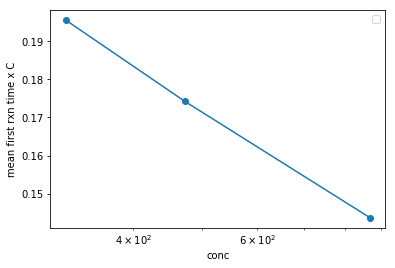

In [5]:
print('kaf',kaf)
rm = 0.005
D = 1
kd= 4.0*math.pi*D

#plt.plot(conc,[1/ka]*len(conc),label='1/ka')
plt.semilogx(conc,rxt*conc,'o-')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.legend()

In [59]:
rm = 0.005
R=2*rm
D = 1
kd= 4.0*math.pi*D
C=np.logspace(0,3.5,30)

Crm=np.array([ 0.86332525   ,1.06600716   ,1.34652569,1.75864373 , 2.39355846,  3.44642192,  5.36112541,  6.99731303,  9.51510999,
 13.68363437, 21.33834073, 84.51656525,129.73533991 ,320.51282051,496.03174603, 868.05555556])
rxtrm=np.array([7.27351210e-01 ,5.97726837e-01 ,4.44661791e-01,0.32699798, 0.22812282, 0.15002535, 0.09155381, 0.06784335, 0.048334,
 0.03031237, 0.01812068, 0.00335746,1.84856909e-03,4.99571073e-04,0.00026003 ,0.00010482])

Crm2=np.array([ 1.74932826 , 2.3787775 ,  3.42090859 , 5.33458518  ,6.96301248 , 9.45251059,
 13.58991085 ,21.12914131 ,80.12820513])
rxtrm2=np.array([0.27137338, 0.19333599, 0.12124948, 0.07248272, 0.05222263, 0.03629452,
 0.02262369, 0.01342985 ,0.00199828])

Crm3=np.array([ 1.75654879  ,9.5345133  ,84.17135247])
rxtrm3=np.array([0.32967616 ,0.04709788 ,0.00336287])

Crm2pp=np.array([ 1.74932826  ,9.45251059 ,80.12820513,124.00793651,320.51282051 ,473.48484848, 868.05555556])
rxtrm2pp=np.array([0.33238285 ,0.04491478 ,0.00328065,0.00199579,0.00061013 ,0.00036796 ,0.00016556])

Crmp1=np.array([ 1.75864373  ,9.51510999 ,84.51656525])
rxnrmp1=np.array([0.46958433 ,0.07518621 ,0.00635457])

Ckf01=np.array([ 1.75654879  ,9.5345133  ,84.17135247,496.03174603 ,868.05555556])
rxnkf01=np.array([0.75266381, 0.12485816 ,0.01204778,0.00186237 ,0.0010119 ])

Ckf012R=np.array([  1.74932826  , 9.45251059,  80.12820513 ,473.48484848, 868.05555556])
rxtkf012R=np.array([0.7643878  ,0.12542833 ,0.0130369  ,0.00187747 ,0.00102033])


In [37]:
def tautheory(c,R): 
    phi=math.pi*R*R*c
    gamma=0.577
    kss=2*math.pi*D/(0.5*math.log(2)-gamma-0.5*math.log(phi)) #Eq 4.14 in Szabo1989
    return 1./(c*kss)

def tautheory2(c,kaf,R): 
    ka = kaf*kd
    kap=ka/(2*math.pi*D)
    phi=math.pi*R*R*c
    gamma=0.577
    kss=2*math.pi*D/(1./kap-gamma+0.5*math.log(2)-0.5*math.log(phi))
    return 1./(c*kss)

Text(0.5,1,'different kf compare with theory')

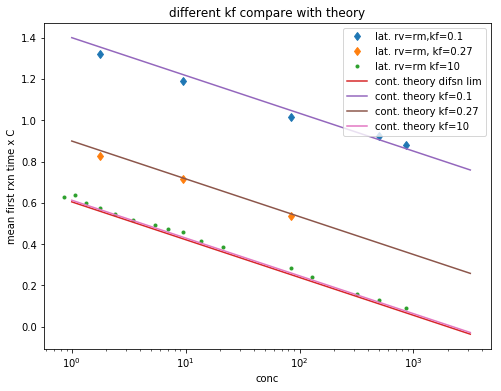

In [52]:


tau=np.array([c*tautheory(c,R) for c in C])
tau2r=np.array([c*tautheory2(c,10,2*R) for c in C])
tau01=np.array([c*tautheory2(c,0.1,R) for c in C])
tau027=np.array([c*tautheory2(c,0.27,R) for c in C])
tau10=np.array([c*tautheory2(c,10,R) for c in C])

plt.subplots(1,1,figsize=(8,6))
#plt.semilogx(Crm2,rxtrm2*Crm2,'x',label='lat. rv=2rm kf=10')
#plt.semilogx(Crm3,rxtrm3*Crm3,'s',label='lat. rv=1.08rm kf=10')
plt.semilogx(Ckf01,rxnkf01*Ckf01,'d',label='lat. rv=rm,kf=0.1')
plt.semilogx(Crmp1,rxnrmp1*Crmp1,'d',label='lat. rv=rm, kf=0.27')
plt.semilogx(Crm,rxtrm*Crm,'.',label='lat. rv=rm kf=10')
plt.semilogx(C,tau,'-',label='cont. theory difsn lim')
plt.semilogx(C,tau01,'-',label='cont. theory kf=0.1')
plt.semilogx(C,tau027,'-',label='cont. theory kf=0.27')
plt.semilogx(C,tau10,'-',label='cont. theory kf=10')

plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.title('N=100,kfactor={},runs={}'.format(kaf,simrun))
plt.legend()
plt.title('different kf compare with theory')
#plt.savefig("fig2.png",format='png',dpi=900)   

Text(0.5,1,'different voxel size')

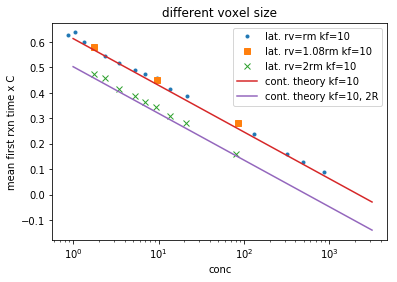

In [39]:
plt.semilogx(Crm,rxtrm*Crm,'.',label='lat. rv=rm kf=10')
plt.semilogx(Crm3,rxtrm3*Crm3,'s',label='lat. rv=1.08rm kf=10')
plt.semilogx(Crm2,rxtrm2*Crm2,'x',label='lat. rv=2rm kf=10')

plt.semilogx(C,tau10,'-',label='cont. theory kf=10')
plt.semilogx(C,tau2r,'-',label='cont. theory kf=10, 2R')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.title('N=100,kfactor={},runs={}'.format(kaf,simrun))
plt.legend()
plt.title('different voxel size')

critical occupancy in lattice 0.04


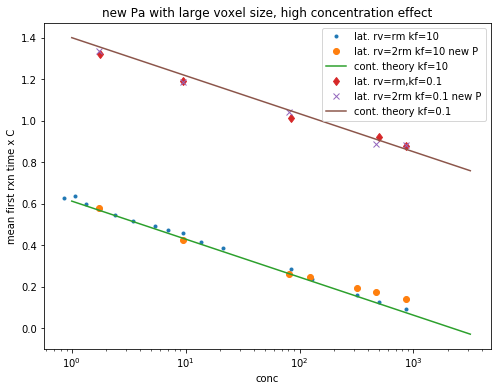

In [61]:
plt.subplots(1,1,figsize=(8,6))
plt.semilogx(Crm,rxtrm*Crm,'.',label='lat. rv=rm kf=10')
plt.semilogx(Crm2pp,rxtrm2pp*Crm2pp,'o',label='lat. rv=2rm kf=10 new P')
plt.semilogx(C,tau10,'-',label='cont. theory kf=10')
plt.semilogx(Ckf01,rxnkf01*Ckf01,'d',label='lat. rv=rm,kf=0.1')
plt.semilogx(Ckf012R,rxtkf012R*Ckf012R,'x',label='lat. rv=2rm kf=0.1 new P')
plt.semilogx(C,tau01,'-',label='cont. theory kf=0.1')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.title('N=100,kfactor={},runs={}'.format(kaf,simrun))
plt.legend()
plt.title('new Pa with large voxel size, high concentration effect')
cc=100
print('critical occupancy in lattice',4*R**2*cc)
#diffusion-influenced situation influenced by slower diffusion due to crowding.

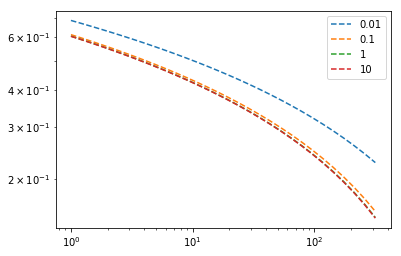

In [56]:
for kf in [0.01,0.1,1,10]:
    tau01=np.array([c*tautheory2(c,kf) for c in C])
    plt.loglog(C,tau01,'--',label=str(kf))
plt.legend()

In [73]:
0.01**2

0.0001

In [91]:
k=0.1
c=1e-6
for y in [0.001,0.01,0.1]:
    phi=1e-4*c
    print('phi,phiy',phi,phi*y)
    print(math.log(phi*y),math.log(phi),math.log(y))
    print(1./(-0.6+1/k+math.log(2)-0.5*math.log(2)-0.5*math.log(phi*y)))

phi,phiy 1e-10 1e-13
-29.933606208922594 -23.025850929940457 -6.907755278982137
0.04046391605453045
phi,phiy 1e-10 1e-12
-27.631021115928547 -23.025850929940457 -4.605170185988091
0.0424410673397292
phi,phiy 1e-10 1.0000000000000001e-11
-25.328436022934504 -23.025850929940457 -2.3025850929940455
0.04462136000238547
